In [22]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [23]:
## Global output settings

plt.rcParams['figure.dpi'] = 300  # Change to your desired DPI
sns.set(context="talk", font_scale=1.2)
sns.set_style("white")

In [50]:
school_year='24-25'

In [24]:
# Import disposition data from Synergy
discipline_df=pd.read_csv('Resources/student_dispositions_022725.csv')
discipline_df.head()

Incident Date           Referring Staff  Staff ID Organization Abbr Name  \
0    07/17/2024  Macblane-Meyer, Stacy E.   22066.0           406W STP ESY   
1    09/04/2024                  OST, OST  -99997.0      302W WEC Tier Two   
2    09/05/2024      Navarrete, Joshua H.   19932.0        302N NEC Tier 2   
3    09/05/2024      Navarrete, Joshua H.   19932.0        302N NEC Tier 2   
4    09/05/2024      Navarrete, Joshua H.   19932.0        302N NEC Tier 2   

   Incident ID Referral Date  Individuals Engaged In Behavior  Location  \
0           10    07/17/2024                                1   Hallway   
1           65    09/05/2024                                1  Bathroom   
2          374    09/17/2024                                1   Hallway   
3          374    09/17/2024                                1   Hallway   
4          374    09/17/2024                                1   Hallway   

  Incident Role     Perceived Motivation              Student Name  Perm ID  \
0      Offender    Obtain Peer Attention      (Williams, Bryce J.)  3667919   
1      Offender  Obtain Item or Activity  (Hodrick, Cassius D. Jr)  3676222   
2      Offender                      NaN          Taylor, Davon J.  3664094   
3      Offender                      NaN          Taylor, Davon J.  3664094   
4      Offender                      NaN          Taylor, Davon J.  3664094   

                Disposition             Behavior Gender  Grade  \
0  Out-of-School Suspension    Sexual Harassment   Male     15   
1      In-School Suspension             Cannabis   Male     10   
2  Out-of-School Suspension        Noncompliance   Male     10   
3  Out-of-School Suspension  Terroristic Threats   Male     10   
4  Out-of-School Suspension             Fighting   Male     10   

     Resolved Race/Ethnicity      VerboseAge  
0  Black or African American  21 yrs 10 mths  
1  Black or African American  15 yrs 10 mths  
2  Black or African American   15 yrs 9 mths  
3  Black or African American   15 yrs 9 mths  
4  Black or African American   15 yrs 9 mths

In [25]:
discipline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Incident Date                    305 non-null    object 
 1   Referring Staff                  284 non-null    object 
 2   Staff ID                         284 non-null    float64
 3   Organization Abbr Name           305 non-null    object 
 4   Incident ID                      305 non-null    int64  
 5   Referral Date                    305 non-null    object 
 6   Individuals Engaged In Behavior  305 non-null    int64  
 7   Location                         305 non-null    object 
 8   Incident Role                    305 non-null    object 
 9   Perceived Motivation             138 non-null    object 
 10  Student Name                     305 non-null    object 
 11  Perm ID                          305 non-null    int64  
 12  Disposition           

In [26]:
# Get disposition counts
discipline_df['Disposition'].value_counts()

Disposition
Out-of-School Suspension    255
Other                        43
In-School Suspension          7
Name: count, dtype: int64

In [27]:
# Rename columns

discipline_df=discipline_df.rename(columns={'Perm ID':'District287 Id', 'Gender':'Student Gender', 'Resolved Race/Ethnicity':'Student Race',\
                                           'VerboseAge':'Student Age', 'Organization Abbr Name':'Site/Program'})
discipline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Incident Date                    305 non-null    object 
 1   Referring Staff                  284 non-null    object 
 2   Staff ID                         284 non-null    float64
 3   Site/Program                     305 non-null    object 
 4   Incident ID                      305 non-null    int64  
 5   Referral Date                    305 non-null    object 
 6   Individuals Engaged In Behavior  305 non-null    int64  
 7   Location                         305 non-null    object 
 8   Incident Role                    305 non-null    object 
 9   Perceived Motivation             138 non-null    object 
 10  Student Name                     305 non-null    object 
 11  District287 Id                   305 non-null    int64  
 12  Disposition           

In [28]:
discipline_df['Behavior'].value_counts()

Behavior
Fighting                               38
Noncompliance                          36
Physical Assault: Staff                30
Threat/Intimidation                    29
Physical contact                       27
Cannabis                               27
Physical Assault: Student              26
Verbal Abuse                           19
Out of Area/Elopement                  17
Property Destruction                   14
Personal device                        11
Other                                   5
Tobacco                                 4
Sexual Orientation                      4
Terroristic Threats                     3
School device                           3
Race, Color, or National Origin         2
Possession/Use                          2
Considered a dangerous weapon           1
LSD/Psychedelics                        1
Possession                              1
Sexual Harassment                       1
Gender Identity                         1
Controlled Substances(pre

In [29]:
# Code behaviors by category and severity
weapon=['Knife', 'Weapon', 'Considered a dangerous weapon', 'Not considered a dangerous weapon']
physical_harm=['Physical contact', 'Fighting', 'Physical Assault: Student', 'Physical Assault: Staff', 'Assault: Staff',\
                             'Assault: Student']
drug_related=['Cannabis', 'Use', 'Possession', 'Tobacco', 'Possession/Use', 'LSD/Psychedelics', 'Controlled Substances(prescription)']

discipline_df.loc[discipline_df['Behavior'].isin(physical_harm), 'Behavior Category']='Physical Harm/Weapon'
discipline_df.loc[discipline_df['Behavior'].isin(physical_harm), 'Behavior Level']=1

discipline_df.loc[discipline_df['Behavior'].isin(weapon), 'Behavior Category']='Physical Harm/Weapon'
discipline_df.loc[discipline_df['Behavior'].isin(weapon), 'Behavior Level']=1

discipline_df.loc[discipline_df['Behavior'].isin(drug_related), 'Behavior Category']='Drug-related'
discipline_df.loc[discipline_df['Behavior'].isin(drug_related), 'Behavior Level']=2

discipline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Incident Date                    305 non-null    object 
 1   Referring Staff                  284 non-null    object 
 2   Staff ID                         284 non-null    float64
 3   Site/Program                     305 non-null    object 
 4   Incident ID                      305 non-null    int64  
 5   Referral Date                    305 non-null    object 
 6   Individuals Engaged In Behavior  305 non-null    int64  
 7   Location                         305 non-null    object 
 8   Incident Role                    305 non-null    object 
 9   Perceived Motivation             138 non-null    object 
 10  Student Name                     305 non-null    object 
 11  District287 Id                   305 non-null    int64  
 12  Disposition           

In [30]:
# Check un-coded behaviors
discipline_df[discipline_df['Behavior Category'].isna()]['Behavior'].value_counts()

Behavior
Noncompliance                      36
Threat/Intimidation                29
Verbal Abuse                       19
Out of Area/Elopement              17
Property Destruction               14
Personal device                    11
Other                               5
Sexual Orientation                  4
Terroristic Threats                 3
School device                       3
Race, Color, or National Origin     2
Sexual Harassment                   1
Gender Identity                     1
Unknown                             1
Name: count, dtype: int64

In [31]:
# Fill remaining categories and levels
discipline_df['Behavior Category']=discipline_df['Behavior Category'].fillna('Other')
discipline_df['Behavior Level']=discipline_df['Behavior Level'].fillna(3)

In [32]:
discipline_df['Behavior Category'].value_counts()

Behavior Category
Other                   146
Physical Harm/Weapon    123
Drug-related             36
Name: count, dtype: int64

In [44]:
# Some incidents have more than one row for each student with a different behavior
# Sort dataframe by Incident ID, Student ID, and Behavior level so most severe behavior occurs first
discipline_df=discipline_df.sort_values(by=['Incident ID', 'District287 Id', 'Behavior Level'])

In [45]:
# Some incidents have more than one offender
discipline_df[discipline_df['Individuals Engaged In Behavior']>1].head(10)

Incident Date      Referring Staff  Staff ID     Site/Program  \
118    10/30/2024    Davis, Kaitlyn M.   22305.0  302S SEC Tier 2   
158    12/02/2024    Kaukola, Jacob L.   22177.0  303W WEC Tier 3   
163    12/02/2024    Kaukola, Jacob L.   22177.0  303W WEC Tier 3   
197    12/10/2024  Lukoskie, Andria K.   20466.0  302N NEC Tier 2   
189    12/10/2024  Lukoskie, Andria K.   20466.0  302N NEC Tier 2   
193    12/10/2024  Lukoskie, Andria K.   20466.0  302N NEC Tier 2   
211    12/13/2024     Mueller, John F.   21809.0  302S SEC Tier 2   
207    12/13/2024     Mueller, John F.   21809.0  302S SEC Tier 2   
203    12/11/2024    Austin, Lakeia L.   21085.0  302S SEC Tier 2   
204    12/11/2024    Austin, Lakeia L.   21085.0  302S SEC Tier 2   

     Incident ID Referral Date  Individuals Engaged In Behavior   Location  \
118         1831    10/31/2024                                3  Classroom   
158         2808    12/02/2024                                2    Hallway   
163         2808    12/02/2024                                2    Hallway   
197         3150    12/11/2024                                3    Hallway   
189         3150    12/11/2024                                3    Hallway   
193         3150    12/11/2024                                3    Hallway   
211         3513    01/02/2025                                2  Classroom   
207         3513    01/02/2025                                2  Classroom   
203         3568    01/06/2025                                2    Hallway   
204         3568    01/06/2025                                2    Hallway   

    Incident Role   Perceived Motivation               Student Name  \
118      Offender                    NaN            (Scott, Mia M.)   
158      Offender                    NaN      Clayborne, Cor'dai L.   
163      Offender                    NaN      Reynolds, Nehemiah J.   
197      Offender  Obtain Peer Attention     Hall-Rogers, Jaivon D.   
189      Offender  Obtain Peer Attention  Harris, Christopher J. Jr   
193      Offender  Obtain Peer Attention        Basswood, Carter L.   
211      Offender  Obtain Peer Attention          Collier, Zahki J.   
207      Offender  Obtain Peer Attention           James, Arkell D.   
203      Offender                    NaN            (Scott, Mia M.)   
204      Offender                    NaN      Anderson, Gerzelle M.   

     District287 Id               Disposition       Behavior Student Gender  \
118         3662934  Out-of-School Suspension       Fighting         Female   
158         3667610  Out-of-School Suspension       Fighting           Male   
163         3676708  Out-of-School Suspension       Fighting           Male   
197         3642772  Out-of-School Suspension  Noncompliance           Male   
189         3667554                     Other  Noncompliance           Male   
193         3677100                     Other  Noncompliance           Male   
211         3679782  Out-of-School Suspension       Fighting           Male   
207         3680161  Out-of-School Suspension       Fighting           Male   
203         3662934  Out-of-School Suspension       Fighting         Female   
204         3676846  Out-of-School Suspension       Fighting         Female   

     Grade                      Student Race     Student Age  \
118      8         Black or African American   13 yrs 8 mths   
158     12         Black or African American   18 yrs 3 mths   
163     11                       Two or More   17 yrs 2 mths   
197     10         Black or African American   15 yrs 9 mths   
189      9         Black or African American   15 yrs 5 mths   
193      9  American Indian or Alaska Native   15 yrs 6 mths   
211      8         Black or African American  13 yrs 11 mths   
207     10                       Two or More   16 yrs 0 mths   
203      8         Black or African American   13 yrs 8 mths   
204      8         Black or African American   13 yrs 6 mths   

        Behavior Category  B

In [46]:
# Create new dataframe with dropped duplicate student IDs for each incident, keeping only first student row (most severe behavior)
discipline_cleaned=discipline_df.drop_duplicates(subset=['Incident ID', 'District287 Id'], keep='first')
discipline_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 302
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Incident Date                    144 non-null    object 
 1   Referring Staff                  134 non-null    object 
 2   Staff ID                         134 non-null    float64
 3   Site/Program                     144 non-null    object 
 4   Incident ID                      144 non-null    int64  
 5   Referral Date                    144 non-null    object 
 6   Individuals Engaged In Behavior  144 non-null    int64  
 7   Location                         144 non-null    object 
 8   Incident Role                    144 non-null    object 
 9   Perceived Motivation             55 non-null     object 
 10  Student Name                     144 non-null    object 
 11  District287 Id                   144 non-null    int64  
 12  Disposition                

In [47]:
# Group programs
nec_sped=['302N NEC Tier 2', '303N NEC Tier 3']
wec_sped=['302W WEC Tier Two', '302WT WEC Tier 2 Trn', '303W WEC Tier 3', '303WT WEC Tier 3 Trn']
sec_sped=['302S SEC Tier 2', '303S SEC Tier 3', '303ST SEC Tier 3 Trn']
ctc=['301CT CTC Tier 1 Trn', 'CTC Pathways EPC 32', 'Gateway Academy 801']
abec=['302AT ABEC Tier 2 Tr', '302A ABEC Tier 2']

In [48]:
# Code schools
discipline_cleaned.loc[discipline_cleaned['Site/Program'].isin(nec_sped), 'School']='NEC SPED'
discipline_cleaned.loc[discipline_cleaned['Site/Program'].isin(wec_sped), 'School']='WEC SPED'
discipline_cleaned.loc[discipline_cleaned['Site/Program'].isin(sec_sped), 'School']='SEC SPED'
discipline_cleaned.loc[discipline_cleaned['Site/Program']=='NECA 772', 'School']='NECA'
discipline_cleaned.loc[discipline_cleaned['Site/Program']=='SECA 622', 'School']='SECA'
discipline_cleaned.loc[discipline_cleaned['Site/Program']=='W-Alt 800', 'School']='W-ALT'
discipline_cleaned.loc[discipline_cleaned['Site/Program'].isin(ctc), 'School']='CTC'
discipline_cleaned.loc[discipline_cleaned['Site/Program'].isin(abec), 'School']='ABEC'

## Dispositions Analysis

In [49]:
discipline_cleaned['Disposition'].value_counts()

Disposition
Out-of-School Suspension    116
Other                        24
In-School Suspension          4
Name: count, dtype: int64

C:\Users\mcyang\AppData\Local\Temp\ipykernel_3636\496440800.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)


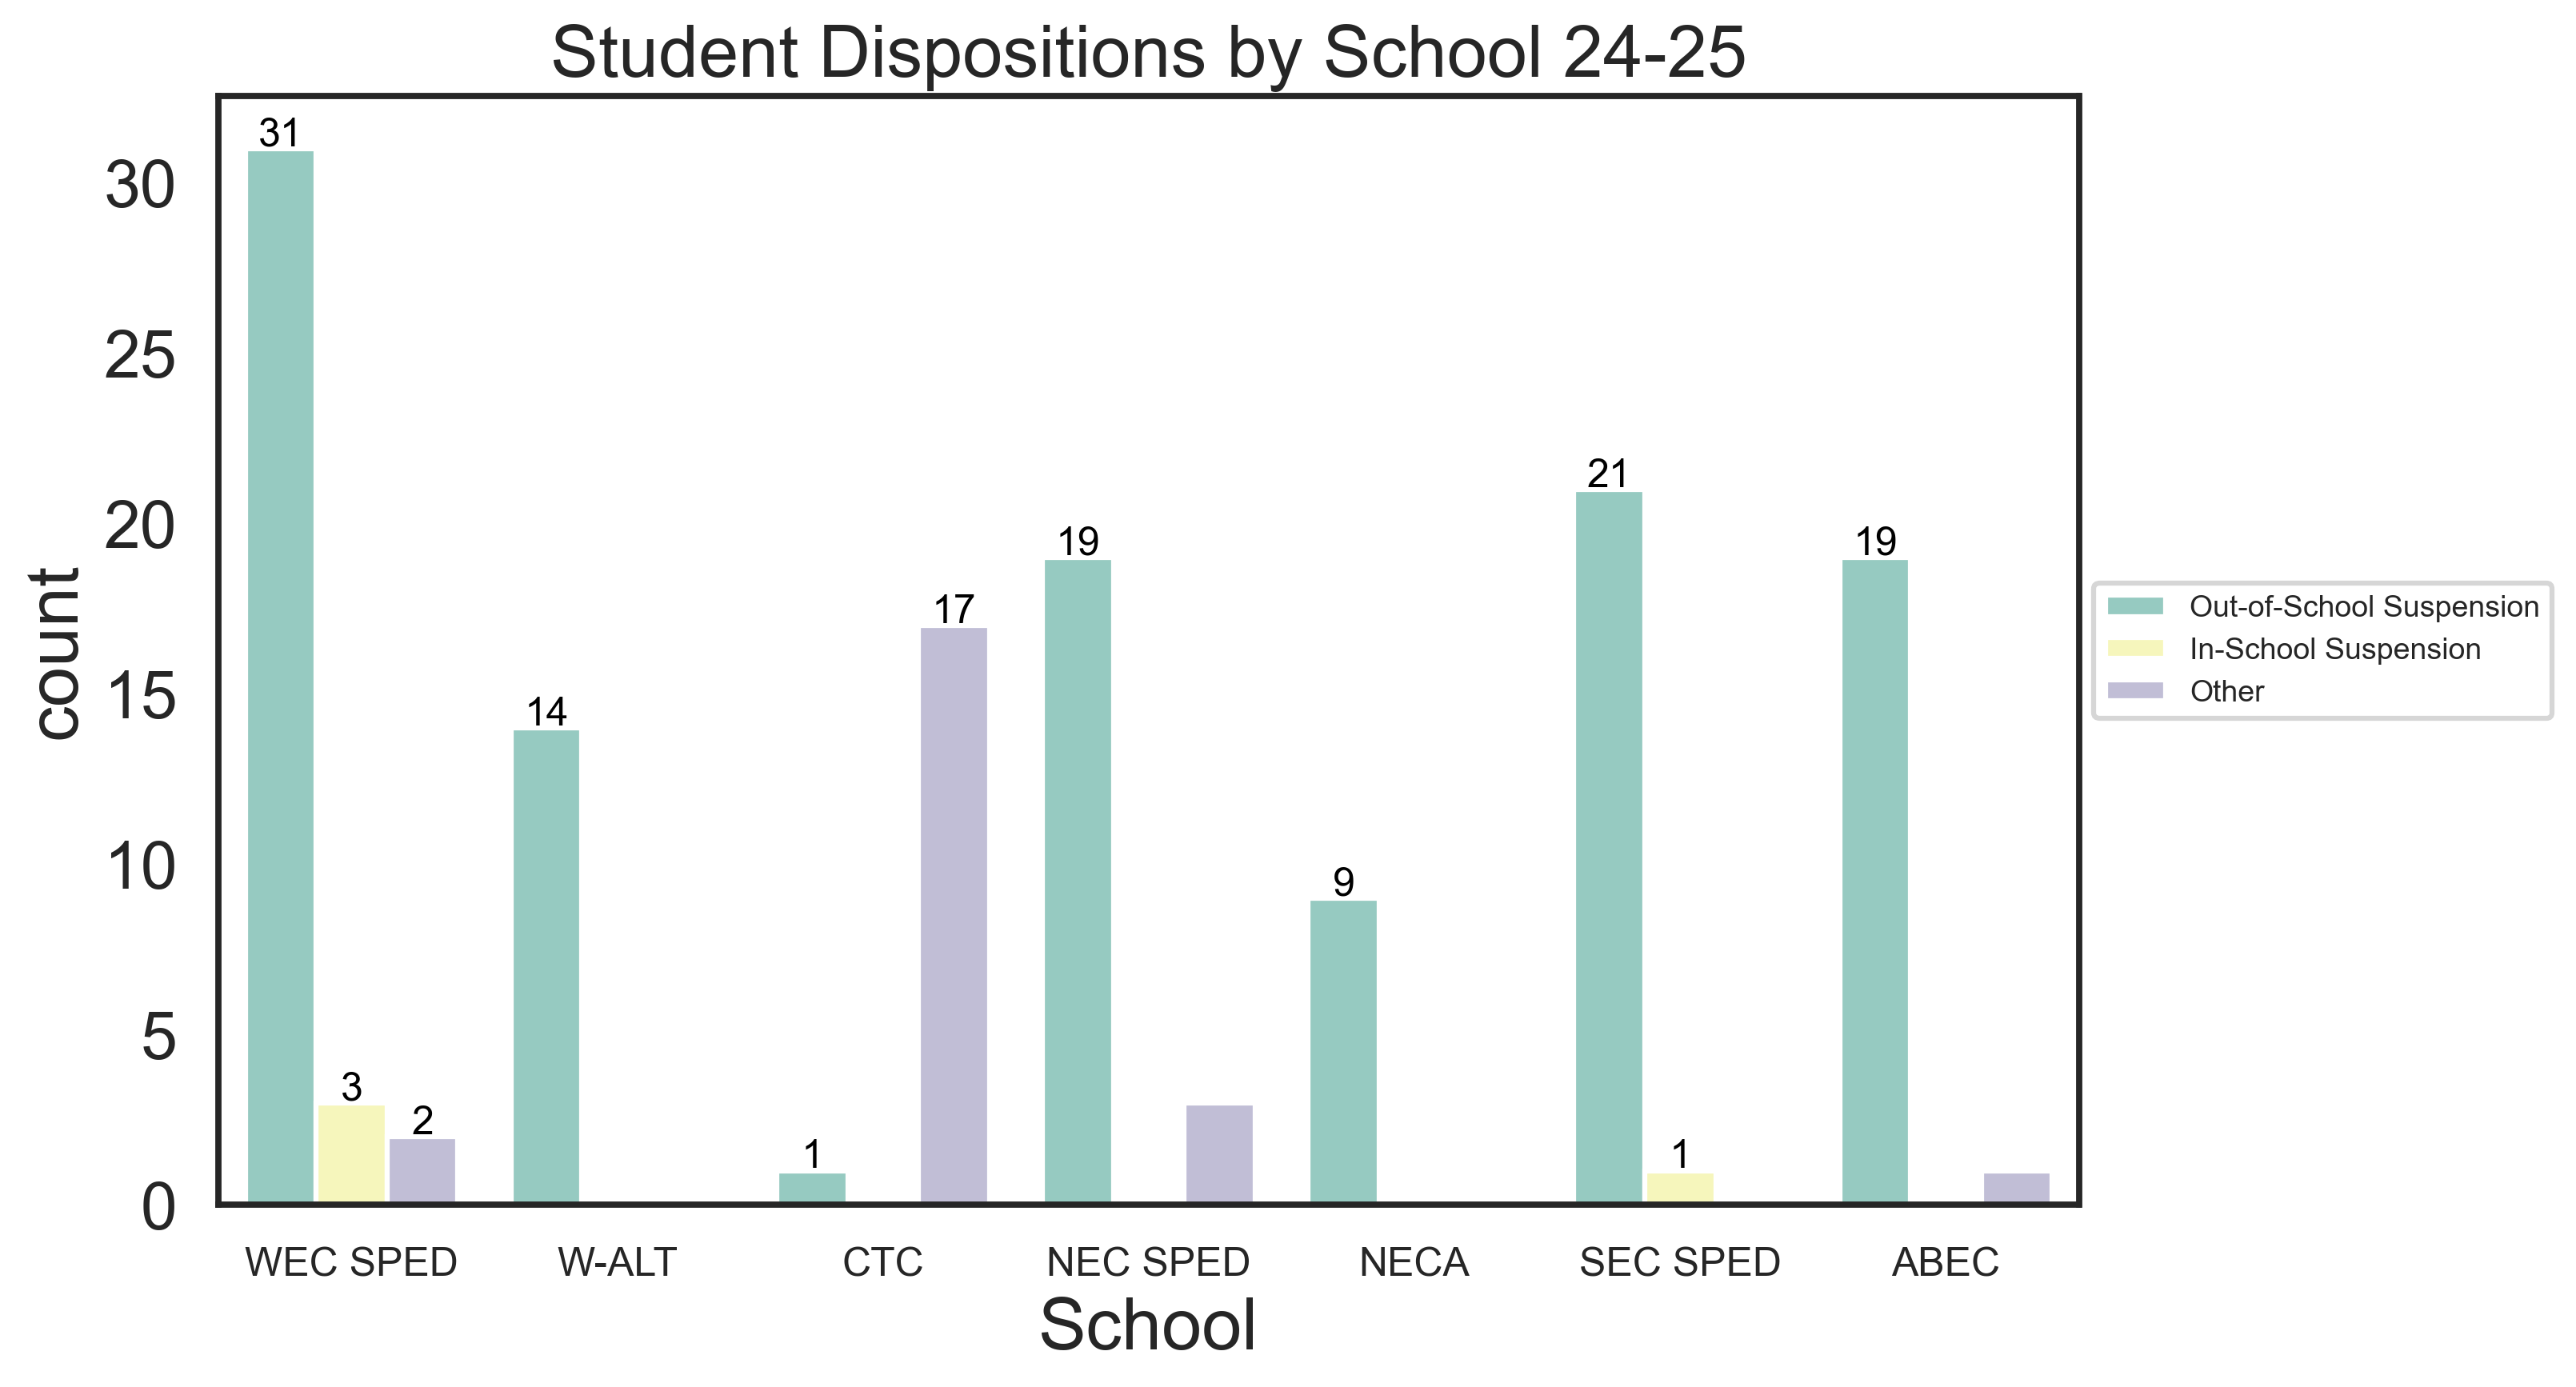

In [52]:
fig = plt.figure(figsize=(10,6))

ax = sns.countplot(x='School',
              data=discipline_cleaned,
              palette='Set3', 
              hue='Disposition'
            )

for p in ax.patches[0:11]:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .1, f'{height:.0f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f'Student Dispositions by School {school_year}')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.legend(loc='center left', fontsize=9, bbox_to_anchor=(1, 0.5))

plt.savefig('Outputs/dispositions_by_school', bbox_inches='tight')
plt.show()

In [53]:
discipline_cleaned.groupby('School')['Disposition'].value_counts()

School    Disposition             
ABEC      Out-of-School Suspension    19
          Other                        1
CTC       Other                       17
          Out-of-School Suspension     1
NEC SPED  Out-of-School Suspension    19
          Other                        3
NECA      Out-of-School Suspension     9
SEC SPED  Out-of-School Suspension    21
          In-School Suspension         1
W-ALT     Out-of-School Suspension    14
WEC SPED  Out-of-School Suspension    31
          In-School Suspension         3
          Other                        2
Name: count, dtype: int64

In [54]:
discipline_cleaned.groupby('School')['Behavior Category'].value_counts()

School    Behavior Category   
ABEC      Physical Harm/Weapon    17
          Drug-related             2
          Other                    1
CTC       Other                   12
          Physical Harm/Weapon     5
          Drug-related             1
NEC SPED  Physical Harm/Weapon    13
          Other                    5
          Drug-related             4
NECA      Physical Harm/Weapon     9
SEC SPED  Physical Harm/Weapon    13
          Drug-related             5
          Other                    4
W-ALT     Drug-related            14
WEC SPED  Physical Harm/Weapon    28
          Drug-related             6
          Other                    2
Name: count, dtype: int64

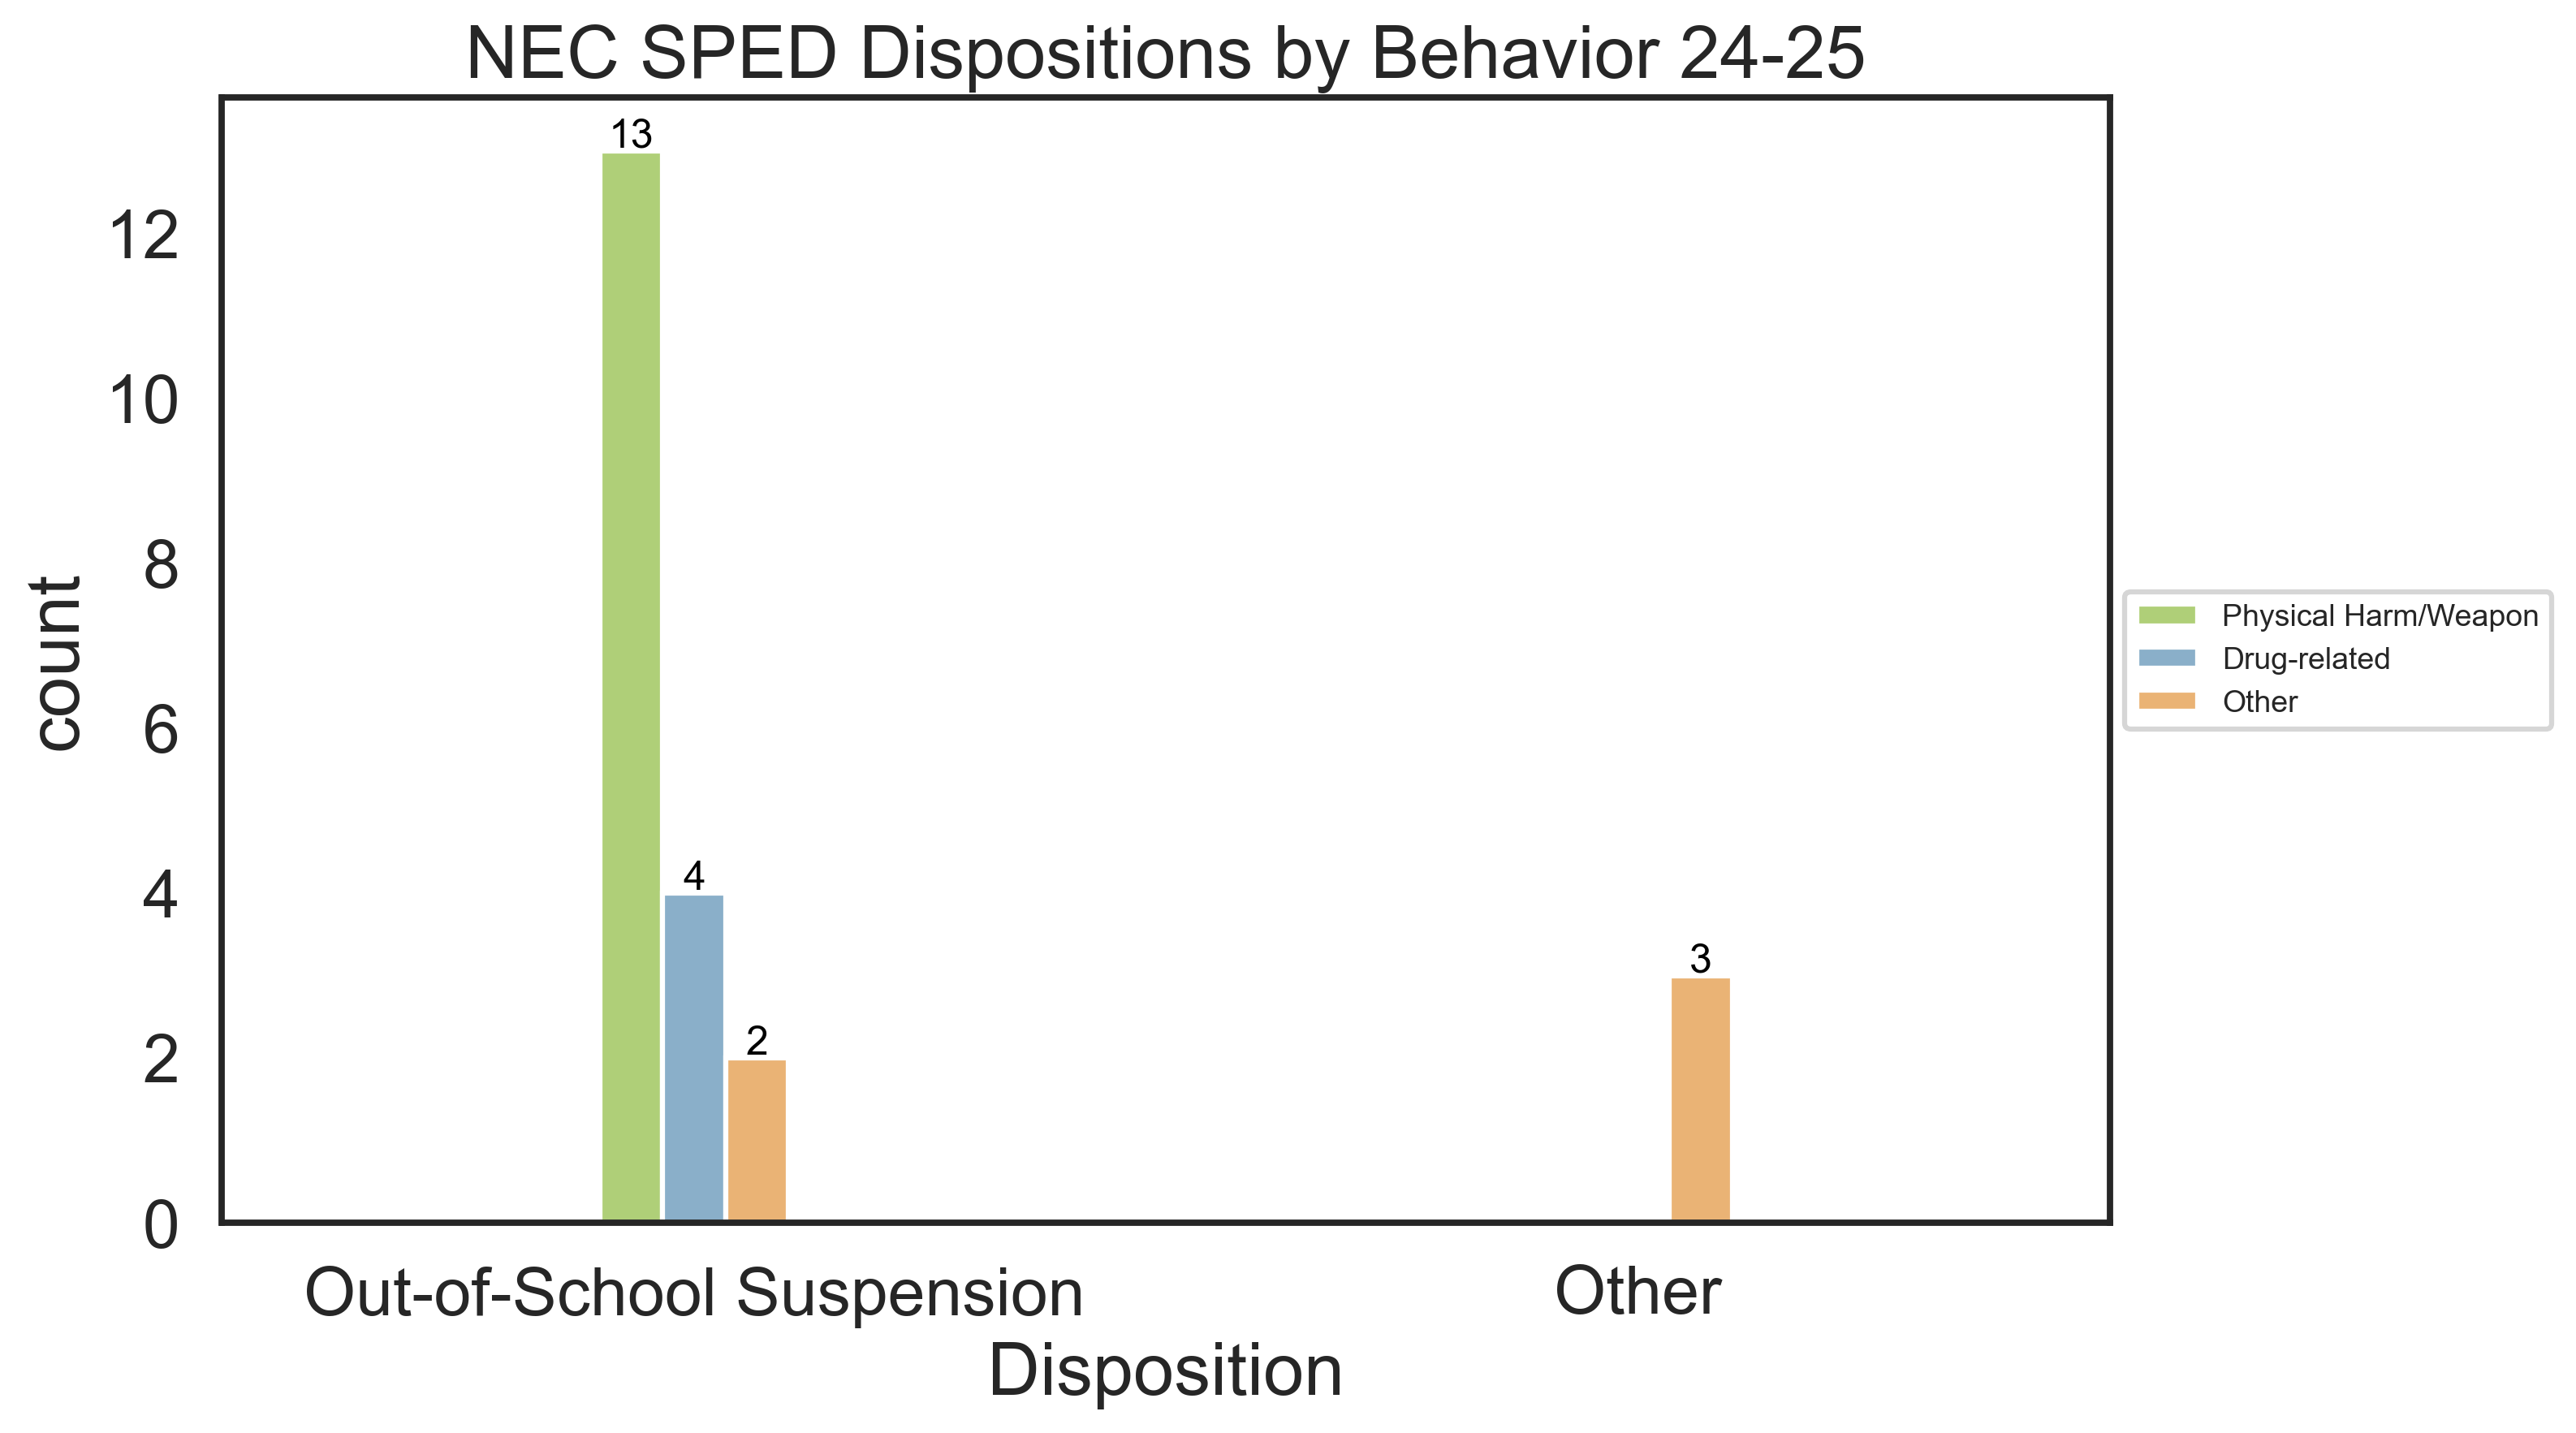

In [57]:
fig = plt.figure(figsize=(10,6))

custom_palette={'Physical Harm/Weapon':'#b3de69', 'Drug-related':'#80b1d3', 'Other':'#fdb462'}

ax = sns.countplot(x='Disposition',
              data=discipline_cleaned[discipline_cleaned['School']=='NEC SPED'], 
              palette=custom_palette, 
              hue='Behavior Category', width=0.2
            )

for p in ax.patches[0:4]:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .05, f'{height:.0f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f'NEC SPED Dispositions by Behavior {school_year}')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(loc='center left', fontsize=9, bbox_to_anchor=(1, 0.5))

plt.savefig('Outputs/nec_dispositions_by_behavior', bbox_inches='tight')
plt.show()

C:\Users\mcyang\AppData\Local\Temp\ipykernel_3636\1458477817.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


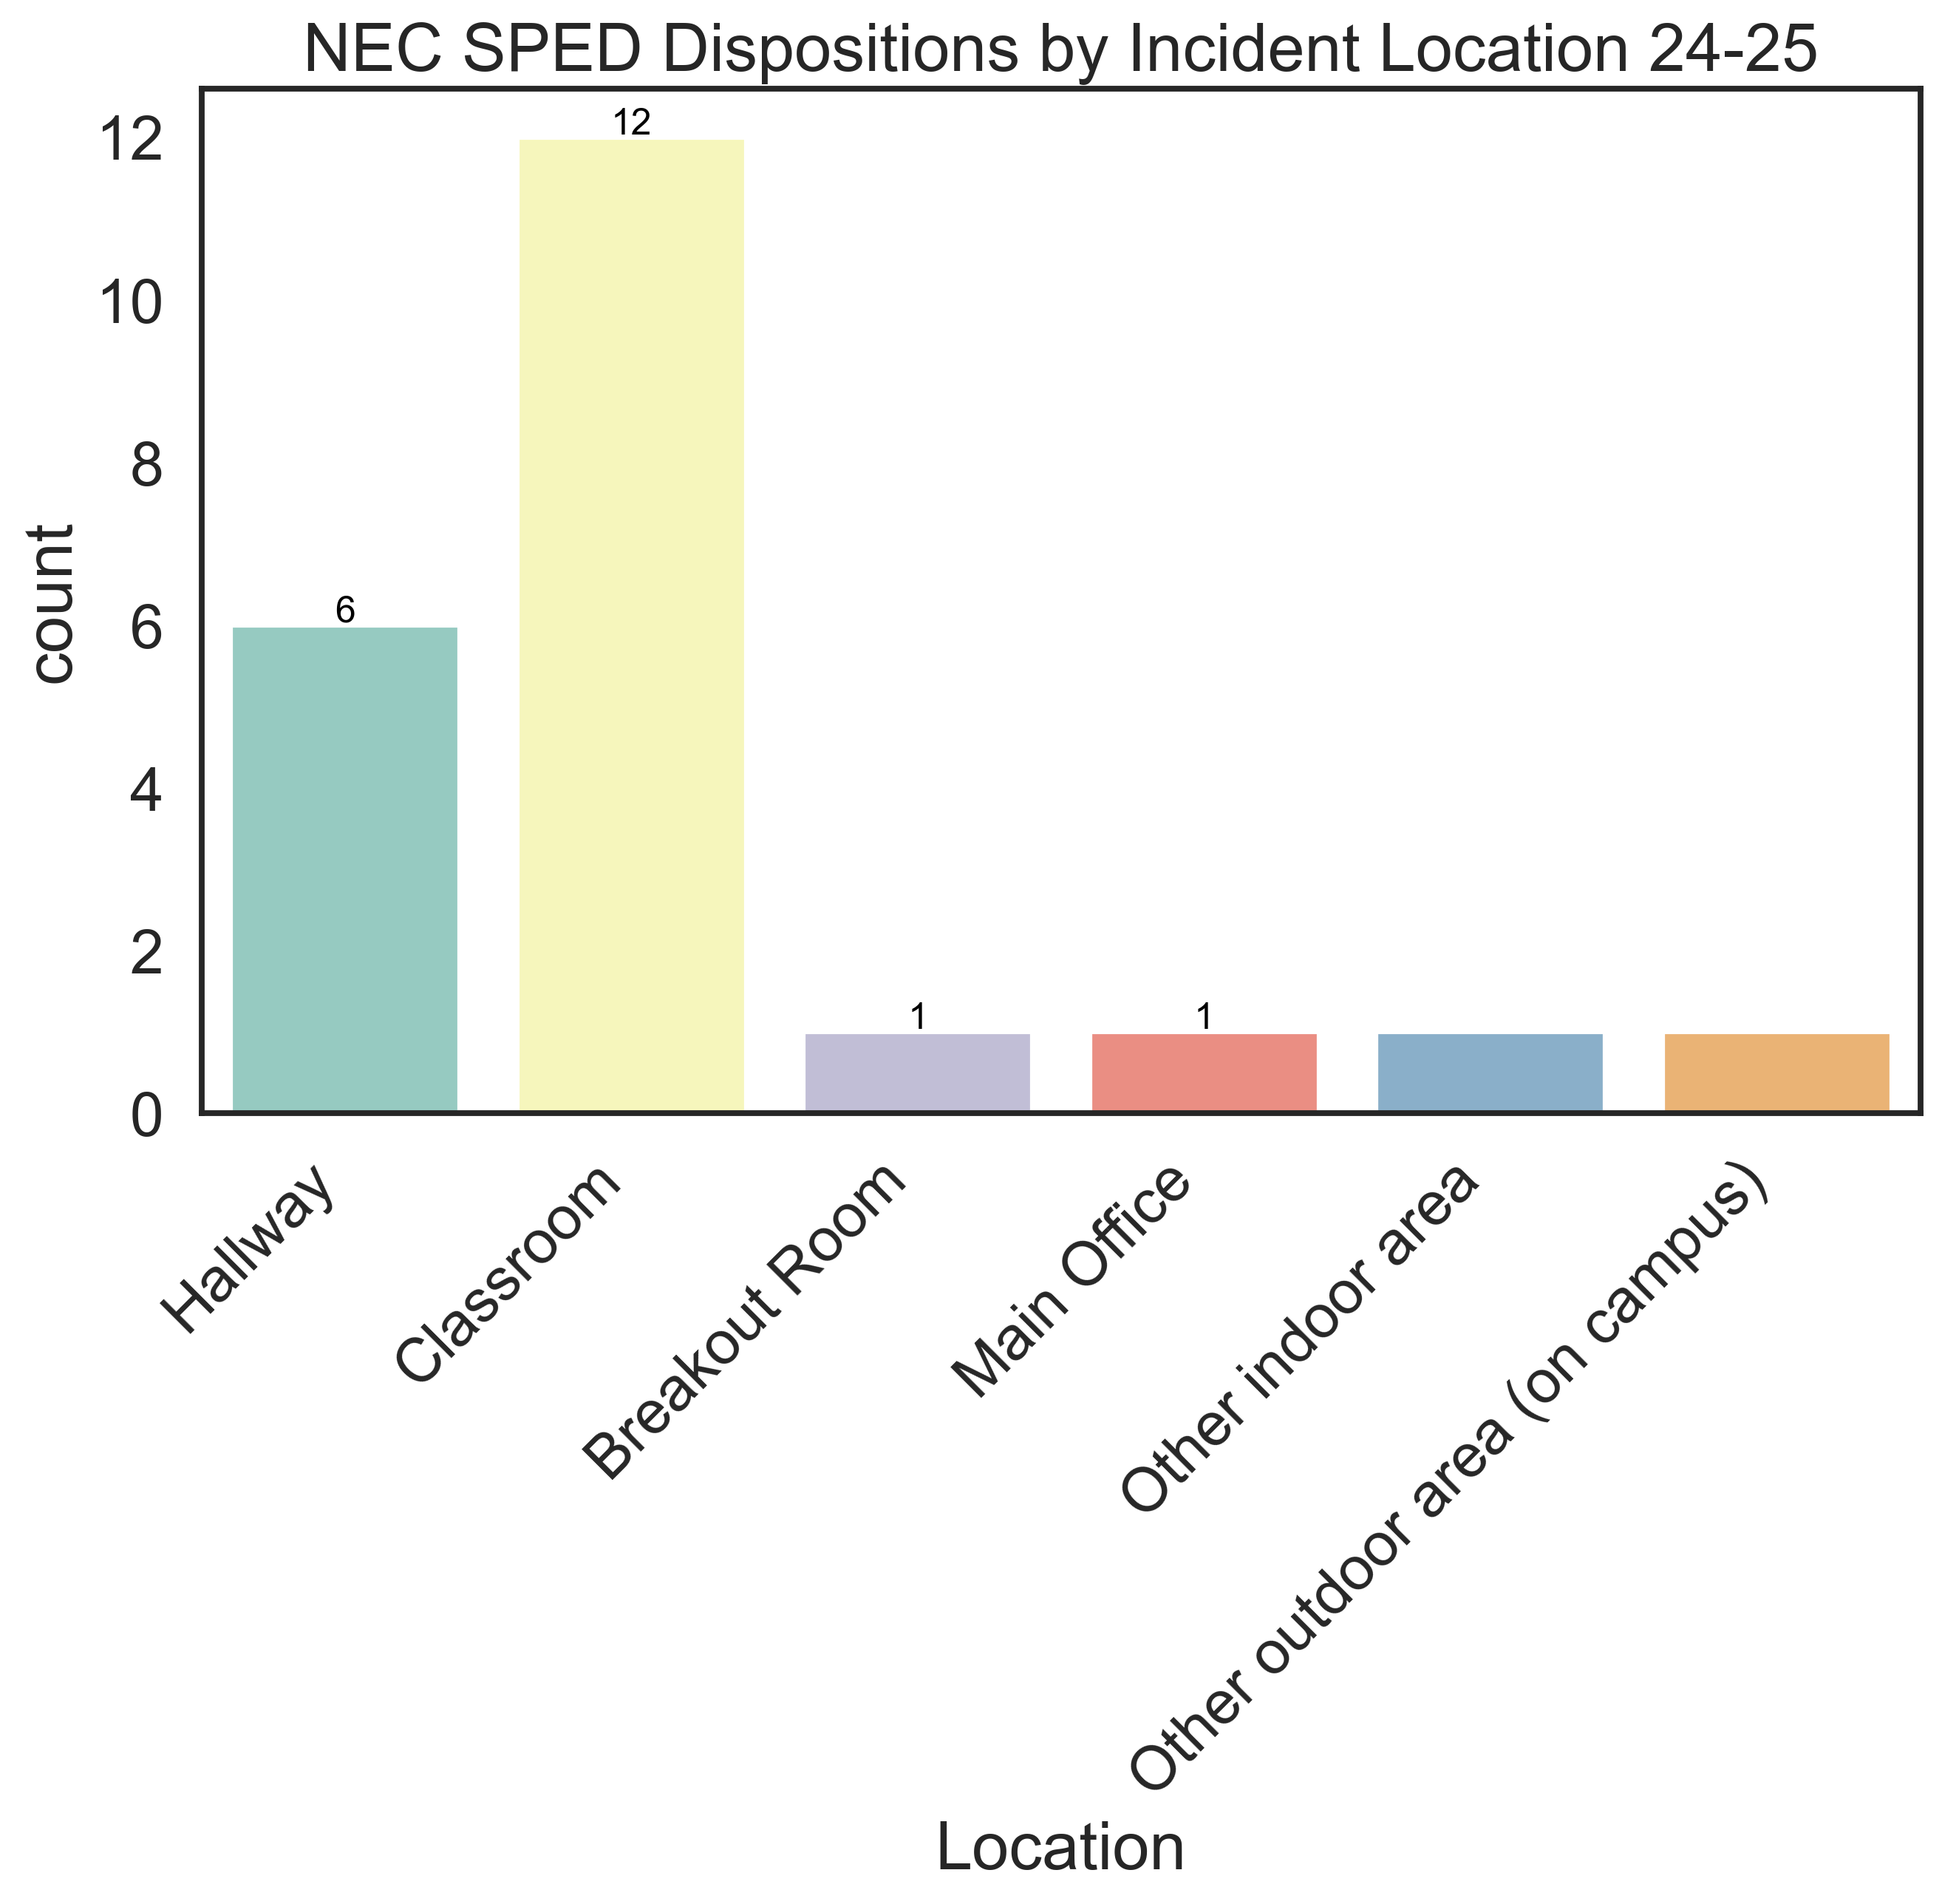

In [121]:
fig = plt.figure(figsize=(10,6))

ax = sns.countplot(x='Location',
              data=discipline_cleaned[discipline_cleaned['School']=='NEC SPED'], 
              palette='Set3', 
              hue='Location'
            )

for p in ax.patches[0:4]:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .05, f'{height:.0f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f'NEC SPED Dispositions by Incident Location {school_year}')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# ax.legend(loc='center left', fontsize=9, bbox_to_anchor=(1, 0.5))

plt.savefig('Outputs/nec_dispositions_by_location', bbox_inches='tight')
plt.show()

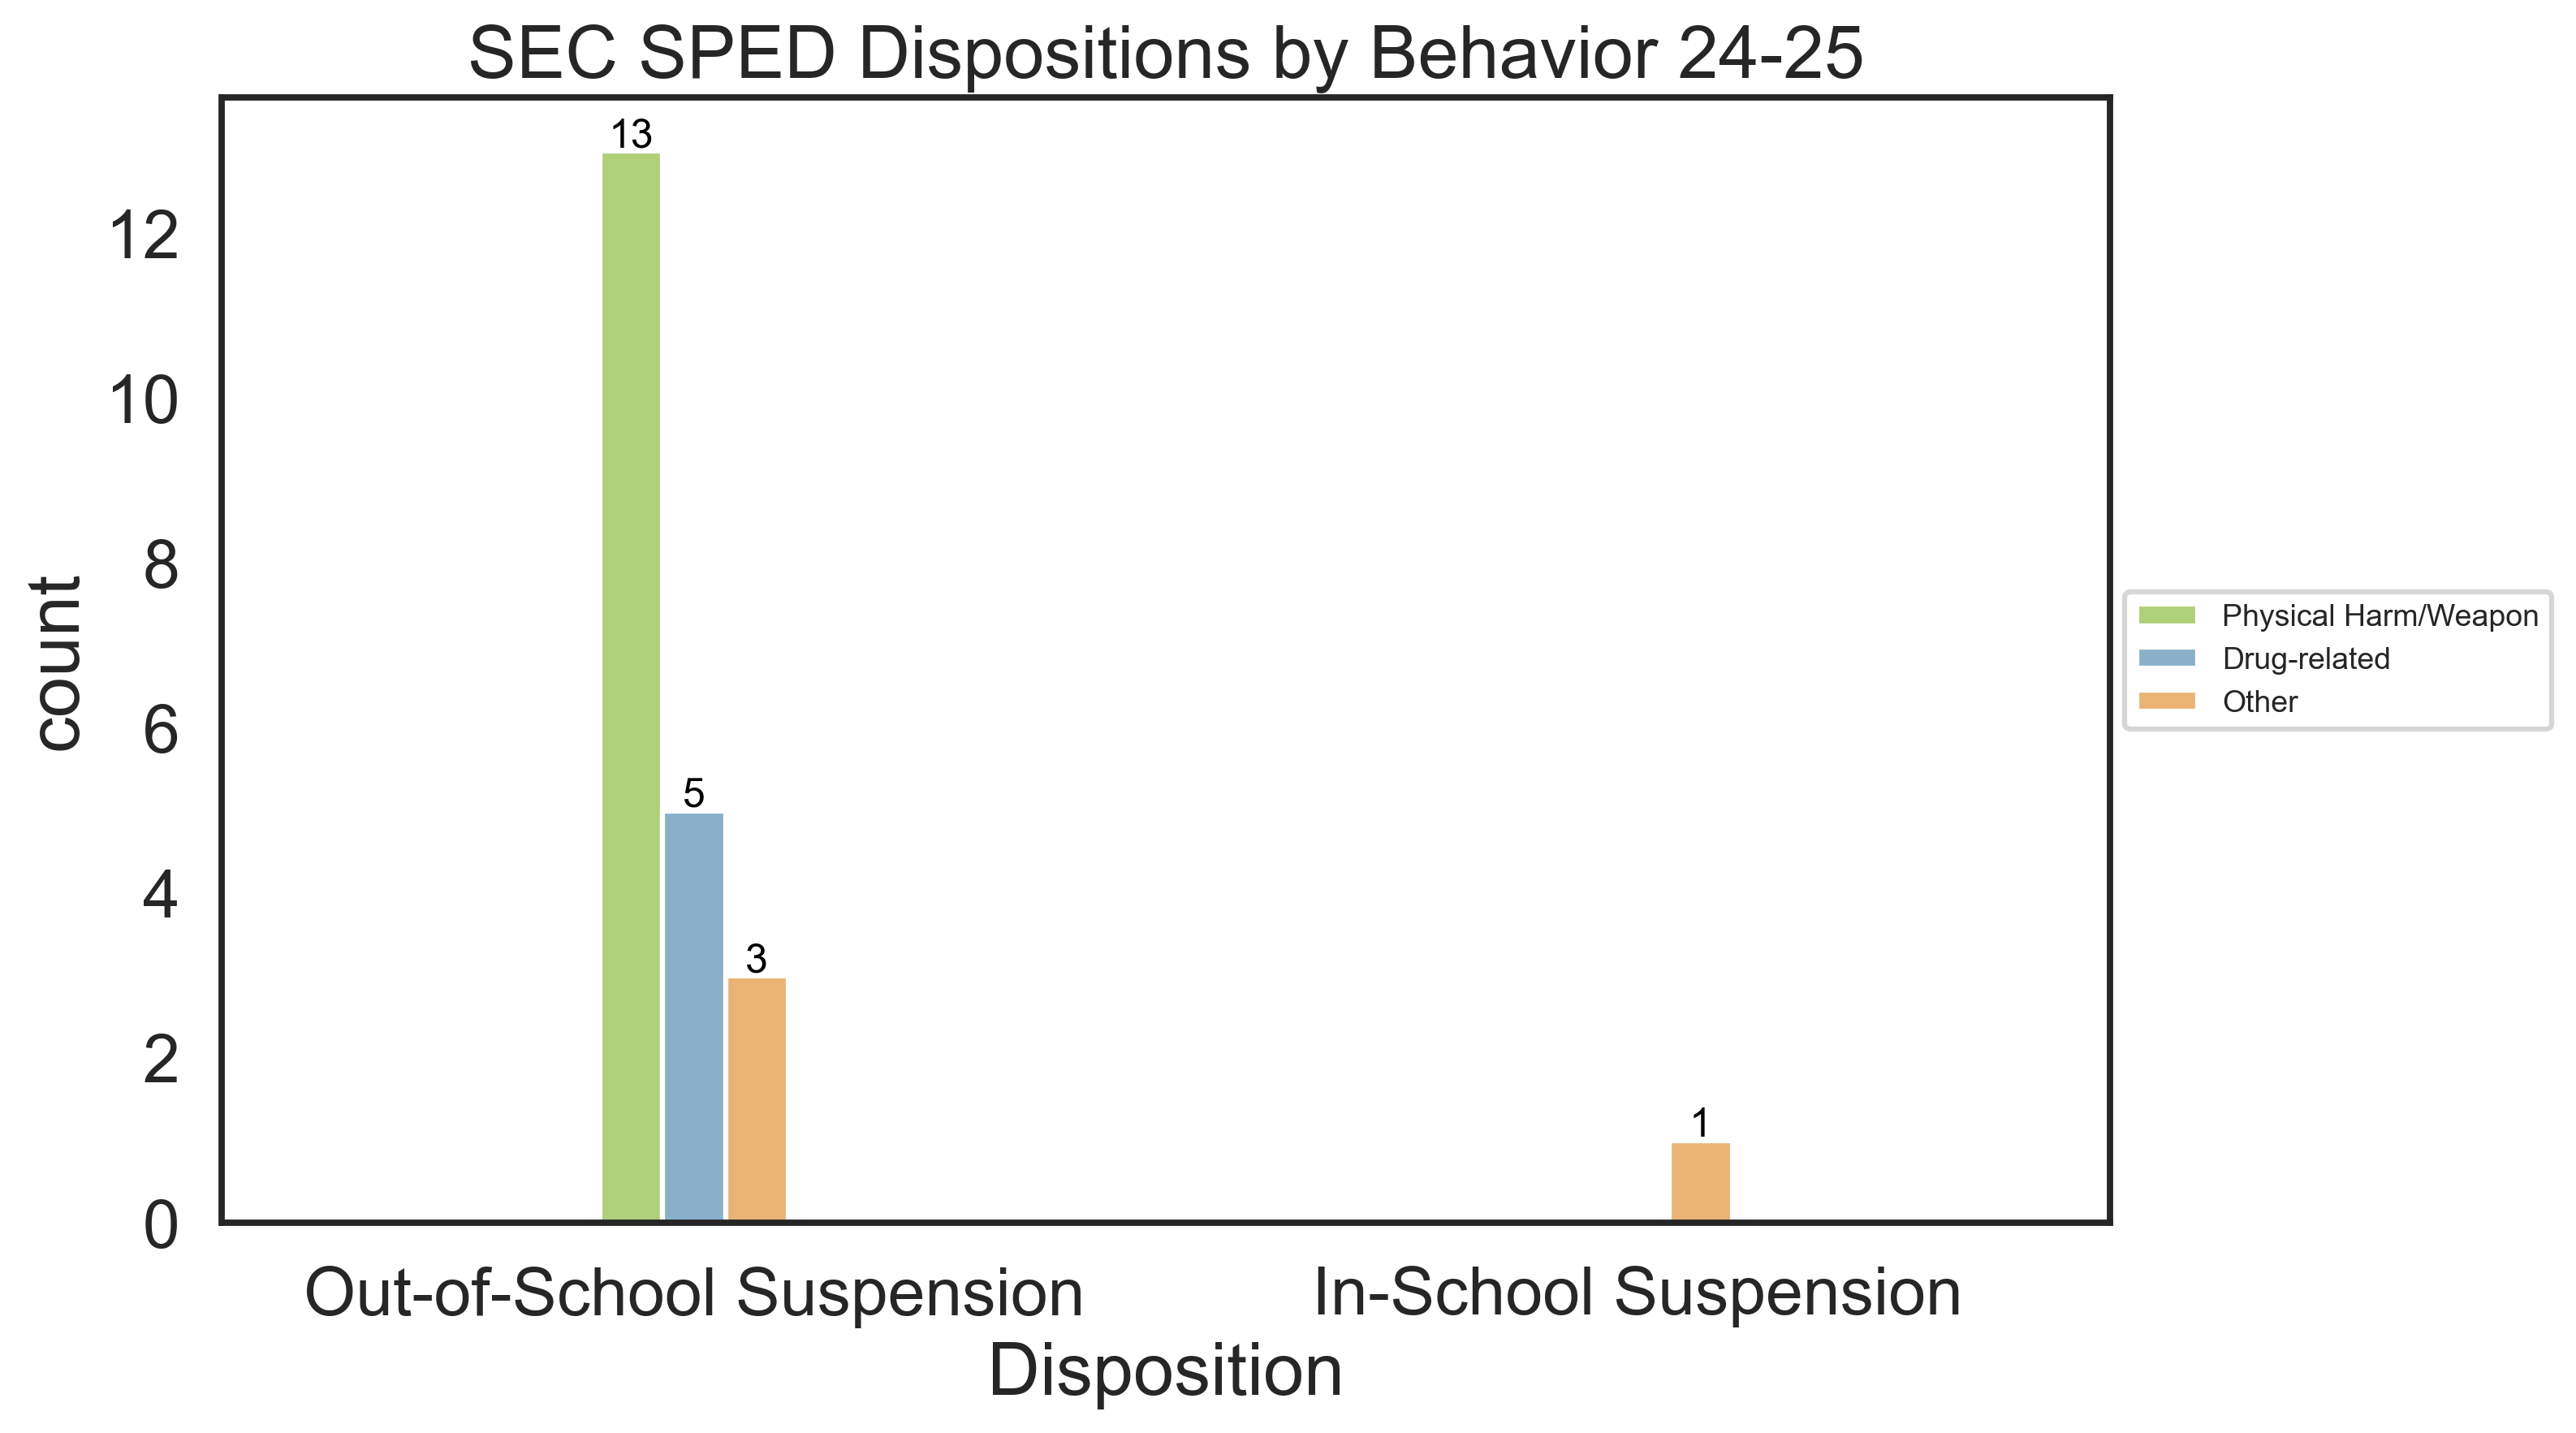

In [59]:
fig = plt.figure(figsize=(10,6))

custom_palette={'Physical Harm/Weapon':'#b3de69', 'Drug-related':'#80b1d3', 'Other':'#fdb462'}

ax = sns.countplot(x='Disposition',
              data=discipline_cleaned[discipline_cleaned['School']=='SEC SPED'], 
              palette=custom_palette, 
              hue='Behavior Category', width=0.2
            )

for p in ax.patches[0:4]:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .05, f'{height:.0f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f'SEC SPED Dispositions by Behavior {school_year}')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(loc='center left', fontsize=9, bbox_to_anchor=(1, 0.5))

plt.savefig('Outputs/sec_dispositions_by_behavior', bbox_inches='tight')
plt.show()

C:\Users\mcyang\AppData\Local\Temp\ipykernel_3636\3548790519.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


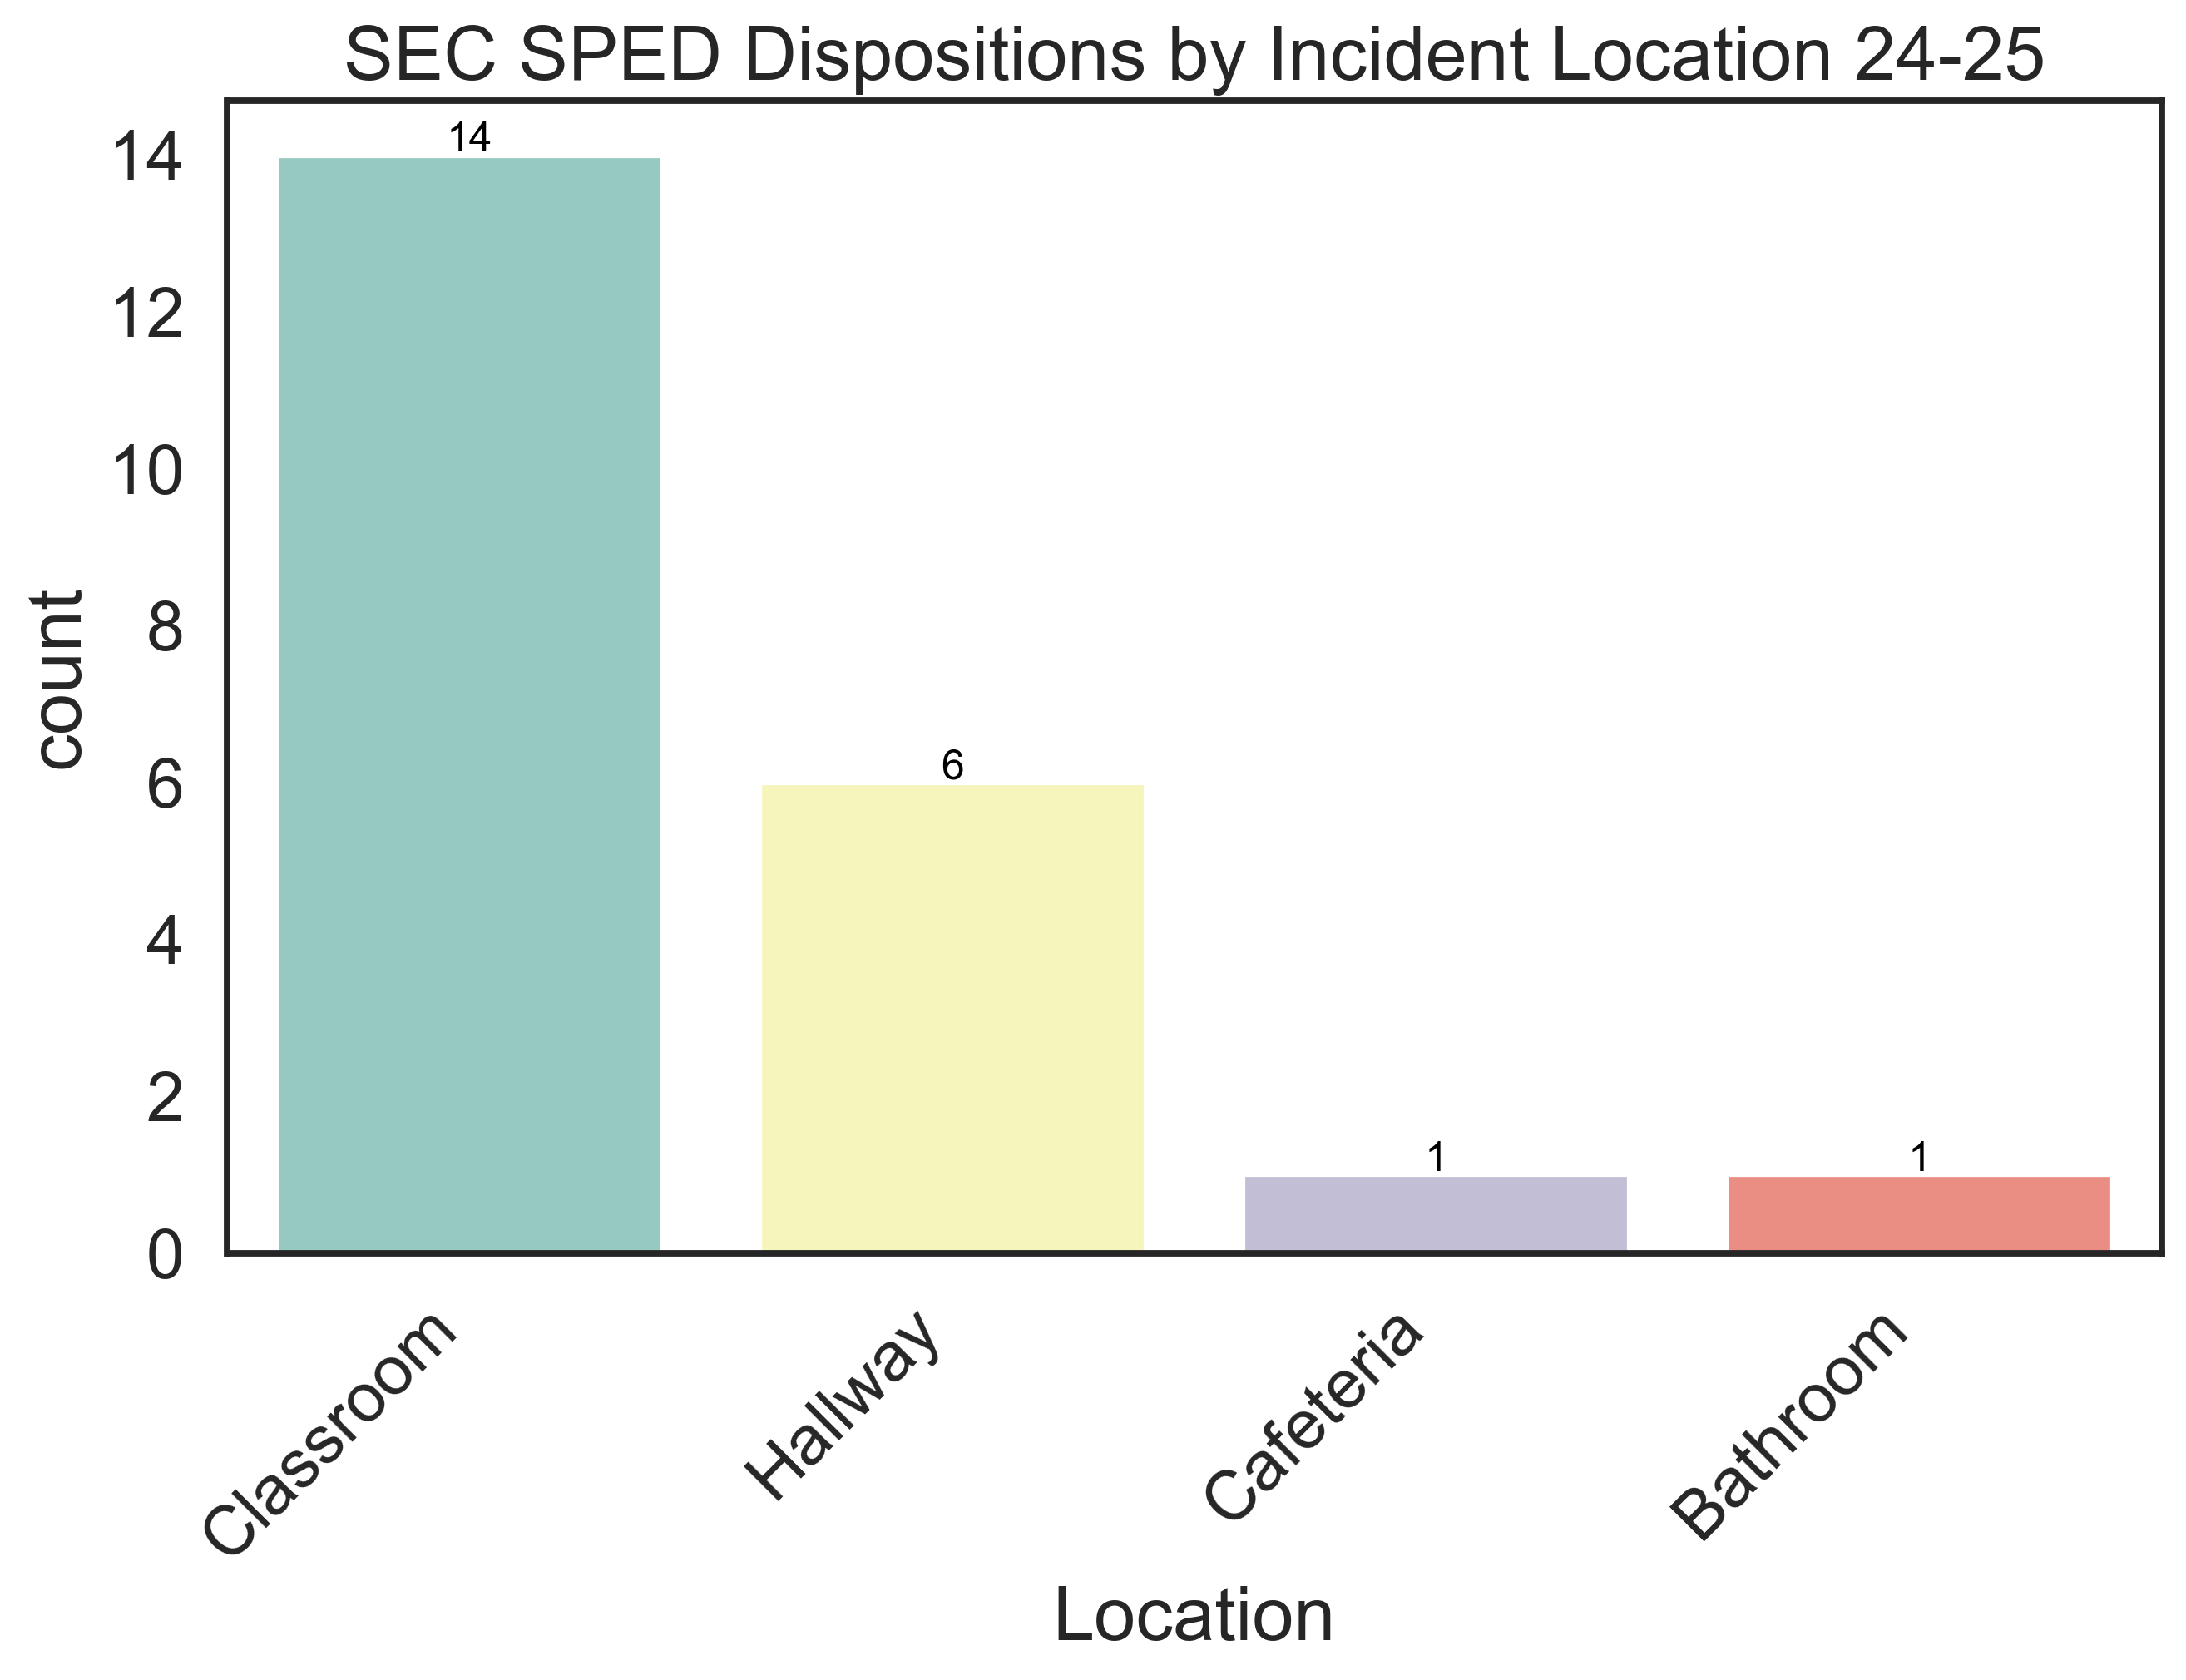

In [120]:
fig = plt.figure(figsize=(10,6))

ax = sns.countplot(x='Location',
              data=discipline_cleaned[discipline_cleaned['School']=='SEC SPED'], 
              palette='Set3', 
              hue='Location'
            )

for p in ax.patches[0:4]:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .05, f'{height:.0f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f'SEC SPED Dispositions by Incident Location {school_year}')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# ax.legend(loc='center left', fontsize=9, bbox_to_anchor=(1, 0.5))

plt.savefig('Outputs/sec_dispositions_by_location', bbox_inches='tight')
plt.show()

C:\Users\mcyang\AppData\Local\Temp\ipykernel_3636\2641437080.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


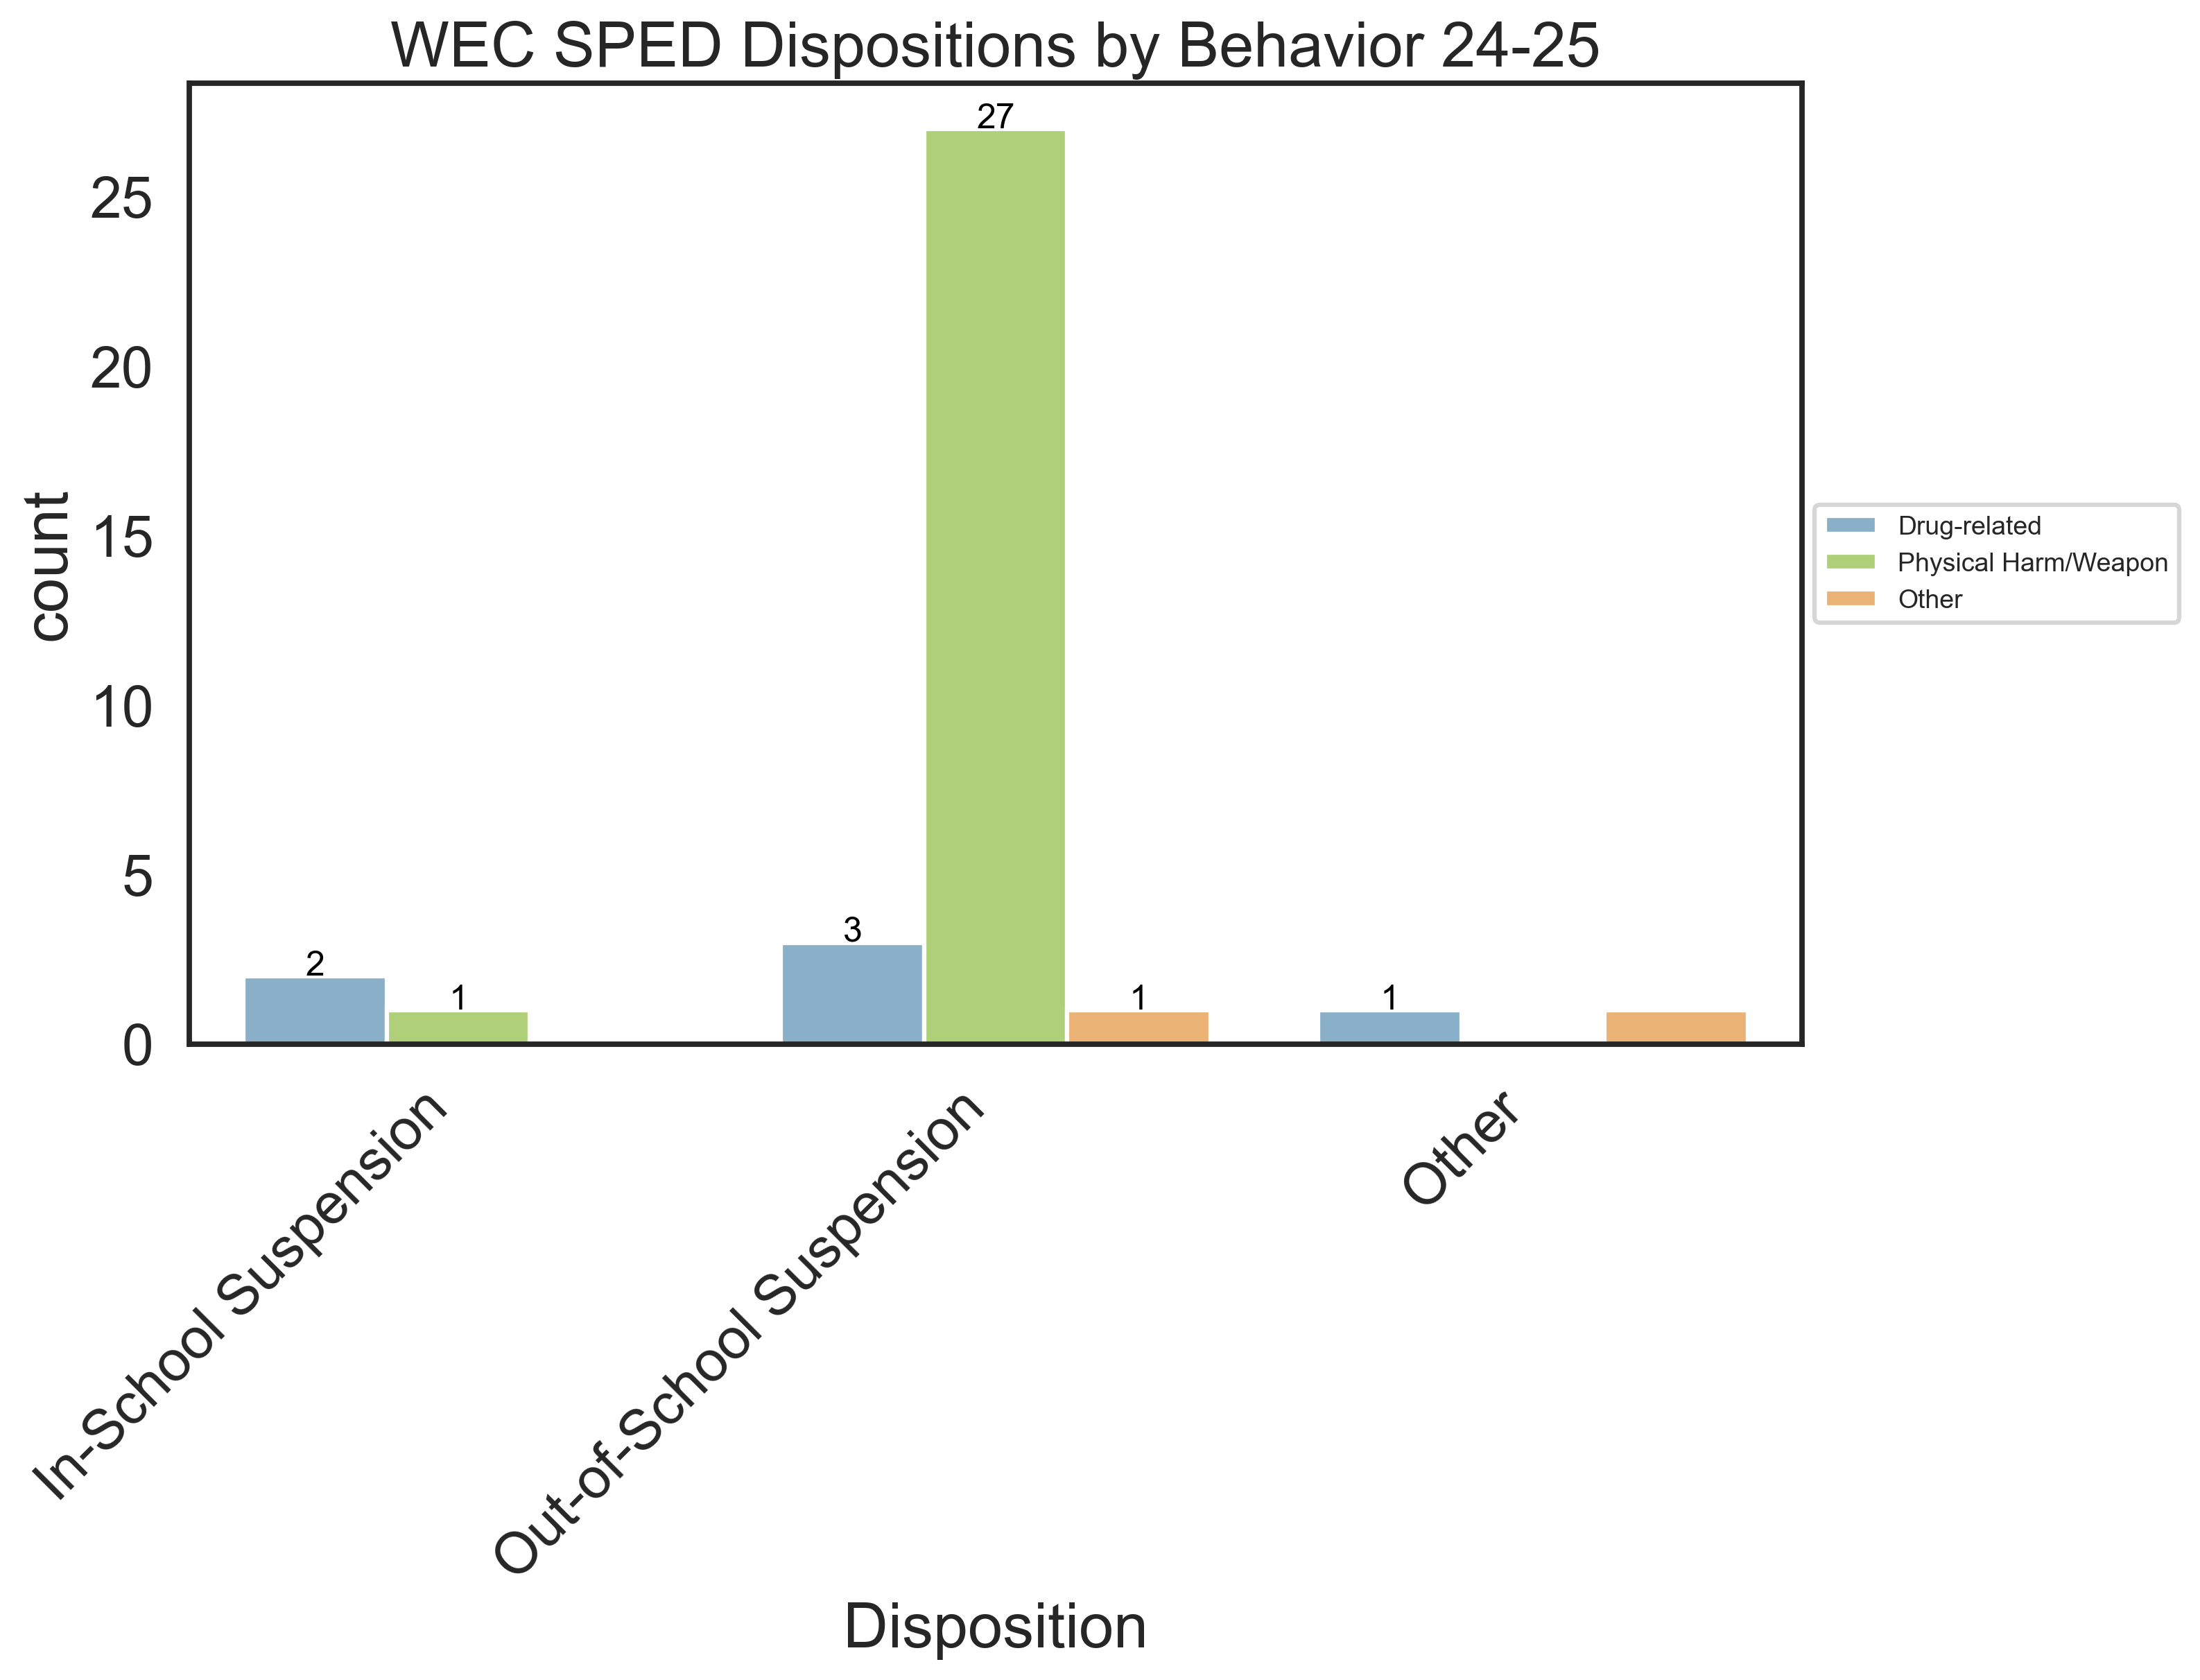

In [62]:
fig = plt.figure(figsize=(10,6))

custom_palette={'Physical Harm/Weapon':'#b3de69', 'Drug-related':'#80b1d3', 'Other':'#fdb462'}

ax = sns.countplot(x='Disposition',
              data=discipline_cleaned[discipline_cleaned['School']=='WEC SPED'], 
              palette=custom_palette, 
              hue='Behavior Category'
            )

for p in ax.patches[0:6]:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .05, f'{height:.0f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f'WEC SPED Dispositions by Behavior {school_year}')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(loc='center left', fontsize=9, bbox_to_anchor=(1, 0.5))

plt.savefig('Outputs/wec_dispositions_by_behavior', bbox_inches='tight')
plt.show()

C:\Users\mcyang\AppData\Local\Temp\ipykernel_3636\2961215078.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


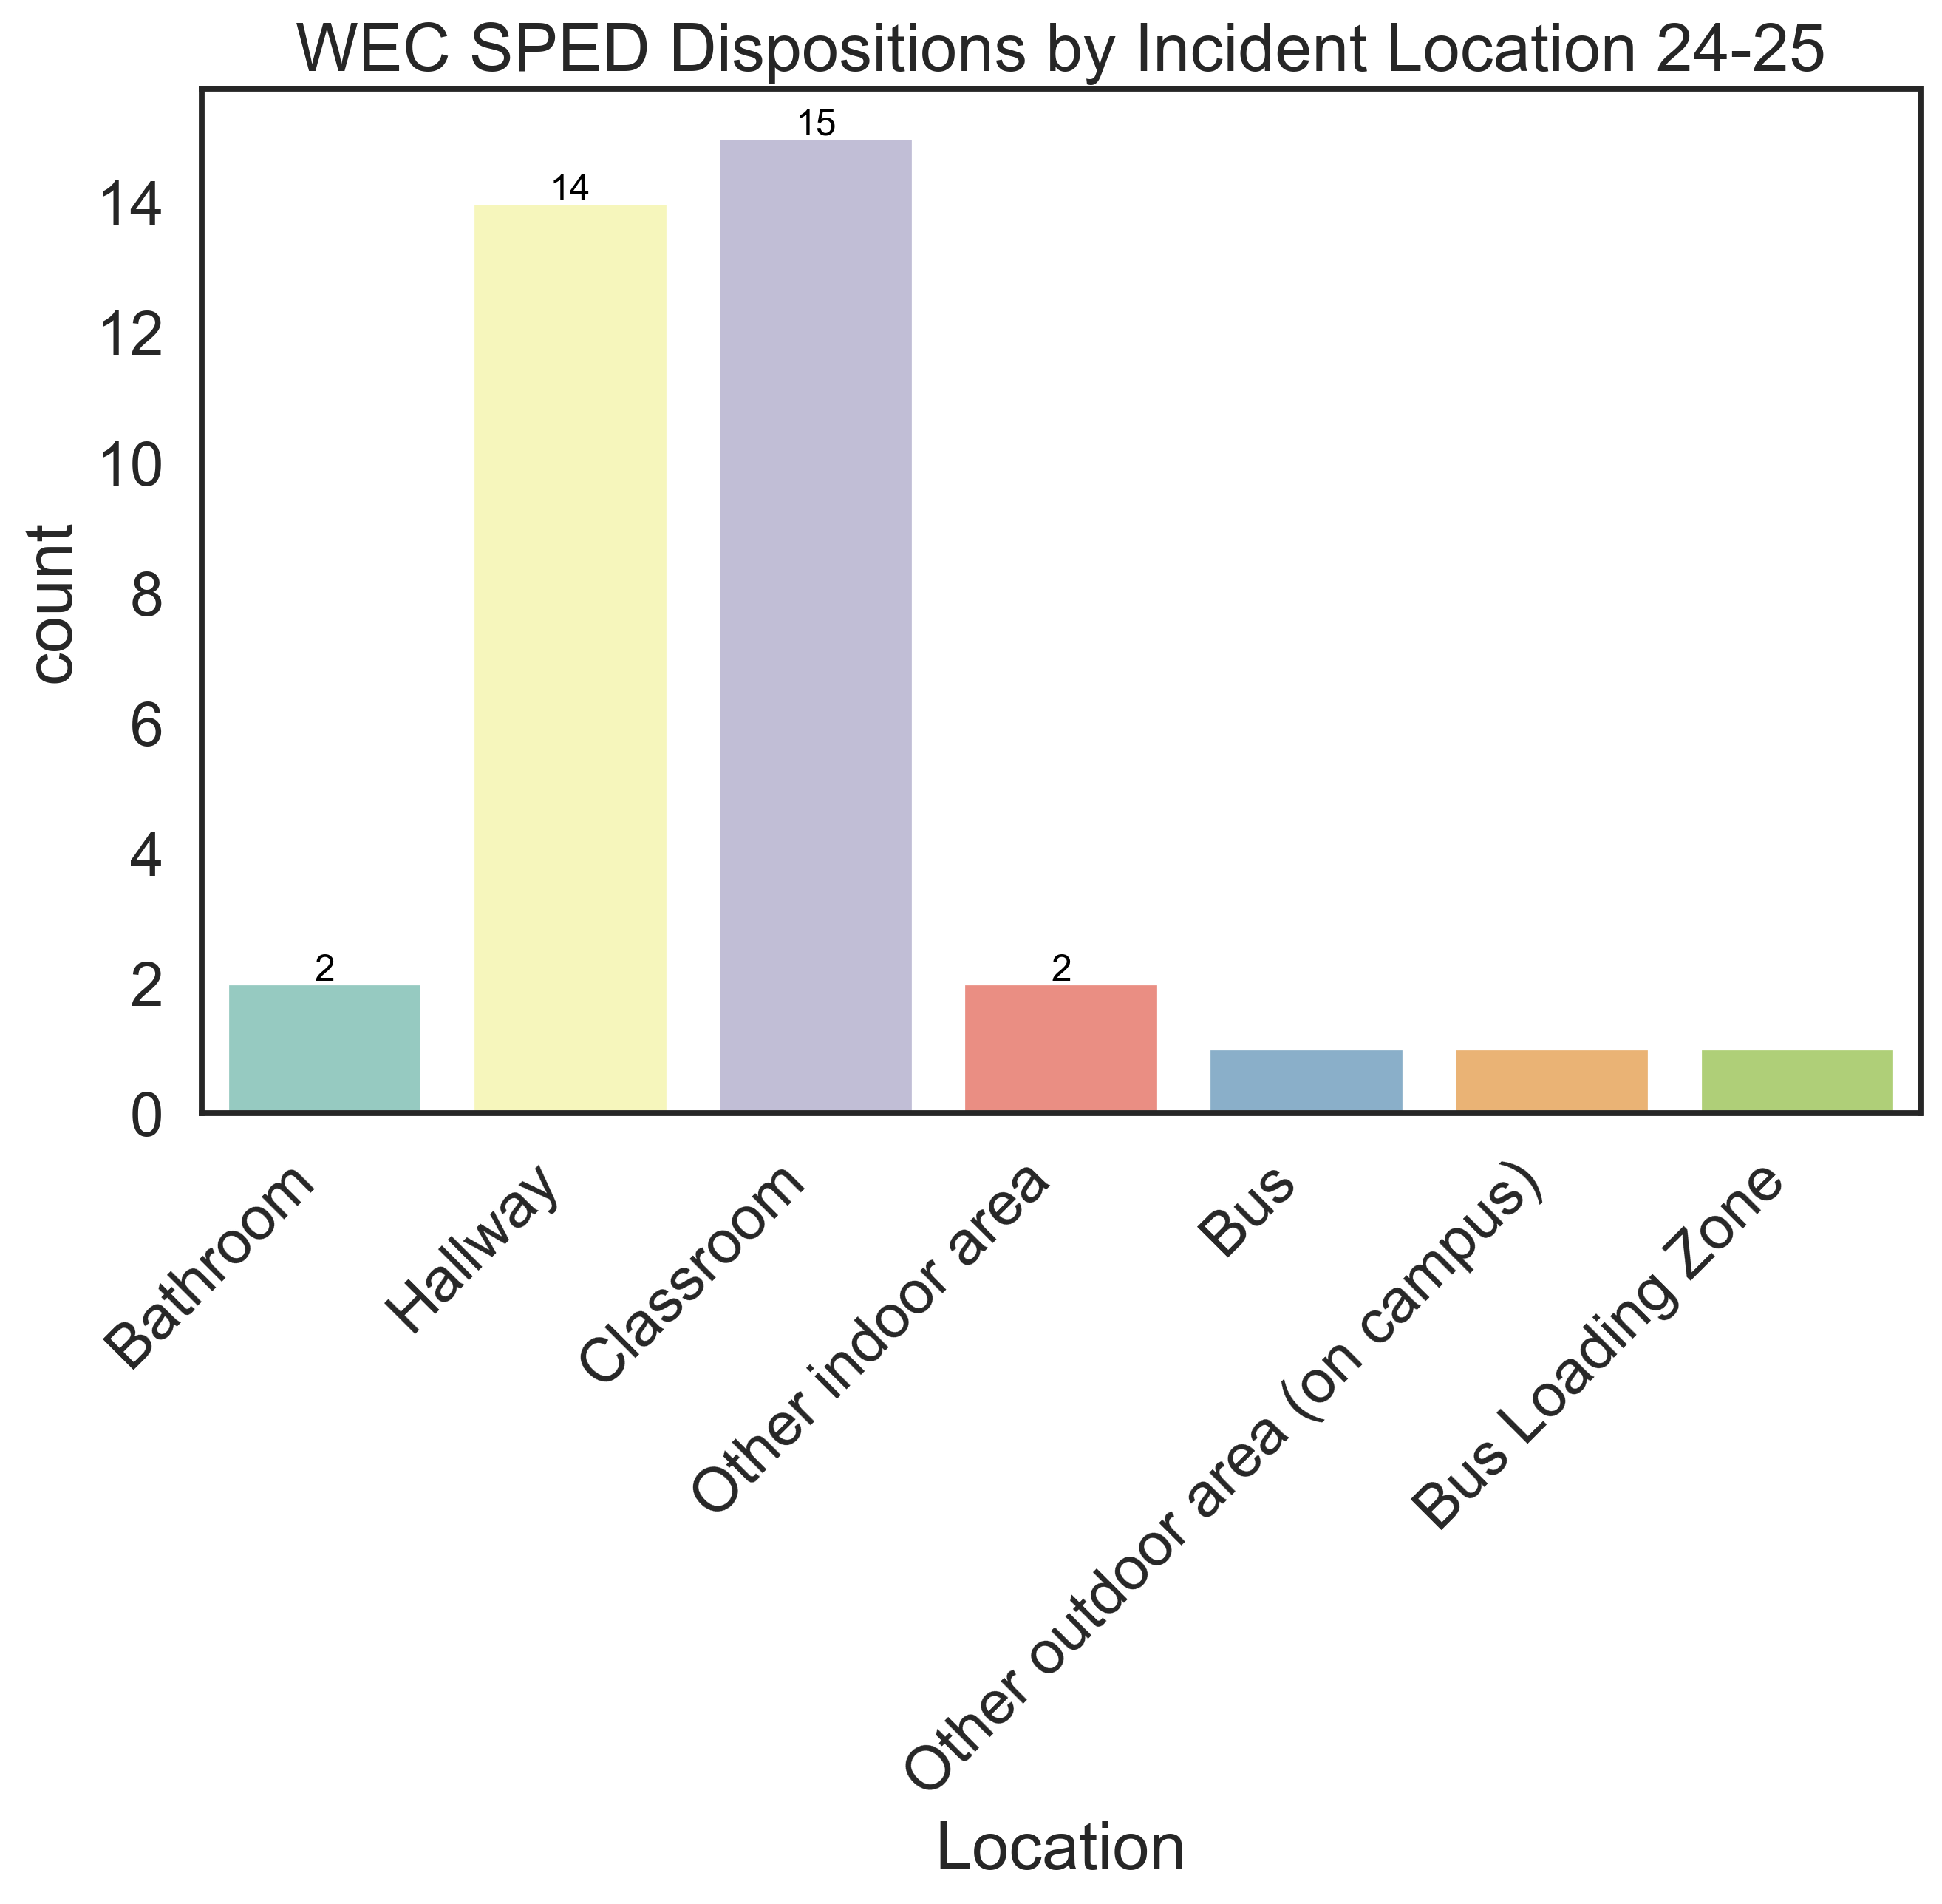

In [119]:
fig = plt.figure(figsize=(10,6))

ax = sns.countplot(x='Location',
              data=discipline_cleaned[discipline_cleaned['School']=='WEC SPED'], 
              palette='Set3', 
              hue='Location'
            )

for p in ax.patches[0:4]:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .05, f'{height:.0f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f'WEC SPED Dispositions by Incident Location {school_year}')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# ax.legend(loc='center left', fontsize=9, bbox_to_anchor=(1, 0.5))

plt.savefig('Outputs/wec_dispositions_by_location', bbox_inches='tight')
plt.show()

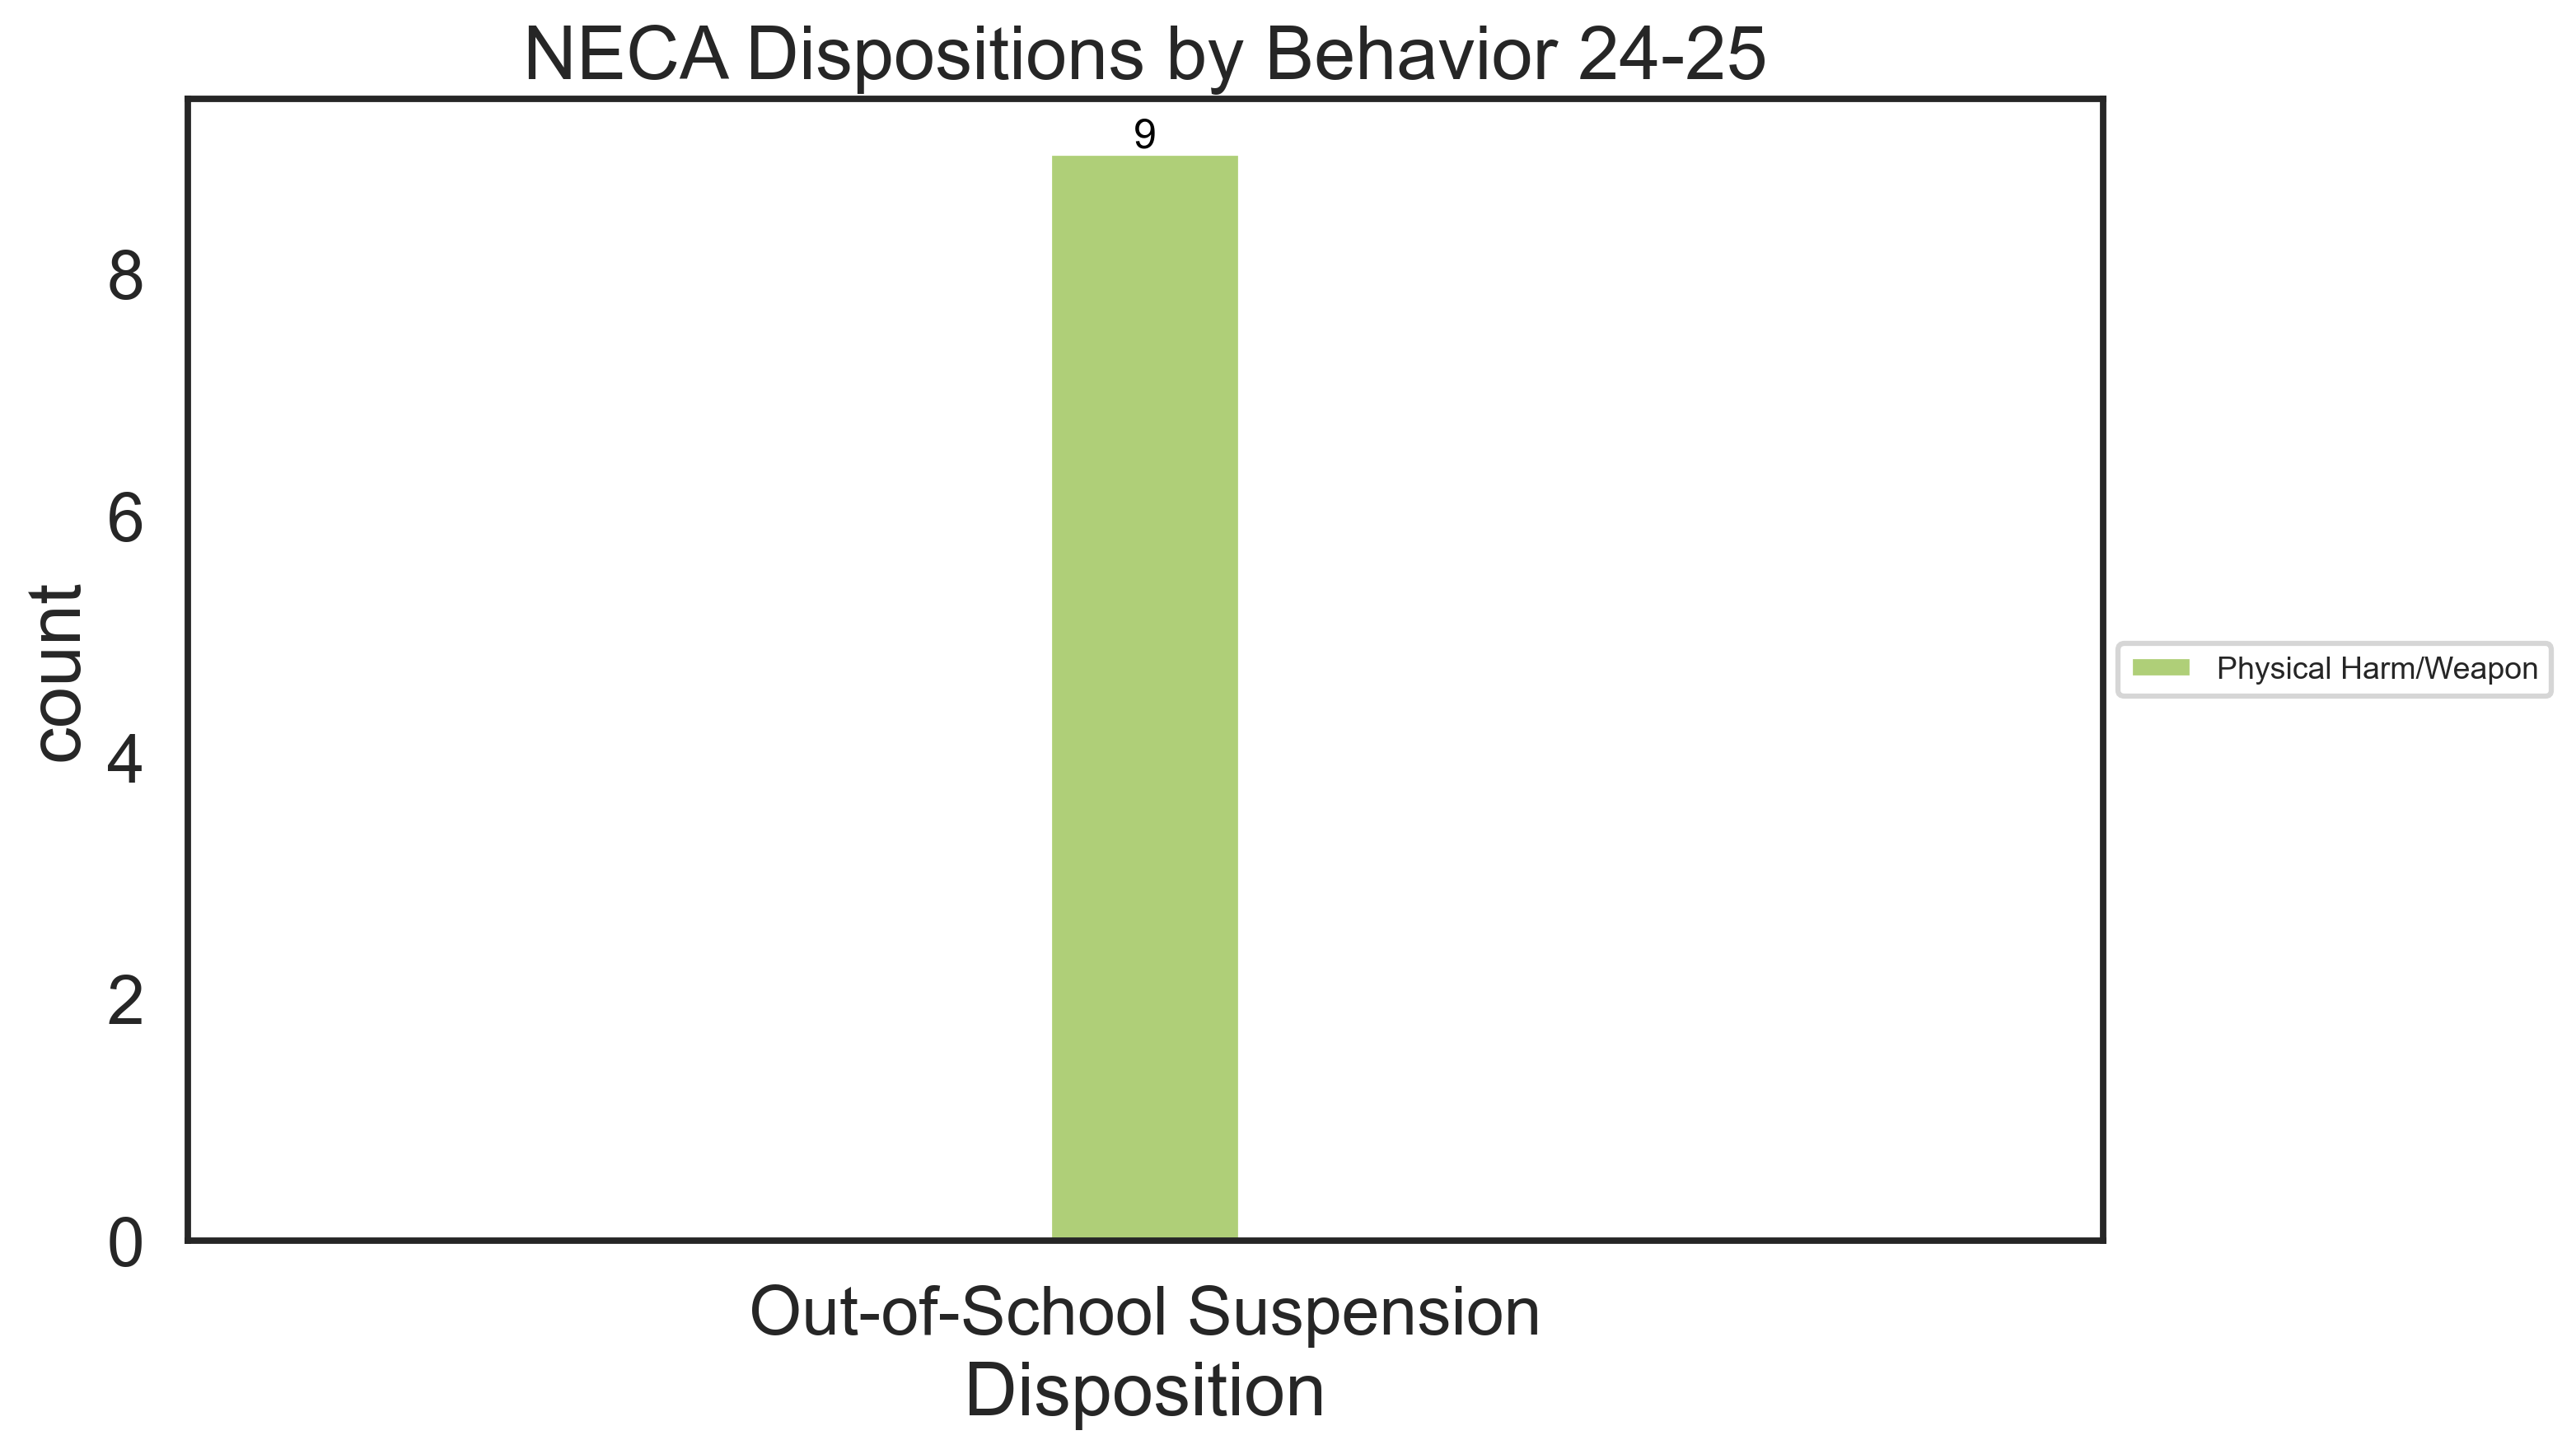

In [63]:
fig = plt.figure(figsize=(10,6))

custom_palette={'Physical Harm/Weapon':'#b3de69', 'Drug-related':'#80b1d3', 'Other':'#fdb462'}

ax = sns.countplot(x='Disposition',
              data=discipline_cleaned[discipline_cleaned['School']=='NECA'], 
              palette=custom_palette, 
              hue='Behavior Category', width=0.1
            )

for p in ax.patches[0:1]:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .05, f'{height:.0f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f'NECA Dispositions by Behavior {school_year}')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(loc='center left', fontsize=9, bbox_to_anchor=(1, 0.5))

plt.savefig('Outputs/neca_dispositions_by_behavior', bbox_inches='tight')
plt.show()

C:\Users\mcyang\AppData\Local\Temp\ipykernel_3636\545625499.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


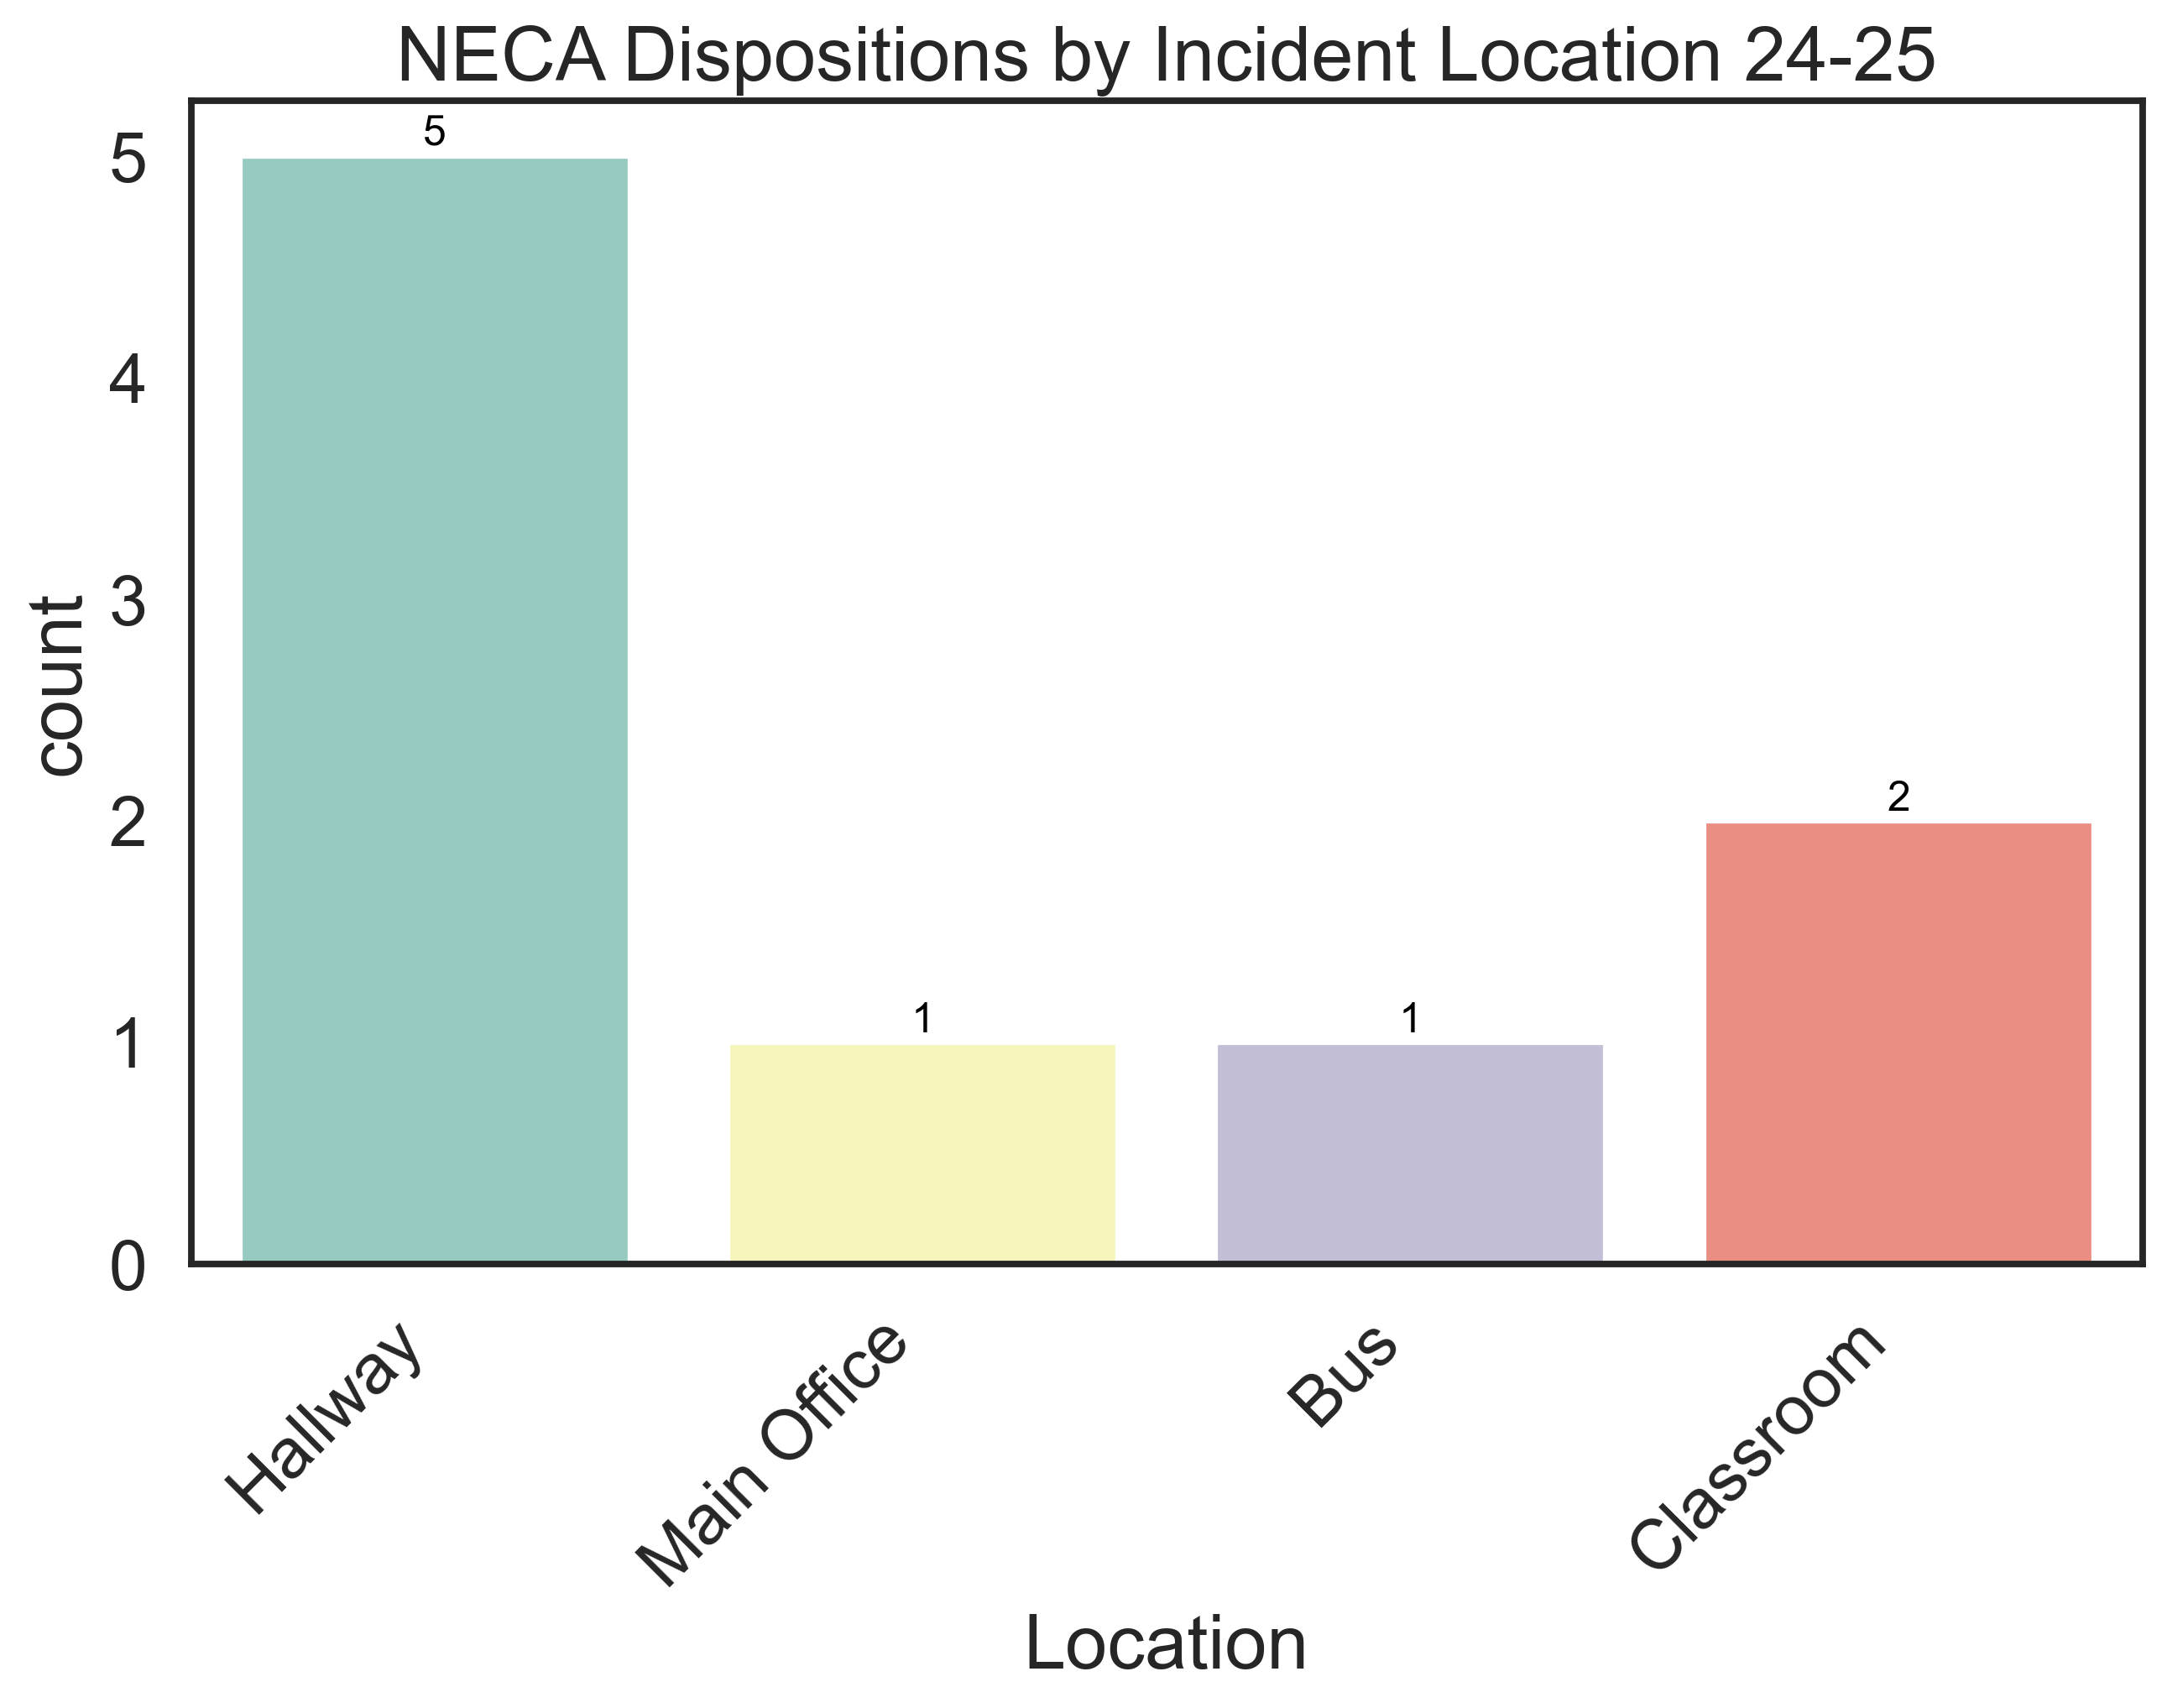

In [118]:
fig = plt.figure(figsize=(10,6))

ax = sns.countplot(x='Location',
              data=discipline_cleaned[discipline_cleaned['School']=='NECA'], 
              palette='Set3', 
              hue='Location'
            )

for p in ax.patches[0:4]:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .05, f'{height:.0f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f'NECA Dispositions by Incident Location {school_year}')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# ax.legend(loc='center left', fontsize=9, bbox_to_anchor=(1, 0.5))

plt.savefig('Outputs/neca_dispositions_by_location', bbox_inches='tight')
plt.show()

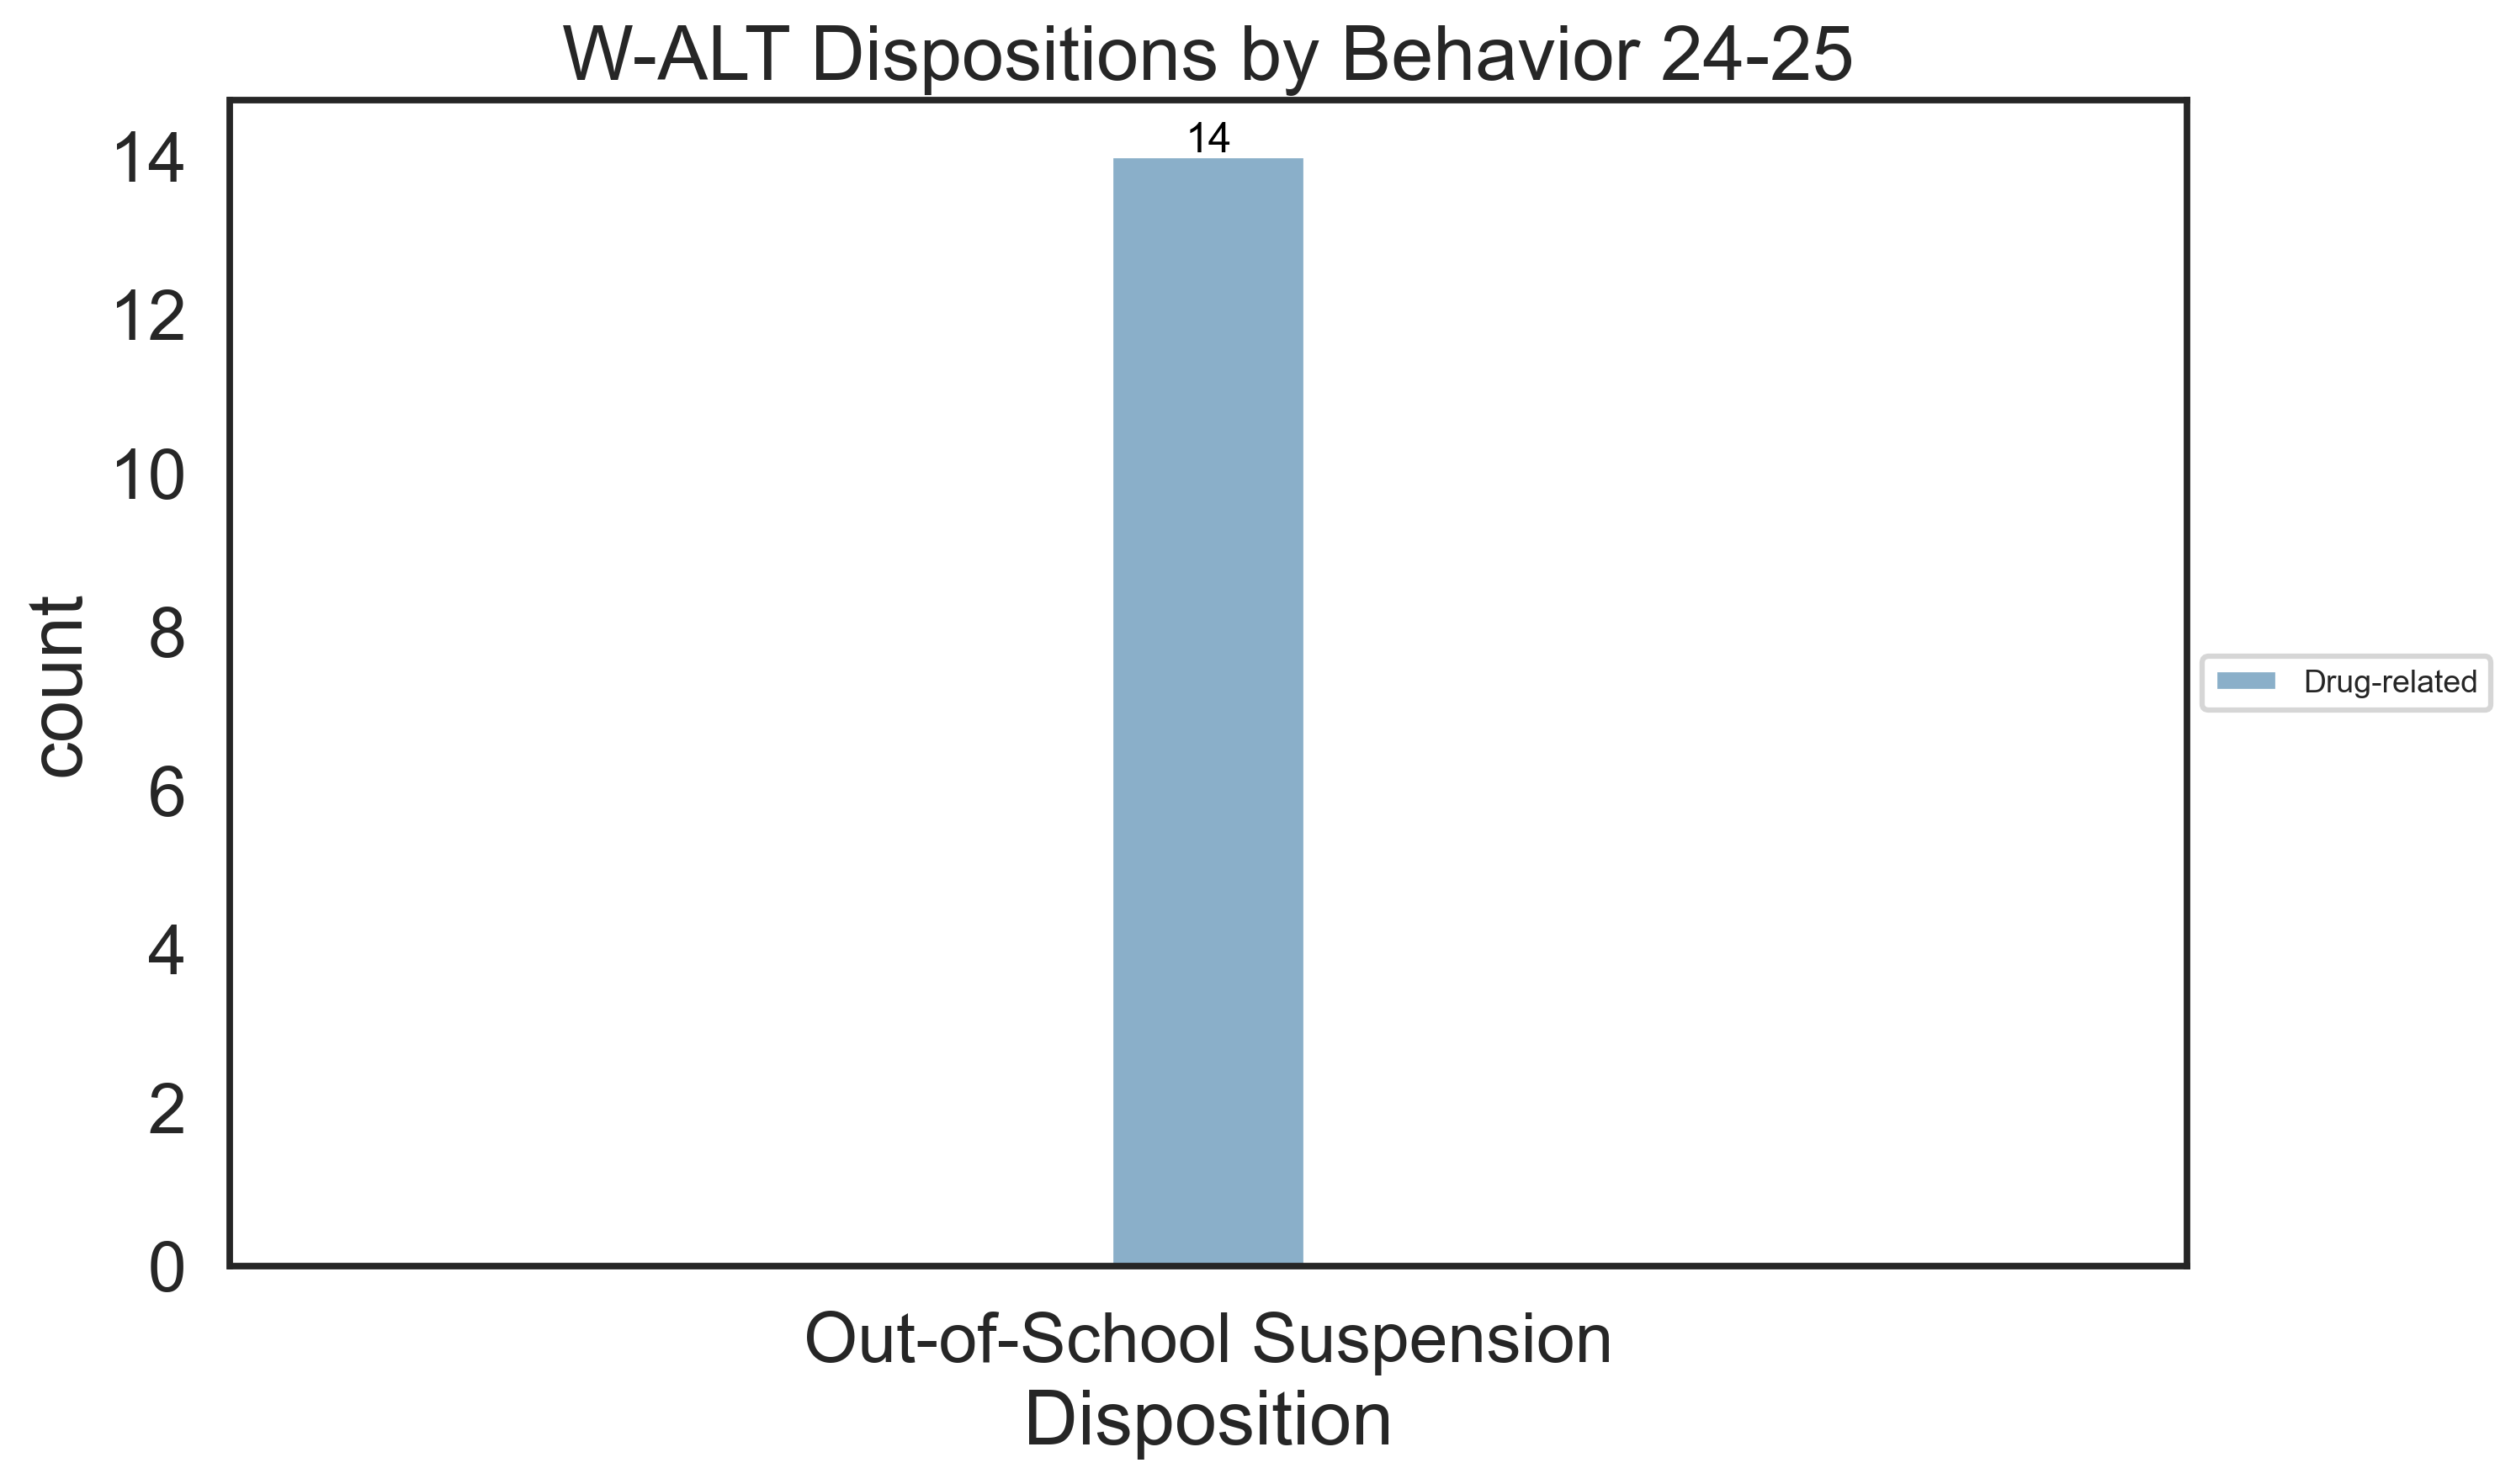

In [64]:
fig = plt.figure(figsize=(10,6))

custom_palette={'Physical Harm/Weapon':'#b3de69', 'Drug-related':'#80b1d3', 'Other':'#fdb462'}

ax = sns.countplot(x='Disposition',
              data=discipline_cleaned[discipline_cleaned['School']=='W-ALT'], 
              palette=custom_palette, 
              hue='Behavior Category',
            width=0.1
            )

for p in ax.patches[0:1]:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .05, f'{height:.0f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f'W-ALT Dispositions by Behavior {school_year}')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(loc='center left', fontsize=9, bbox_to_anchor=(1, 0.5))

plt.savefig('Outputs/walt_dispositions_by_behavior', bbox_inches='tight')
plt.show()

C:\Users\mcyang\AppData\Local\Temp\ipykernel_3636\2823163175.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


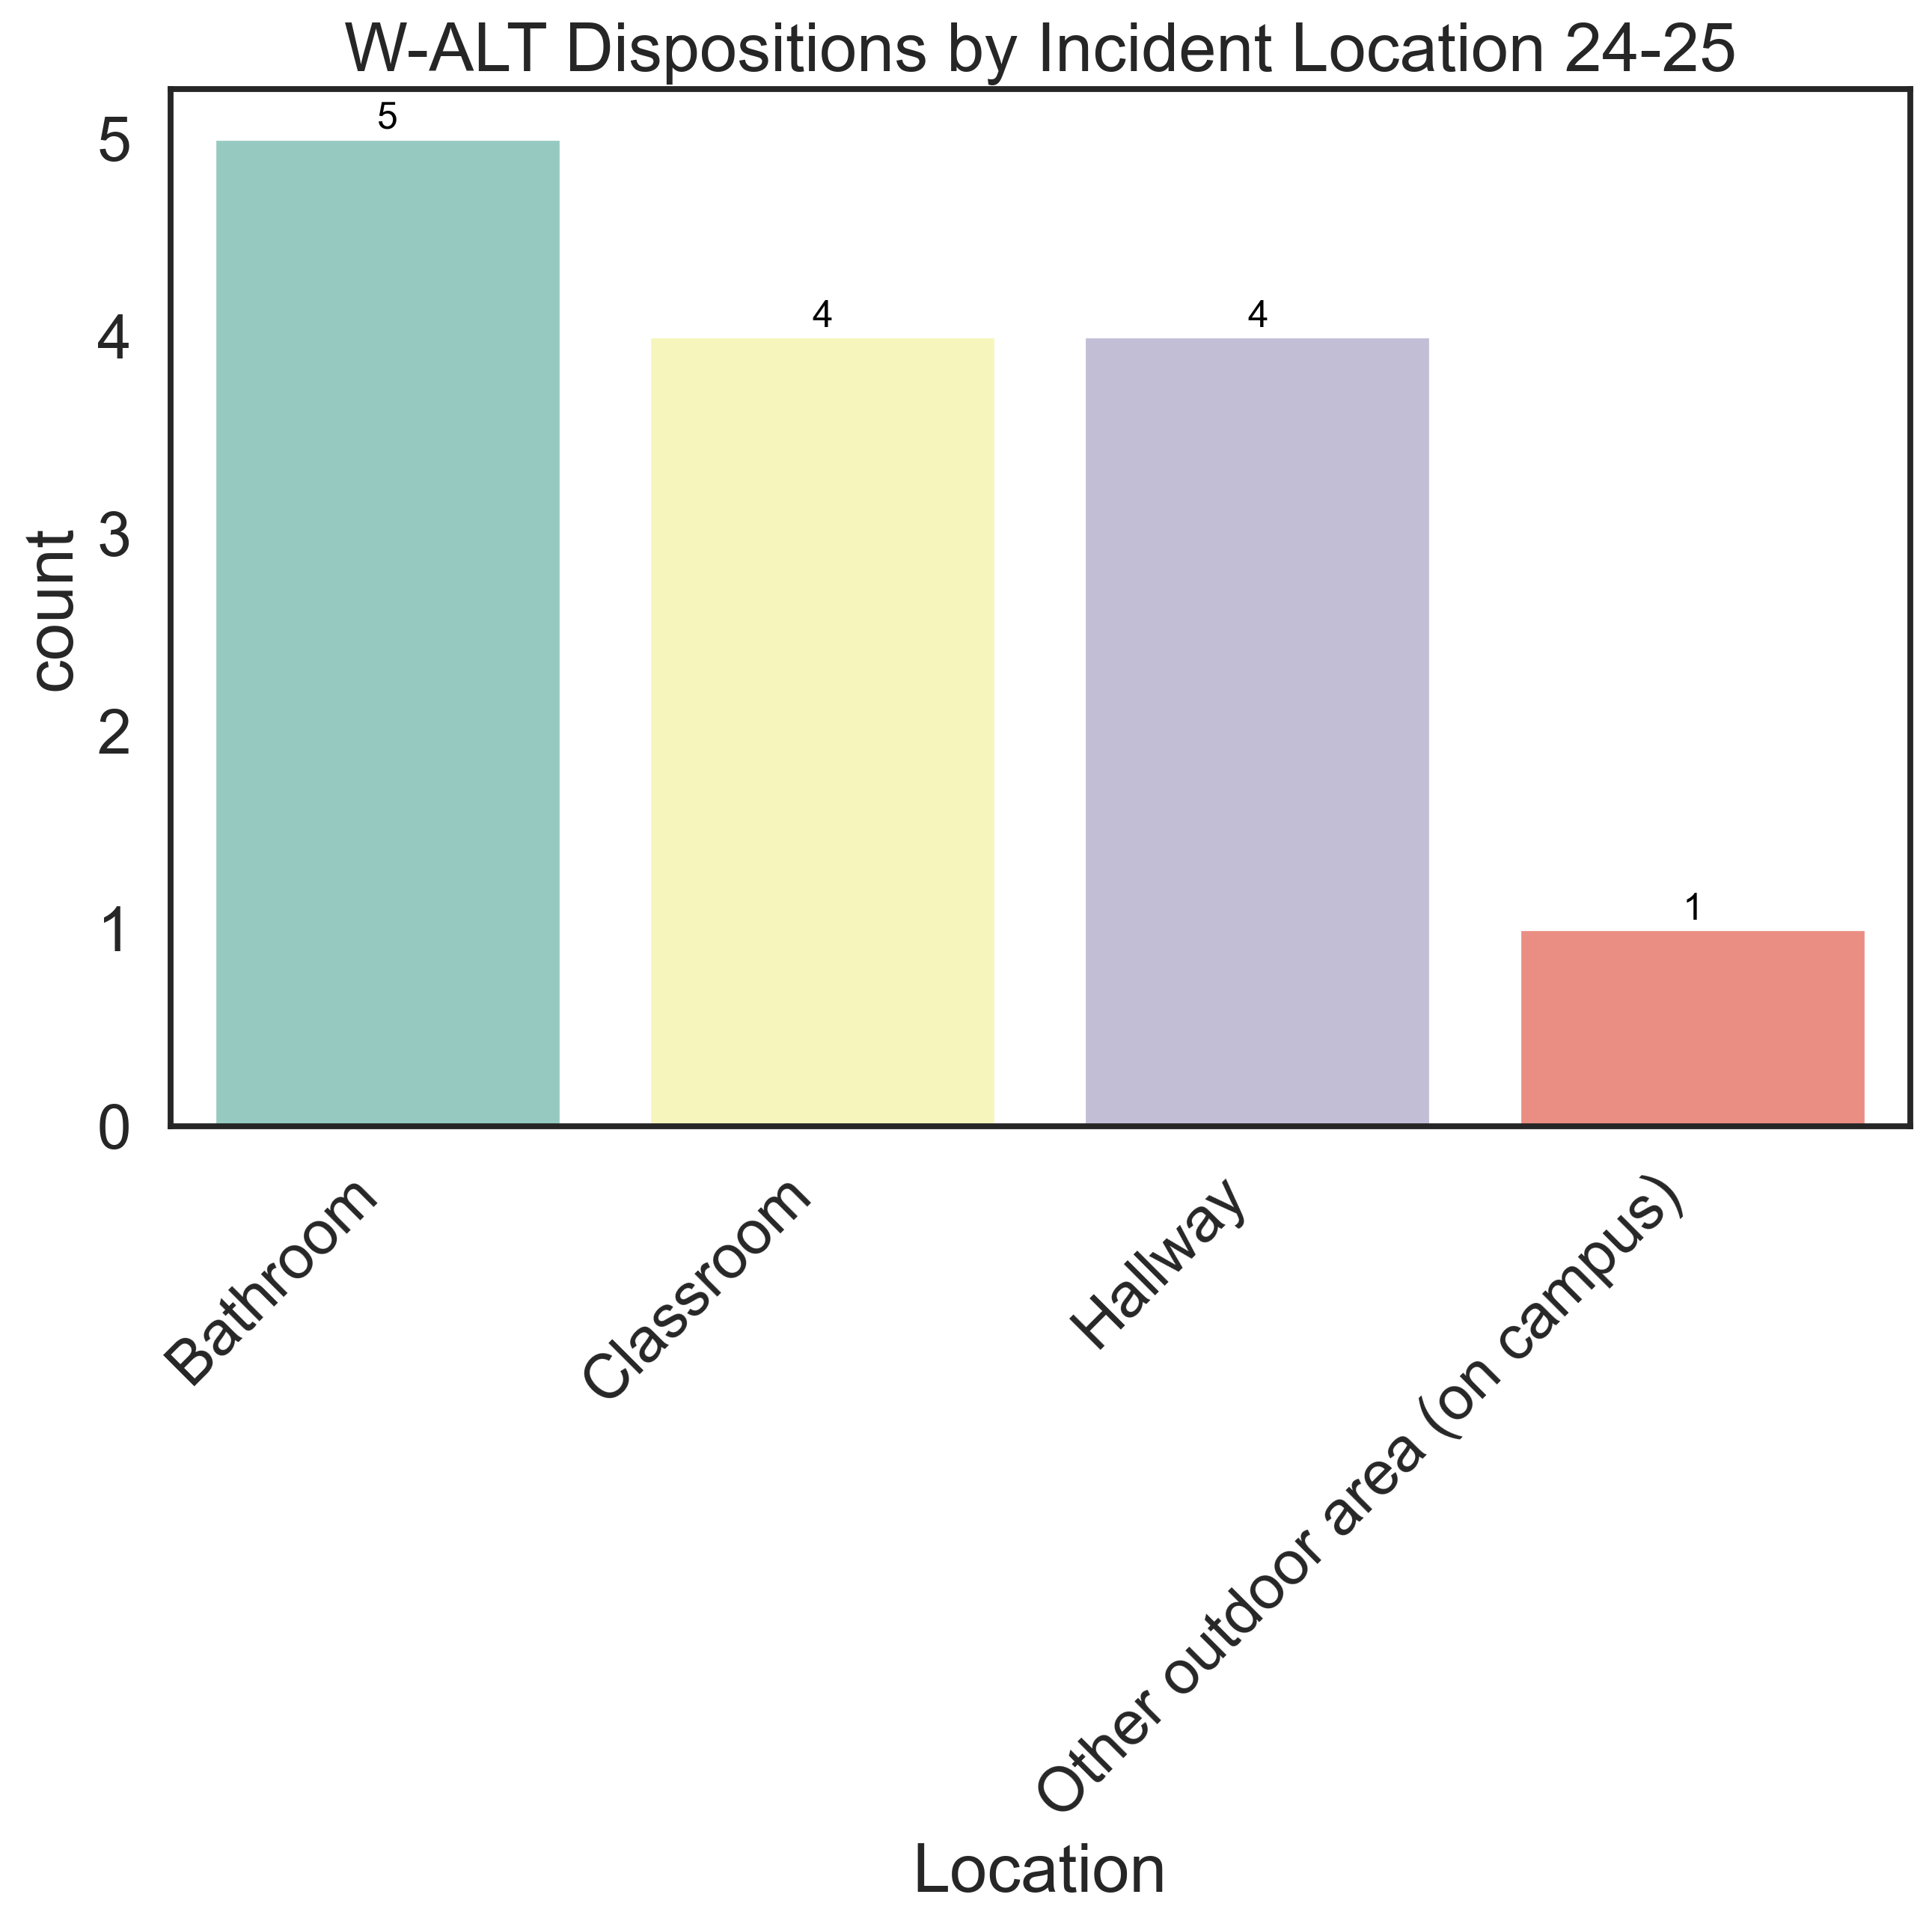

In [117]:
fig = plt.figure(figsize=(10,6))

ax = sns.countplot(x='Location',
              data=discipline_cleaned[discipline_cleaned['School']=='W-ALT'], 
              palette='Set3', 
              hue='Location'
            )

for p in ax.patches[0:4]:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .05, f'{height:.0f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f'W-ALT Dispositions by Incident Location {school_year}')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# ax.legend(loc='center left', fontsize=9, bbox_to_anchor=(1, 0.5))

plt.savefig('Outputs/walt_dispositions_by_location', bbox_inches='tight')
plt.show()

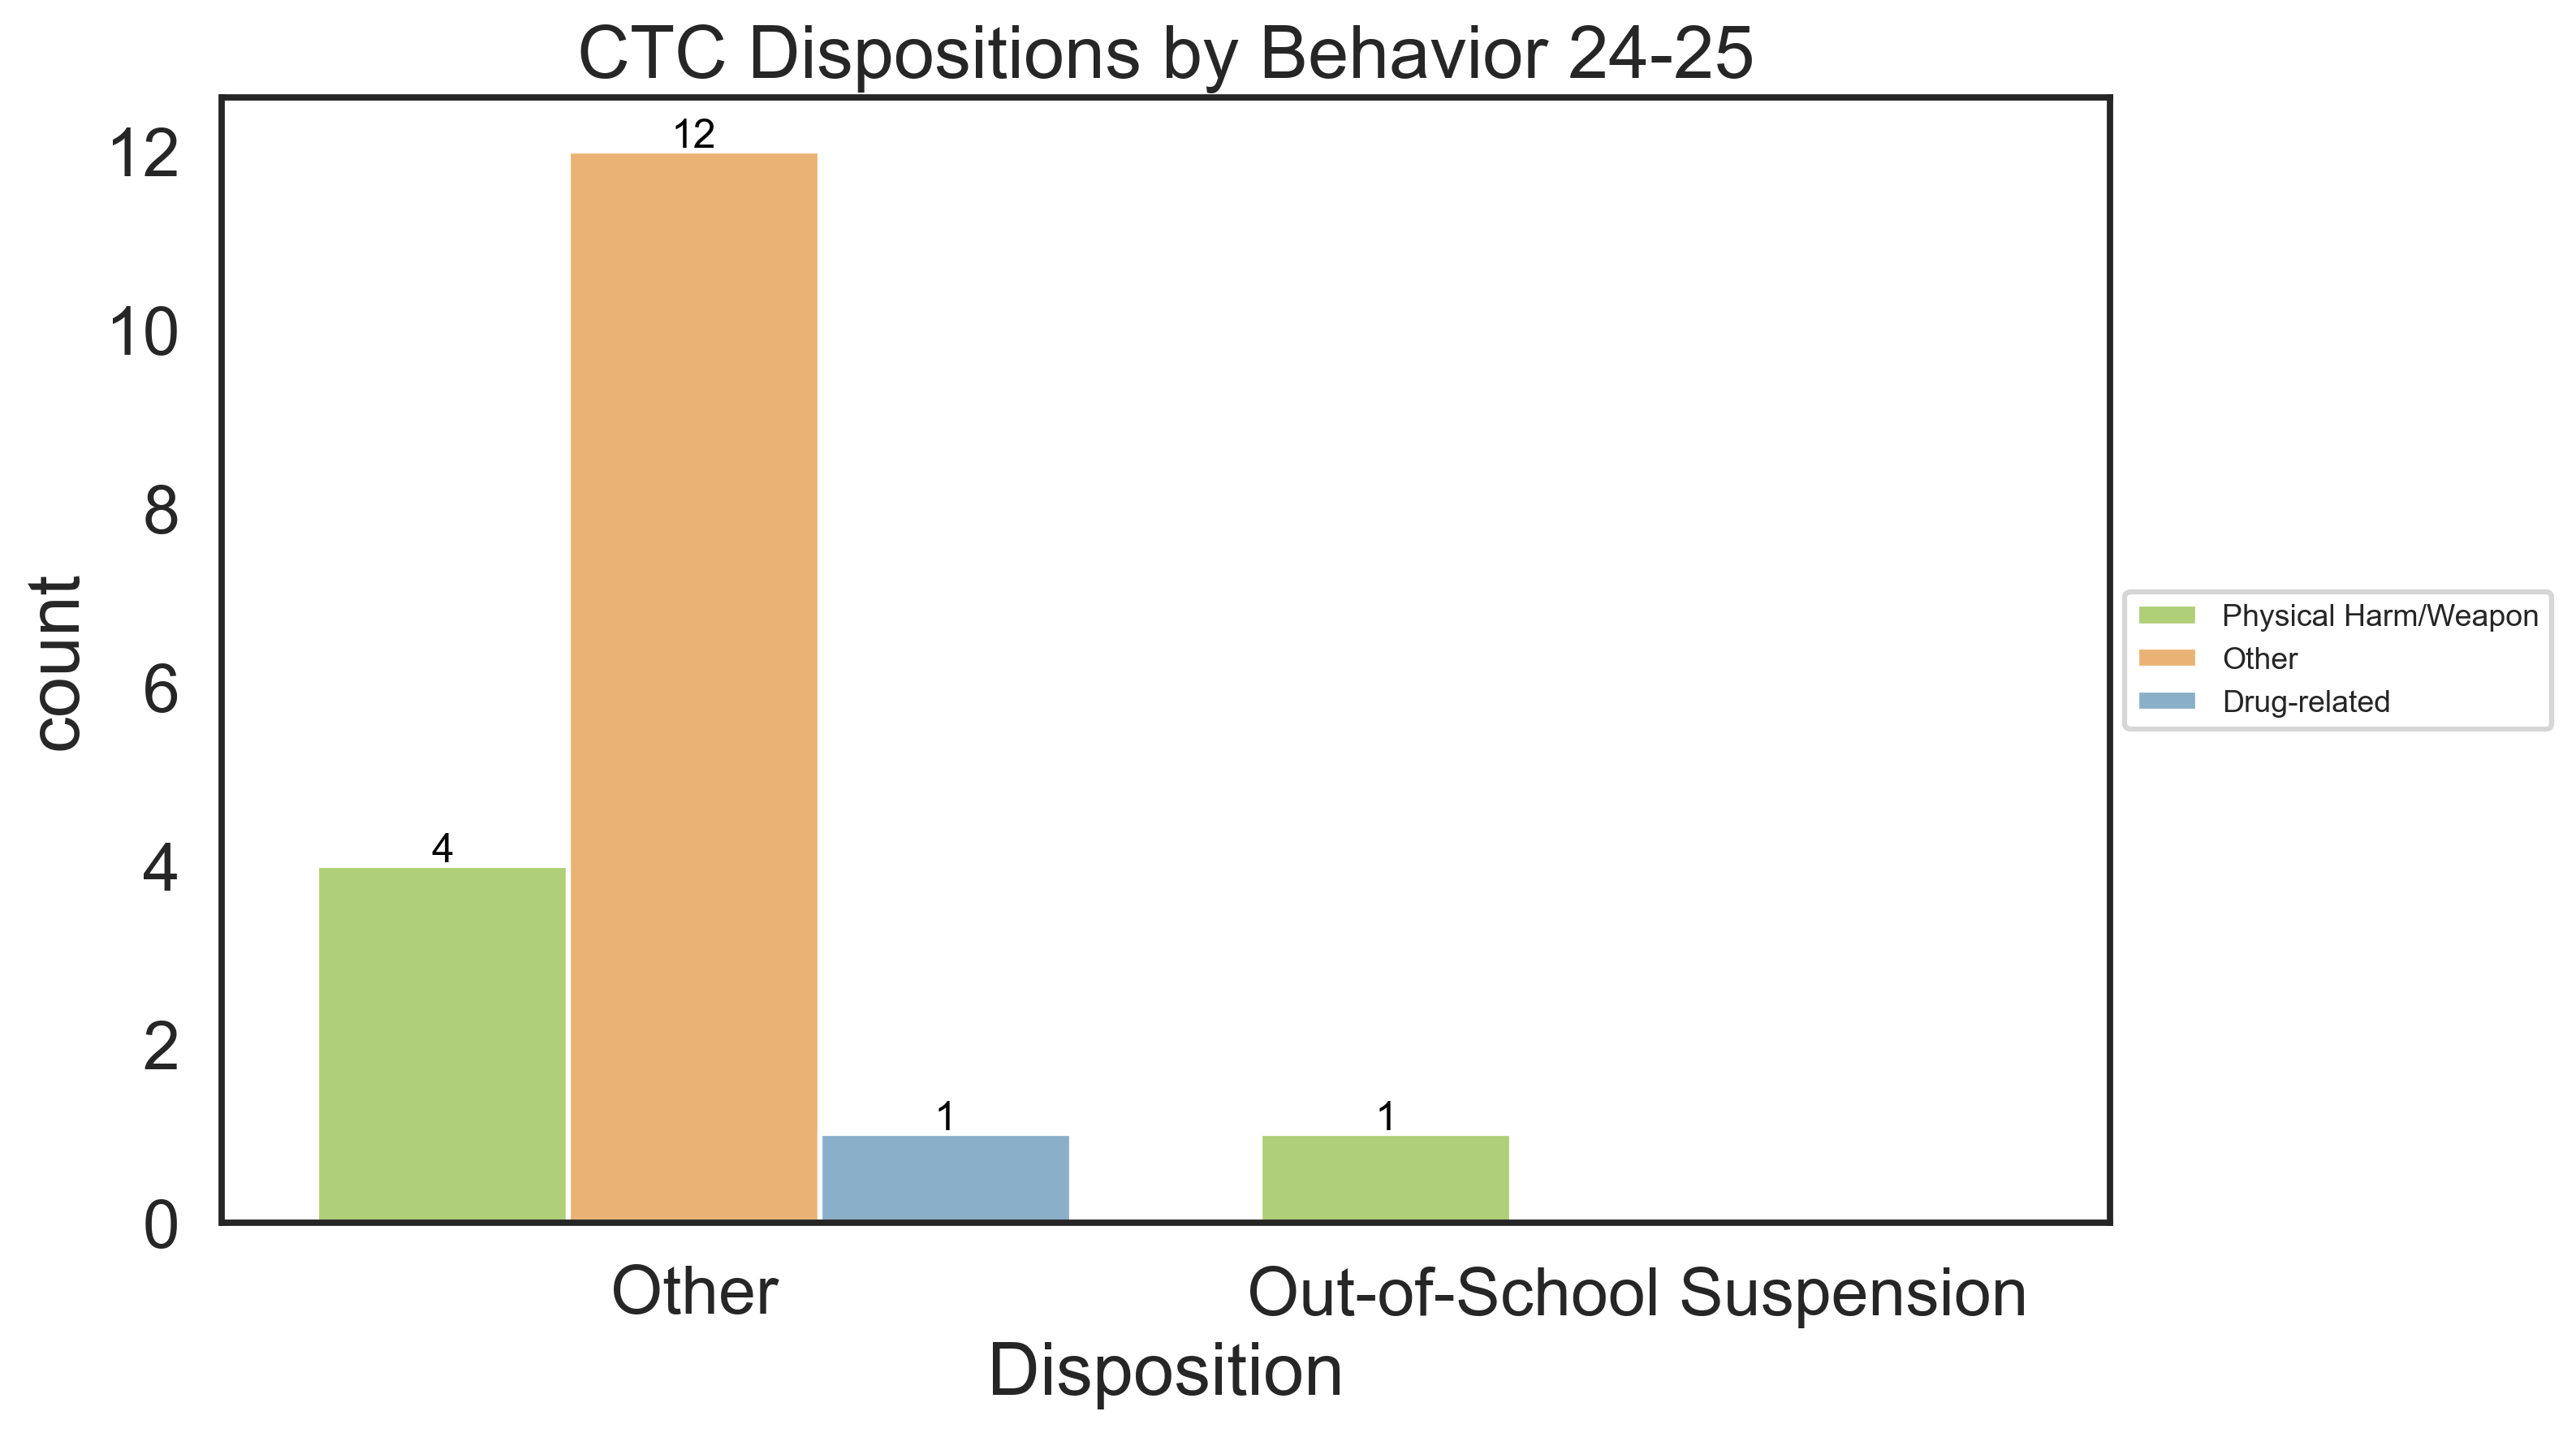

In [65]:
fig = plt.figure(figsize=(10,6))

custom_palette={'Physical Harm/Weapon':'#b3de69', 'Drug-related':'#80b1d3', 'Other':'#fdb462'}

ax = sns.countplot(x='Disposition',
              data=discipline_cleaned[discipline_cleaned['School']=='CTC'], 
              palette=custom_palette, 
              hue='Behavior Category'
            )

for p in ax.patches[0:4]:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .05, f'{height:.0f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f'CTC Dispositions by Behavior {school_year}')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(loc='center left', fontsize=9, bbox_to_anchor=(1, 0.5))

plt.savefig('Outputs/ctc_dispositions_by_behavior', bbox_inches='tight')
plt.show()

C:\Users\mcyang\AppData\Local\Temp\ipykernel_3636\2699946685.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


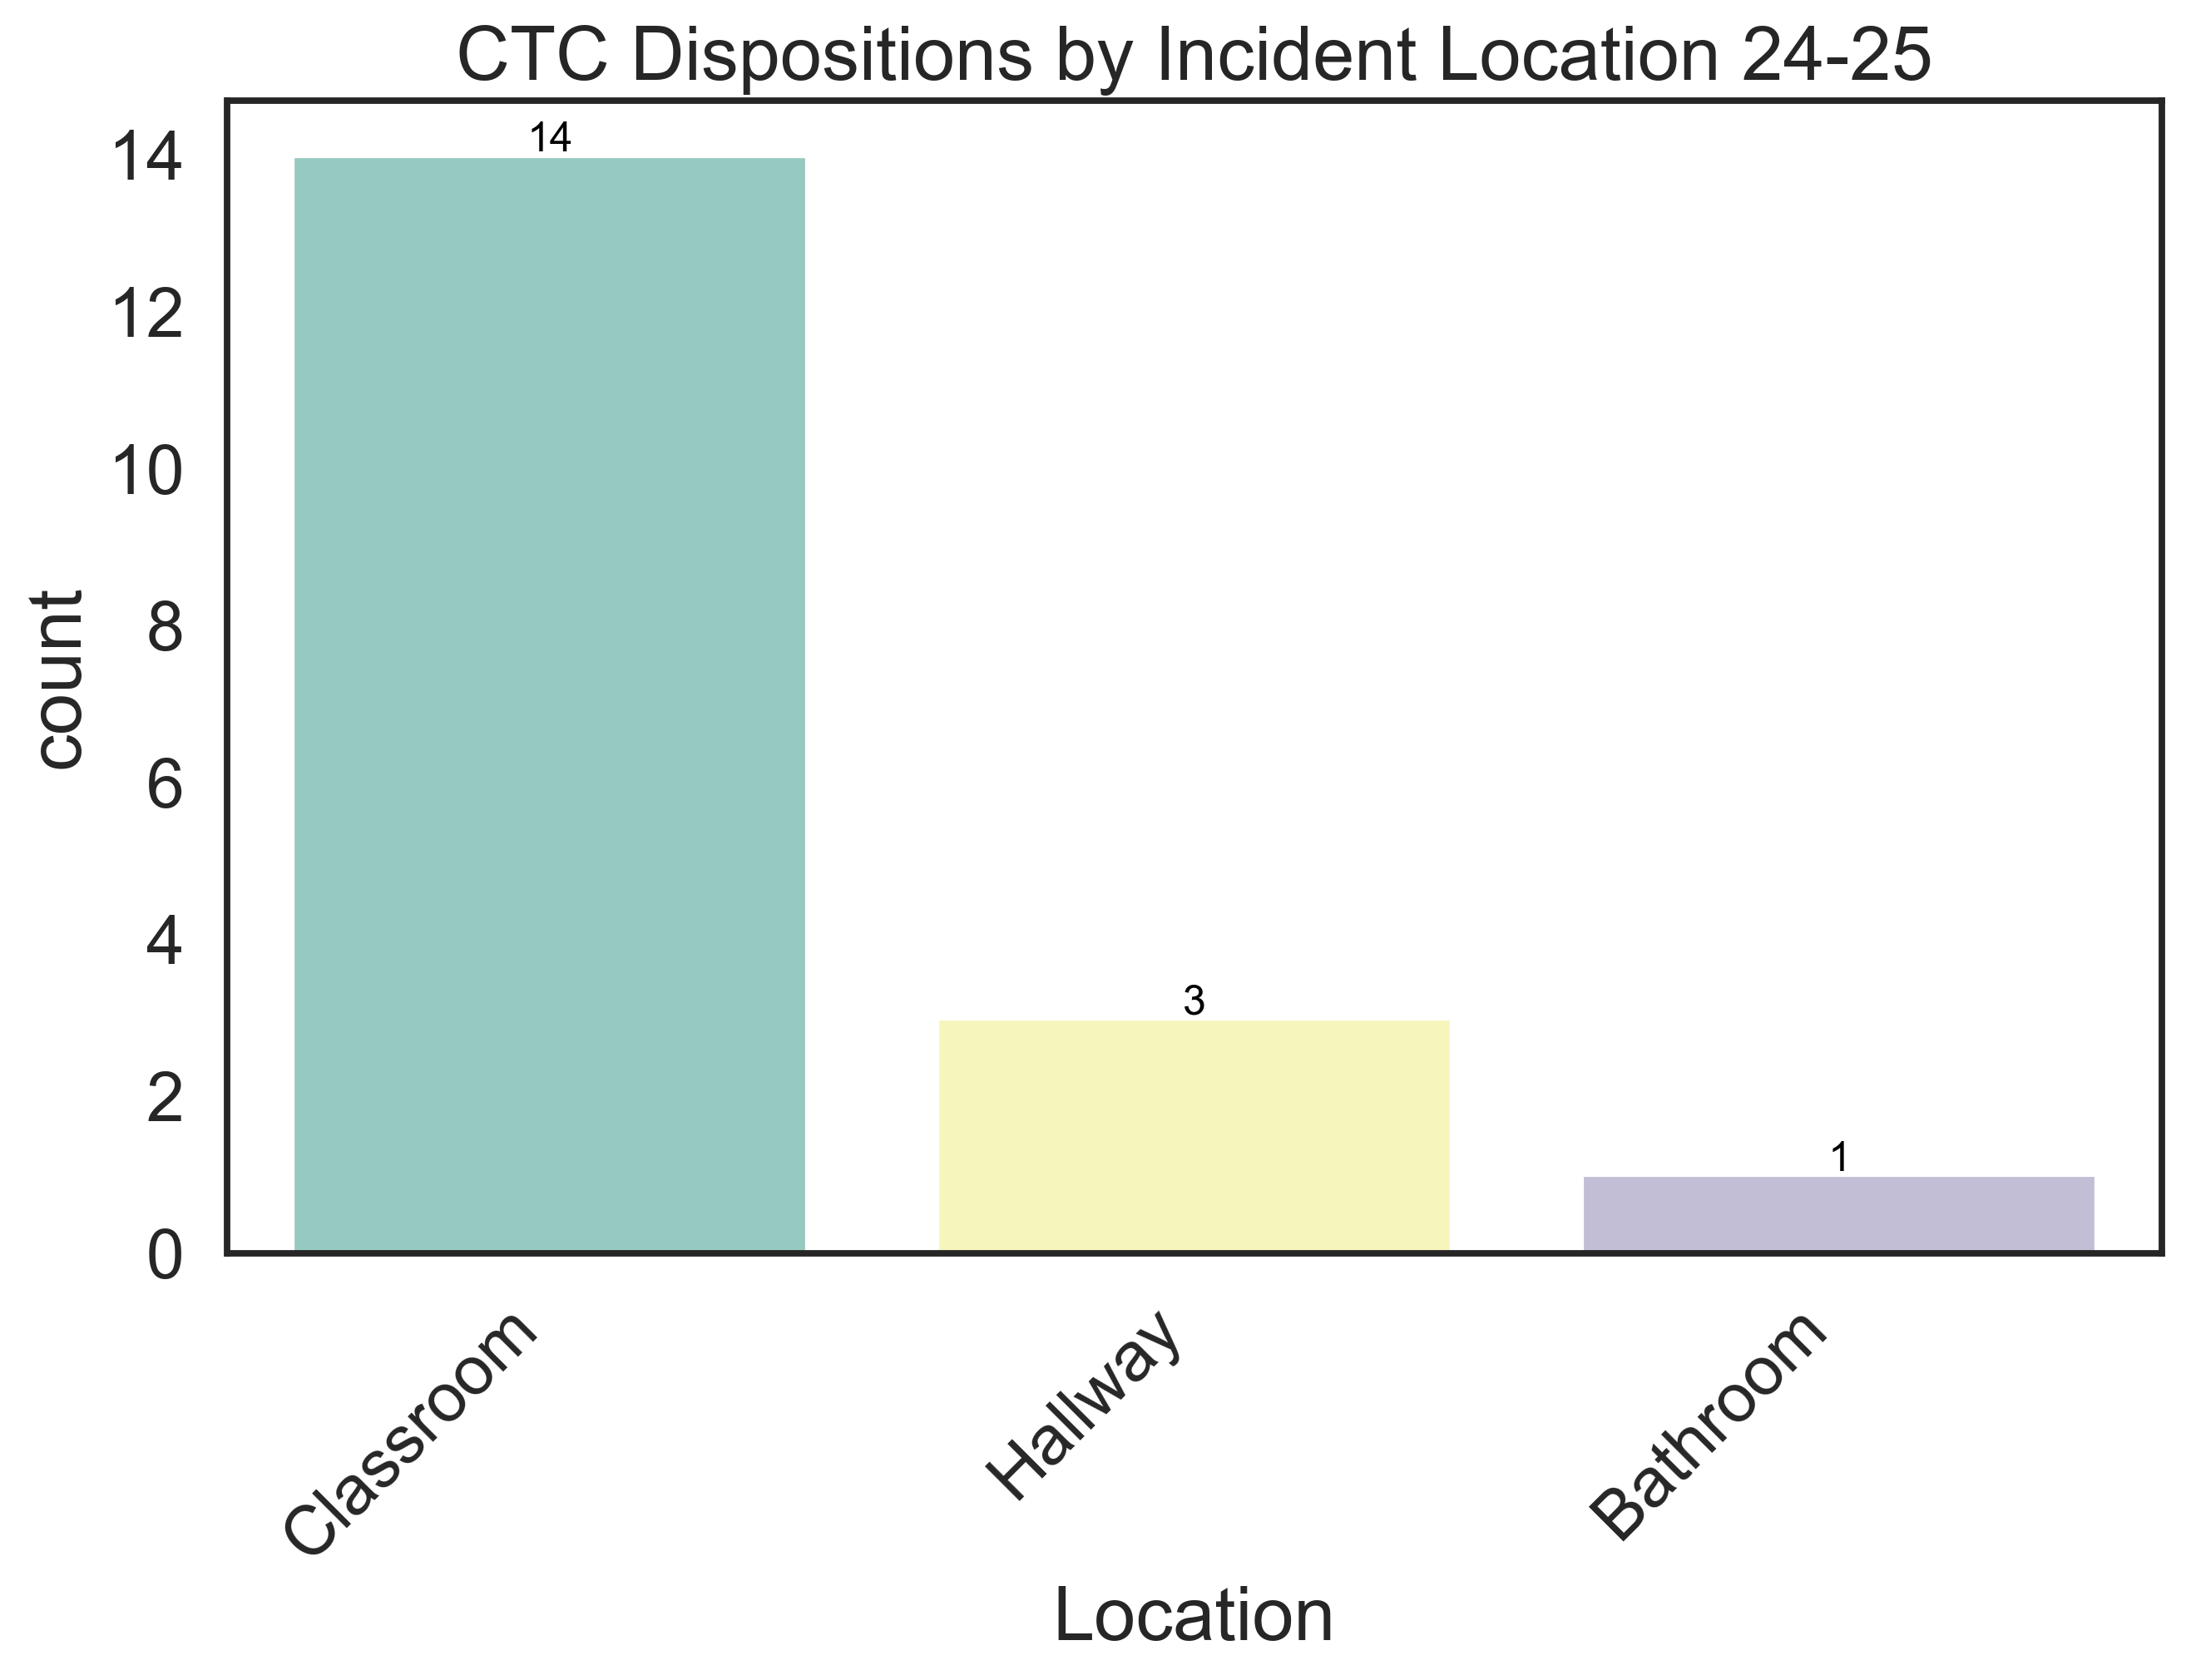

In [115]:
fig = plt.figure(figsize=(10,6))

ax = sns.countplot(x='Location',
              data=discipline_cleaned[discipline_cleaned['School']=='CTC'], 
              palette='Set3', 
              hue='Location'
            )

for p in ax.patches[0:4]:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .05, f'{height:.0f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f'CTC Dispositions by Incident Location {school_year}')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# ax.legend(loc='center left', fontsize=9, bbox_to_anchor=(1, 0.5))

plt.savefig('Outputs/ctc_dispositions_by_location', bbox_inches='tight')
plt.show()

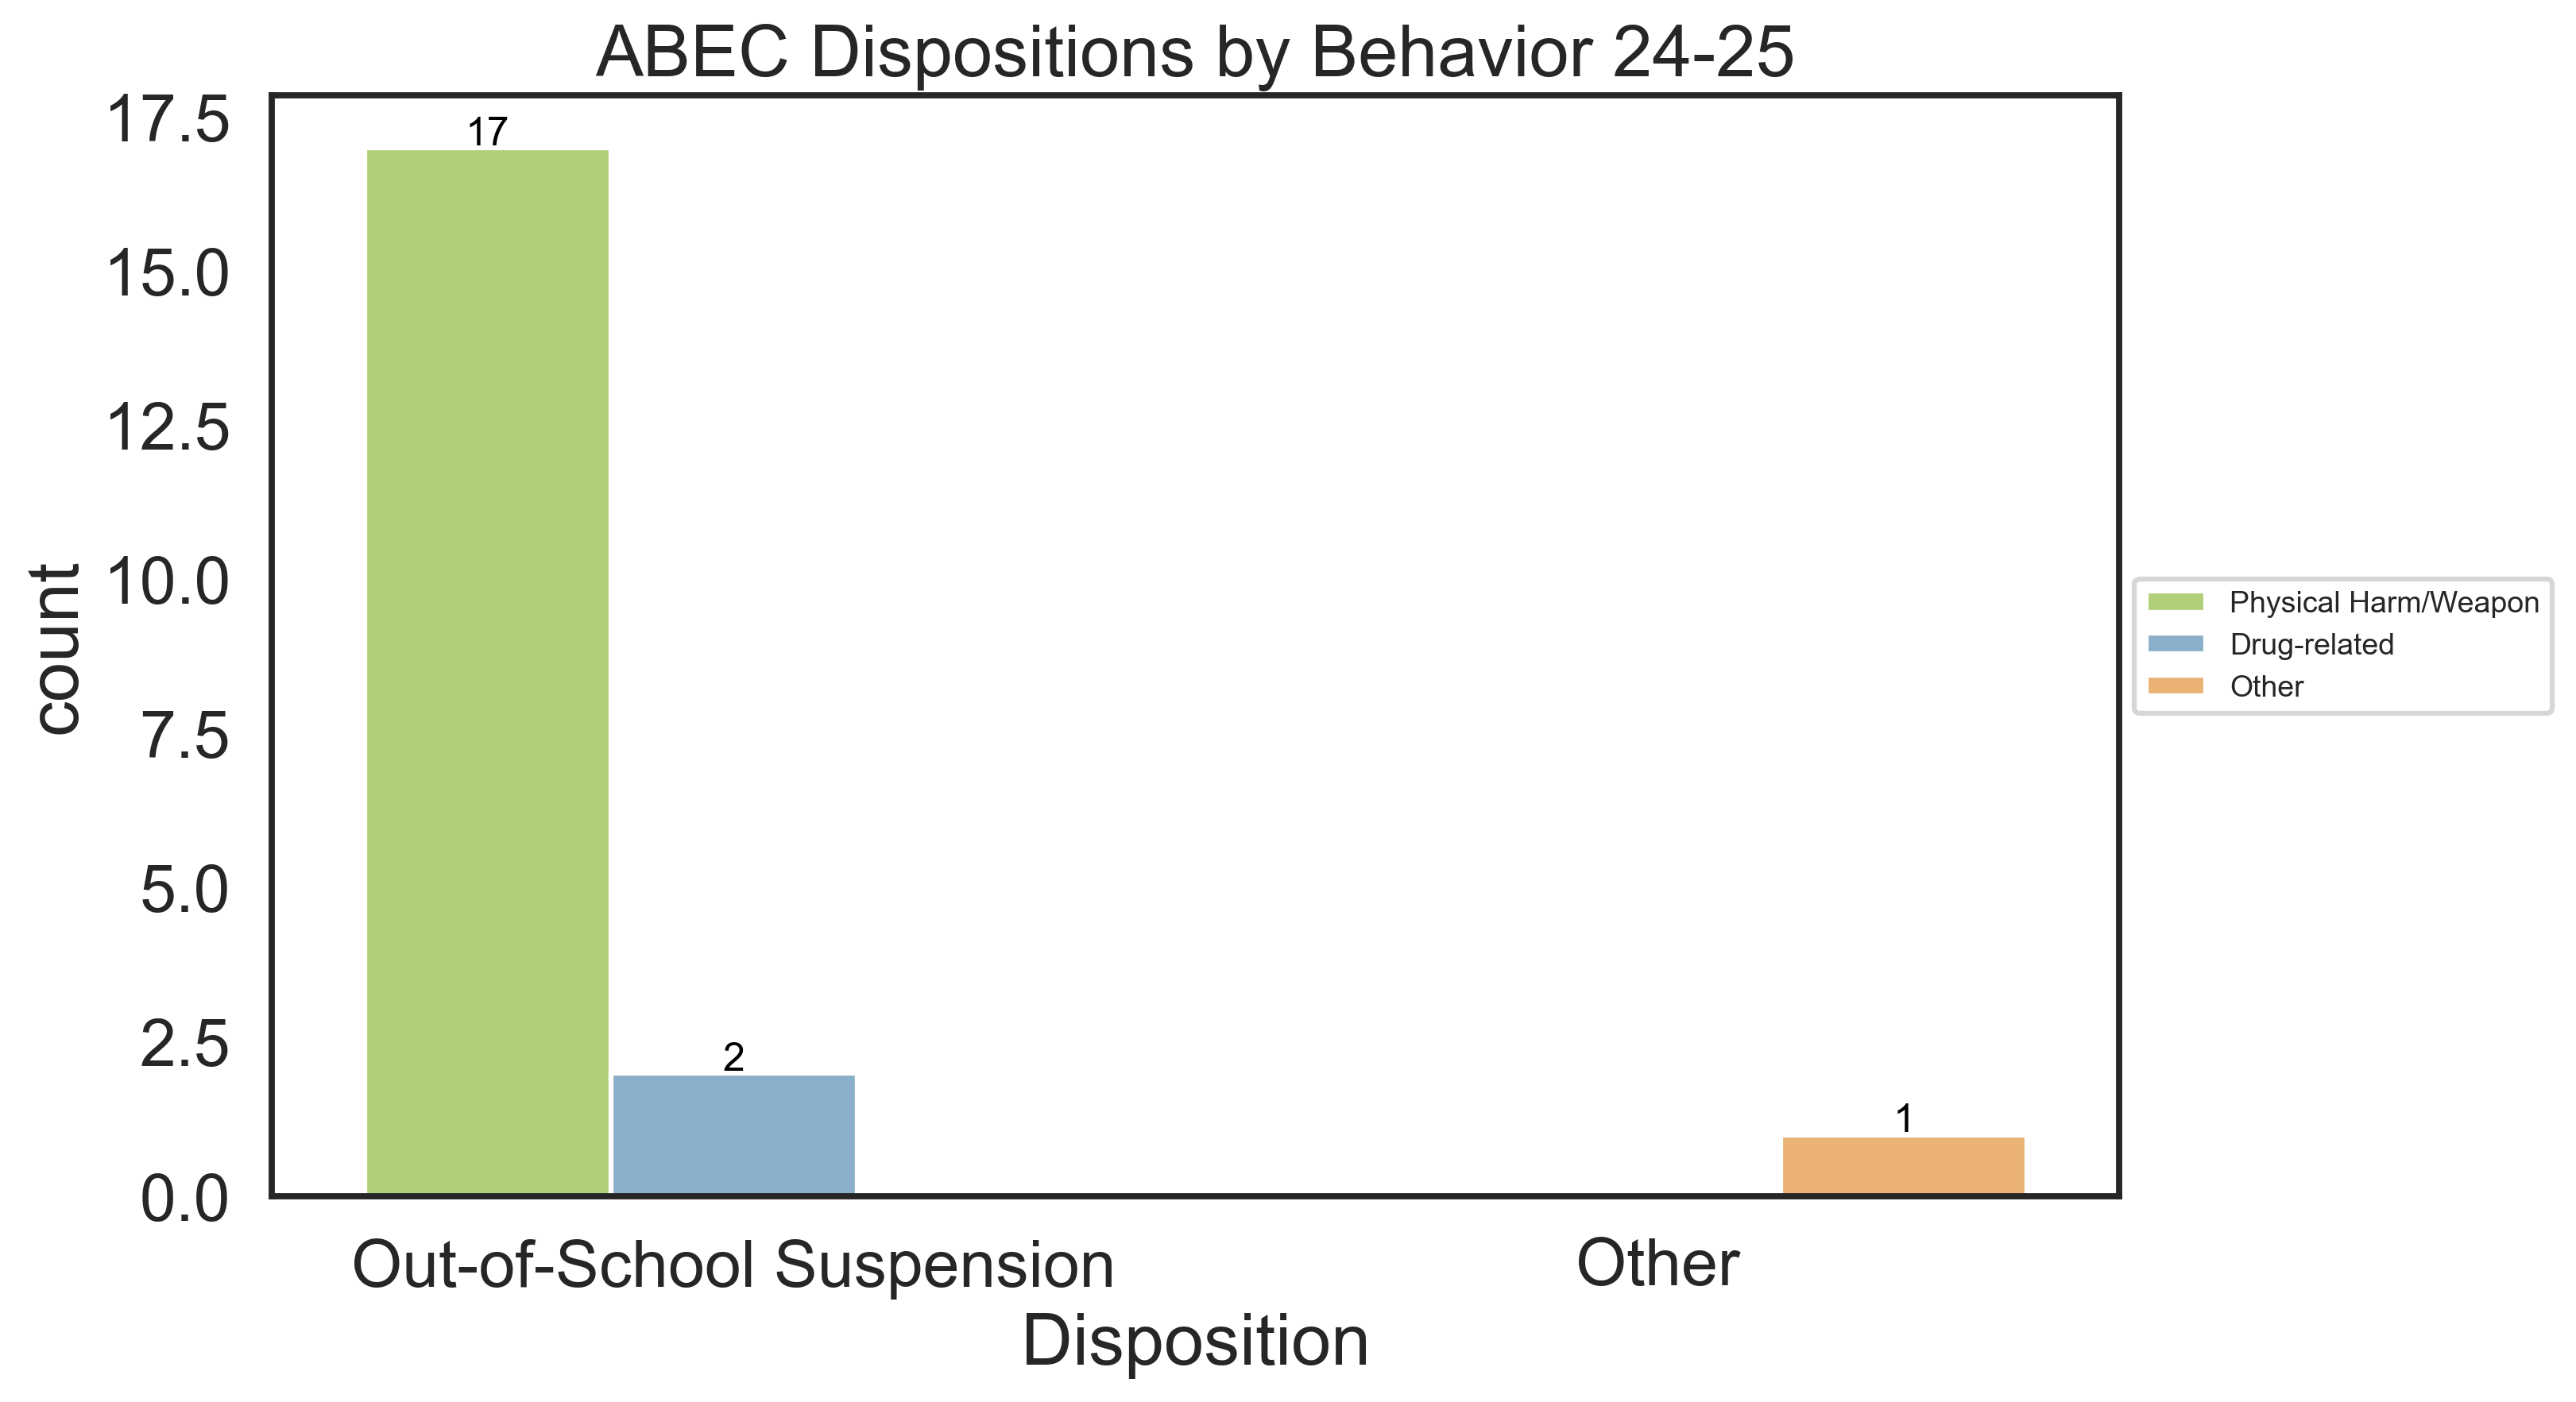

In [66]:
fig = plt.figure(figsize=(10,6))

custom_palette={'Physical Harm/Weapon':'#b3de69', 'Drug-related':'#80b1d3', 'Other':'#fdb462'}

ax = sns.countplot(x='Disposition',
              data=discipline_cleaned[discipline_cleaned['School']=='ABEC'], 
              palette=custom_palette, 
              hue='Behavior Category'
            )

for p in ax.patches[0:3]:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .05, f'{height:.0f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f'ABEC Dispositions by Behavior {school_year}')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(loc='center left', fontsize=9, bbox_to_anchor=(1, 0.5))

plt.savefig('Outputs/abec_dispositions_by_behavior', bbox_inches='tight')
plt.show()

C:\Users\mcyang\AppData\Local\Temp\ipykernel_3636\2656908180.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


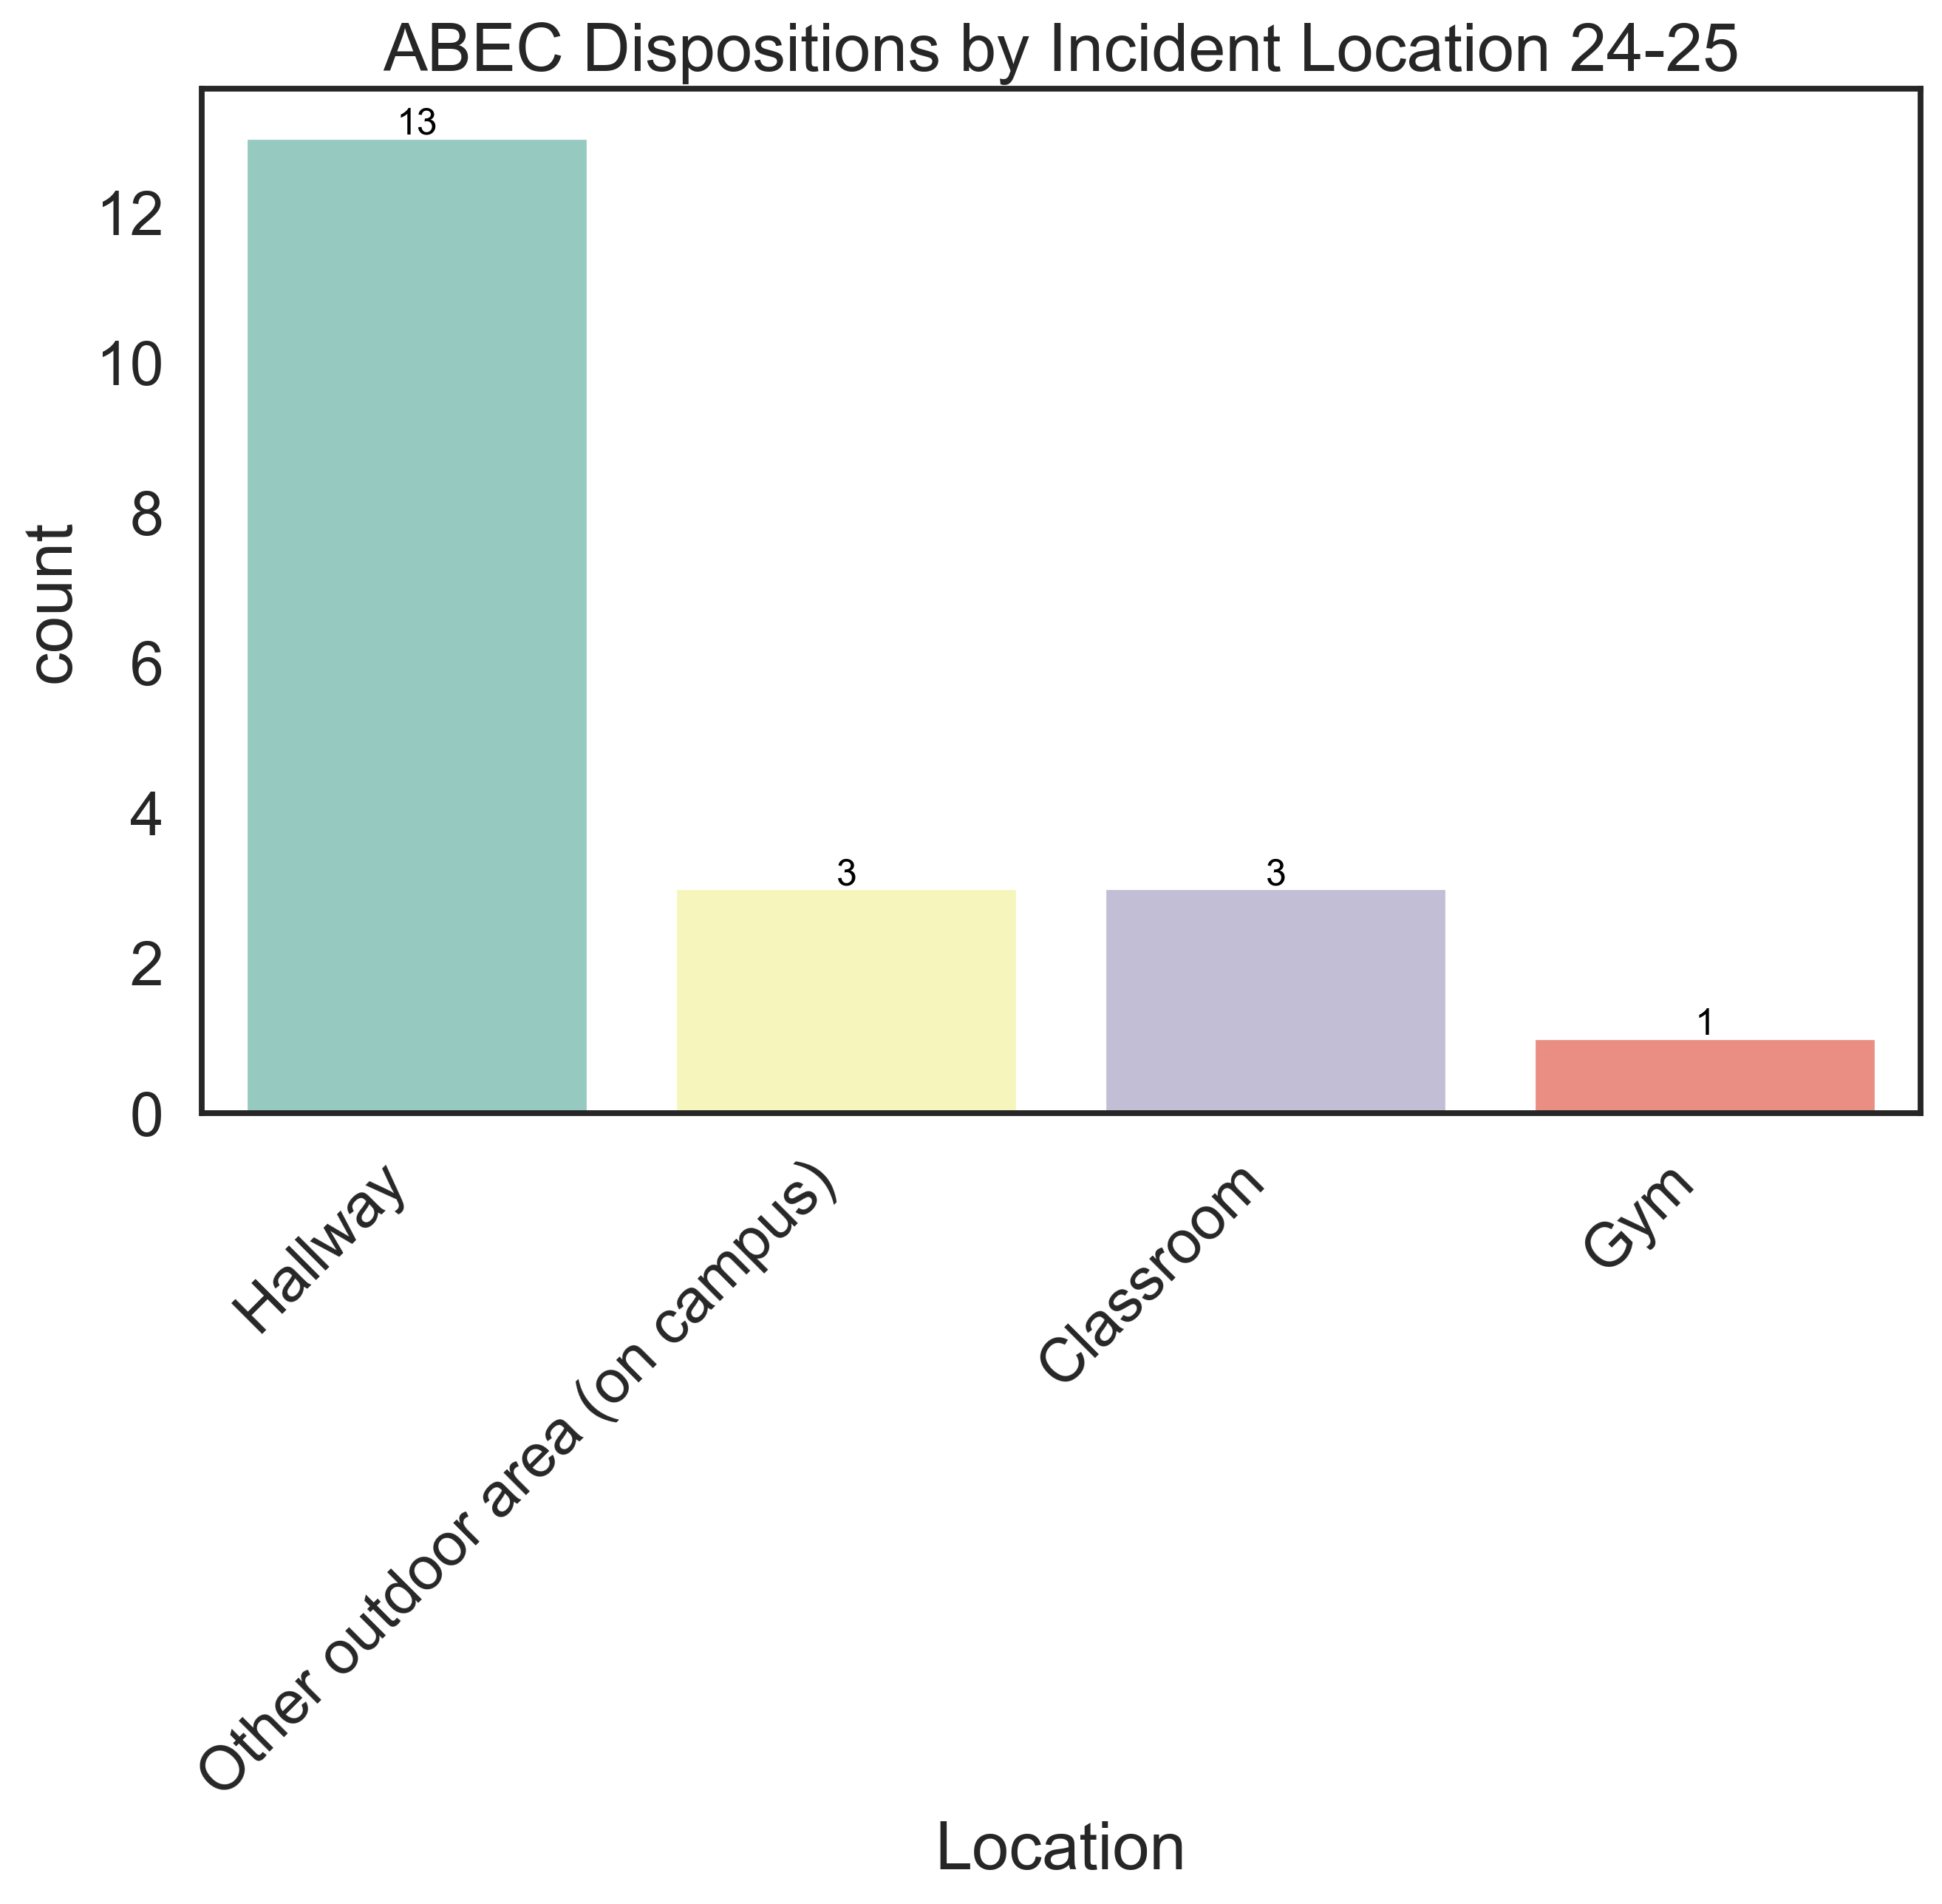

In [116]:
fig = plt.figure(figsize=(10,6))

ax = sns.countplot(x='Location',
              data=discipline_cleaned[discipline_cleaned['School']=='ABEC'], 
              palette='Set3', 
              hue='Location'
            )

for p in ax.patches[0:4]:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .05, f'{height:.0f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f'ABEC Dispositions by Incident Location {school_year}')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# ax.legend(loc='center left', fontsize=9, bbox_to_anchor=(1, 0.5))

plt.savefig('Outputs/abec_dispositions_by_location', bbox_inches='tight')
plt.show()

# OOS Suspensions

In [78]:
# Get suspension counts for all students who had at least one suspension
ooss_students=discipline_cleaned[discipline_cleaned['Disposition']=='Out-of-School Suspension']['District287 Id'].value_counts().\
to_frame().rename(columns={'count':'OOSS Count'}).reset_index()
ooss_students.head()

District287 Id  OOSS Count
0         3667610           5
1         3678702           4
2         3648126           3
3          118896           3
4         3666470           3

In [79]:
# Create column indicating student had a suspension
ooss_students['OOS Suspension']='Yes'
ooss_students.head()

District287 Id  OOSS Count OOS Suspension
0         3667610           5            Yes
1         3678702           4            Yes
2         3648126           3            Yes
3          118896           3            Yes
4         3666470           3            Yes

In [80]:
ooss_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   District287 Id  75 non-null     int64 
 1   OOSS Count      75 non-null     int64 
 2   OOS Suspension  75 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.9+ KB


In [210]:
# Import student body data
student_df=pd.read_csv('Resources/student_data_cleaned_120424.csv')
student_df.head()

Site/Program              Student Name  District287 Id Grade  \
0  302AT ABEC Tier 2 Tr  Miller, Rudy O. (He/Him)           36286    15   
1  303ST SEC Tier 3 Trn          Gorski, Kiley R.           37528    15   
2  301CT CTC Tier 1 Trn      Sanchez, Citlalli S.           40299    15   
3  303ST SEC Tier 3 Trn     (Harris, Nicklaus W.)           40399    15   
4  303AT ABEC Tier 3 Tr        Benson, Matthew J.           42767    15   

                Student Race Student Gender    Student Age  \
0                      White           Male  21 yrs 1 mths   
1                      White         Female  21 yrs 0 mths   
2                   Hispanic         Female  20 yrs 6 mths   
3                      White           Male  22 yrs 0 mths   
4  Black or African American           Male  20 yrs 9 mths   

  Language Spoken In the Home Original Enter Date District Of Residence  \
0               English (011)          2022-01-19  0286 Brooklyn Center   
1               English (011)          2018-09-07            0273 Edina   
2               Spanish (045)          2018-09-04        0280 Richfield   
3               English (011)          2017-09-05            0273 Edina   
4               English (011)          2020-01-06            0279 Osseo   

            Staff Name Classroom Enter Date Classroom Leave Date  \
0    Ressen, Teresa M.           2024-11-11                  NaN   
1       Lindner, Maren           2024-11-11                  NaN   
2      Rask, Kendra M.           2024-11-11                  NaN   
3     Tutor, Catherine           2024-11-11           11/21/2024   
4  Indgjer, Madonna H.           2024-11-11                  NaN   

   Employee Number  Years Enrolled  Student Age_Years    School  
0          20392.0            2.88                 21      ABEC  
1          20064.0            6.25                 21  SEC SPED  
2          17004.0            6.25                 20       CTC  
3          22602.0            7.25                 22  SEC SPED  
4          20842.0            4.92                 20      ABEC

In [151]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 962 non-null    object 
 1   Student Name                 962 non-null    object 
 2   District287 Id               962 non-null    int64  
 3   Grade                        962 non-null    object 
 4   Student Race                 962 non-null    object 
 5   Student Gender               962 non-null    object 
 6   Student Age                  962 non-null    object 
 7   Language Spoken In the Home  962 non-null    object 
 8   Original Enter Date          962 non-null    object 
 9   District Of Residence        962 non-null    object 
 10  Staff Name                   962 non-null    object 
 11  Classroom Enter Date         962 non-null    object 
 12  Classroom Leave Date         119 non-null    object 
 13  Employee Number     

In [167]:
# Merge suspended students with student body data
combined_df=pd.merge(student_df, ooss_students, on='District287 Id', how='left')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 962 non-null    object 
 1   Student Name                 962 non-null    object 
 2   District287 Id               962 non-null    int64  
 3   Grade                        962 non-null    object 
 4   Student Race                 962 non-null    object 
 5   Student Gender               962 non-null    object 
 6   Student Age                  962 non-null    object 
 7   Language Spoken In the Home  962 non-null    object 
 8   Original Enter Date          962 non-null    object 
 9   District Of Residence        962 non-null    object 
 10  Staff Name                   962 non-null    object 
 11  Classroom Enter Date         962 non-null    object 
 12  Classroom Leave Date         119 non-null    object 
 13  Employee Number     

In [168]:
# Find students who didn't merge 
missing_student_ids = list(set(ooss_students['District287 Id']) - set(student_df['District287 Id']))
missing_student_ids 

[3681944, 3662201, 130062, 134096]

In [169]:
# Get student info from discipline dataframe
missing_students=discipline_cleaned[discipline_cleaned['District287 Id'].isin(missing_student_ids)]
missing_students=pd.merge(missing_students, ooss_students, how='left', on='District287 Id')
missing_students

Incident Date      Referring Staff  Staff ID      Site/Program  Incident ID  \
0    09/11/2024     Zehren, Jacob J.   22284.0   303W WEC Tier 3          223   
1    10/09/2024  Bruner-Wiltse, Erik   22604.0  302A ABEC Tier 2         2132   
2    11/22/2024     Tacheny, Gwen M.   21771.0   303W WEC Tier 3         2633   
3    01/22/2025  Bruner-Wiltse, Erik   22604.0  302A ABEC Tier 2         4466   

  Referral Date  Individuals Engaged In Behavior  \
0    09/12/2024                                1   
1    10/09/2024                                1   
2    11/22/2024                                1   
3    01/22/2025                                1   

                         Location Incident Role   Perceived Motivation  \
0                         Hallway      Offender  Obtain Peer Attention   
1  Other outdoor area (on campus)      Offender  Obtain Peer Attention   
2                         Hallway      Offender         Avoid Activity   
3                         Hallway      Offender  Obtain Peer Attention   

             Student Name  District287 Id               Disposition  \
0  (Livingston, Jason K.)          134096  Out-of-School Suspension   
1    (Lott, Justin A. Jr)          130062  Out-of-School Suspension   
2    Williams, Takieis T.         3662201  Out-of-School Suspension   
3       Dixon, Amori'e J.         3681944  Out-of-School Suspension   

                  Behavior Student Gender  Grade               Student Race  \
0         Physical contact           Male     11                Two or More   
1                 Fighting           Male     11  Black or African American   
2  Physical Assault: Staff           Male      9  Black or African American   
3                 Fighting           Male      9  Black or African American   

      Student Age     Behavior Category  Behavior Level    School  OOSS Count  \
0   17 yrs 5 mths  Physical Harm/Weapon             1.0  WEC SPED           1   
1   17 yrs 3 mths  Physical Harm/Weapon             1.0      ABEC           1   
2   14 yrs 8 mths  Physical Harm/Weapon             1.0  WEC SPED           1   
3  14 yrs 11 mths  Physical Harm/Weapon             1.0      ABEC           1   

  OOS Suspension  
0            Yes  
1            Yes  
2            Yes  
3            Yes

In [170]:
missing_students=missing_students[['Student Name', 'District287 Id', 'Student Race', 'Student Gender', 'Grade', 'School', 'OOSS Count', 'OOS Suspension']]
missing_students

Student Name  District287 Id               Student Race  \
0  (Livingston, Jason K.)          134096                Two or More   
1    (Lott, Justin A. Jr)          130062  Black or African American   
2    Williams, Takieis T.         3662201  Black or African American   
3       Dixon, Amori'e J.         3681944  Black or African American   

  Student Gender  Grade    School  OOSS Count OOS Suspension  
0           Male     11  WEC SPED           1            Yes  
1           Male     11      ABEC           1            Yes  
2           Male      9  WEC SPED           1            Yes  
3           Male      9      ABEC           1            Yes

In [171]:
# Grade is integer dtype in discipline dataframe and object dtype in original student body dataframe
# Convert grade for missing students to string and transform single digits to double digits so it can be aggregated in combined dataframe 

transform_grade={'9':'09'}
missing_students['Grade']=missing_students['Grade'].astype('str').replace(transform_grade)
missing_students

C:\Users\mcyang\AppData\Local\Temp\ipykernel_3636\2370680125.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_students['Grade']=missing_students['Grade'].astype('str').replace(transform_grade)


Student Name  District287 Id               Student Race  \
0  (Livingston, Jason K.)          134096                Two or More   
1    (Lott, Justin A. Jr)          130062  Black or African American   
2    Williams, Takieis T.         3662201  Black or African American   
3       Dixon, Amori'e J.         3681944  Black or African American   

  Student Gender Grade    School  OOSS Count OOS Suspension  
0           Male    11  WEC SPED           1            Yes  
1           Male    11      ABEC           1            Yes  
2           Male    09  WEC SPED           1            Yes  
3           Male    09      ABEC           1            Yes

In [172]:
# Concatenate missing students with combined dataframe
combined_df=pd.concat([combined_df, missing_students], axis=0)

# Change grade column to common dtype (string)
combined_df['Grade']=combined_df['Grade'].astype('str')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 966 entries, 0 to 3
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 962 non-null    object 
 1   Student Name                 966 non-null    object 
 2   District287 Id               966 non-null    int64  
 3   Grade                        966 non-null    object 
 4   Student Race                 966 non-null    object 
 5   Student Gender               966 non-null    object 
 6   Student Age                  962 non-null    object 
 7   Language Spoken In the Home  962 non-null    object 
 8   Original Enter Date          962 non-null    object 
 9   District Of Residence        962 non-null    object 
 10  Staff Name                   962 non-null    object 
 11  Classroom Enter Date         962 non-null    object 
 12  Classroom Leave Date         119 non-null    object 
 13  Employee Number            

In [173]:
combined_df['OOS Suspension']=combined_df['OOS Suspension'].fillna('No')
combined_df['OOSS Count']=combined_df['OOSS Count'].fillna(0)

In [174]:
# Count of students with suspensions by school
ooss_by_school=combined_df.groupby('School')['OOS Suspension'].value_counts(normalize=True).to_frame().reset_index()
ooss_by_school=ooss_by_school[ooss_by_school['OOS Suspension']=='Yes'].rename(columns={'proportion':'Proportion'}).sort_values('Proportion')
ooss_by_school

School OOS Suspension  Proportion
3        CTC            Yes    0.008333
5   NEC SPED            Yes    0.062500
12     W-ALT            Yes    0.087719
9   SEC SPED            Yes    0.090909
1       ABEC            Yes    0.103175
7       NECA            Yes    0.145833
14  WEC SPED            Yes    0.288136

C:\Users\mcyang\AppData\Local\Temp\ipykernel_3636\74061142.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


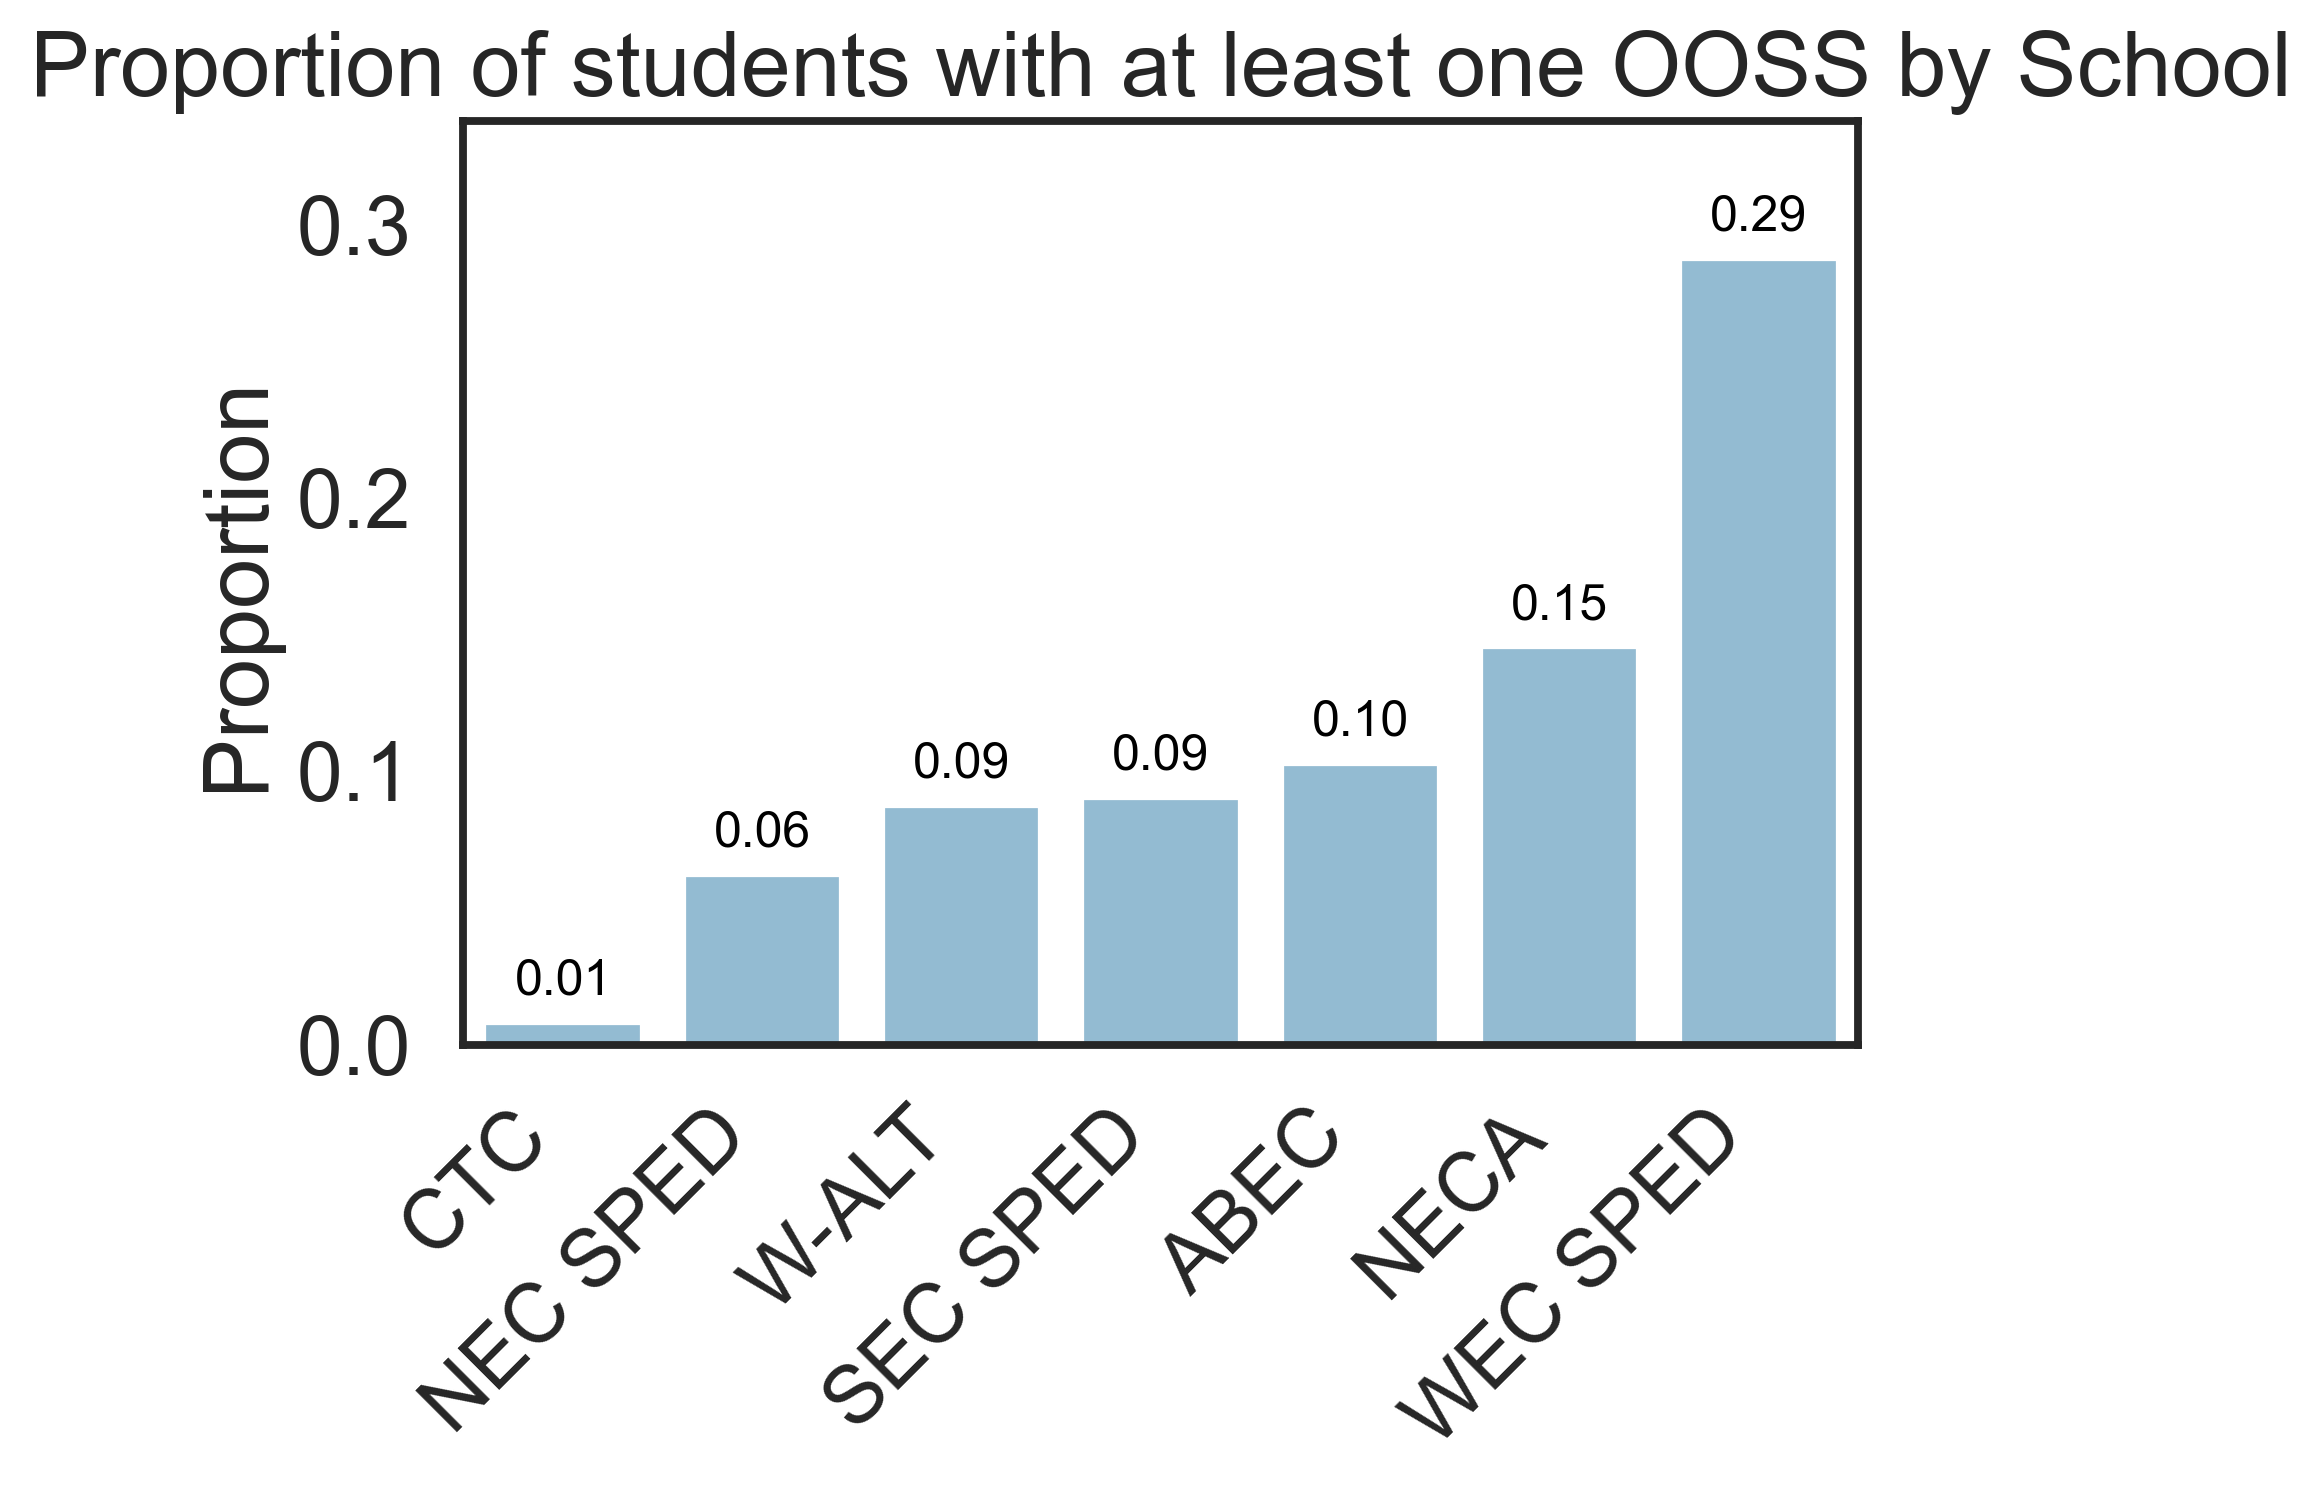

In [175]:
fig = plt.figure(figsize=(6,4))

df_to_plot=ooss_by_school

ax = sns.barplot(x='School',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of students with at least one OOSS by School")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/ooss_by_school', bbox_inches='tight')
plt.show()

In [176]:
ooss_student_counts=combined_df[combined_df['OOS Suspension']=='Yes']['School'].value_counts().to_frame()
ooss_student_counts

count
School         
WEC SPED     17
SEC SPED     14
ABEC         13
NEC SPED     12
W-ALT        10
NECA          7
CTC           1

## NEC

In [177]:
nec_df=combined_df[combined_df['School']=='NEC SPED']
nec_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 44 to 948
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 192 non-null    object 
 1   Student Name                 192 non-null    object 
 2   District287 Id               192 non-null    int64  
 3   Grade                        192 non-null    object 
 4   Student Race                 192 non-null    object 
 5   Student Gender               192 non-null    object 
 6   Student Age                  192 non-null    object 
 7   Language Spoken In the Home  192 non-null    object 
 8   Original Enter Date          192 non-null    object 
 9   District Of Residence        192 non-null    object 
 10  Staff Name                   192 non-null    object 
 11  Classroom Enter Date         192 non-null    object 
 12  Classroom Leave Date         12 non-null     object 
 13  Employee Number         

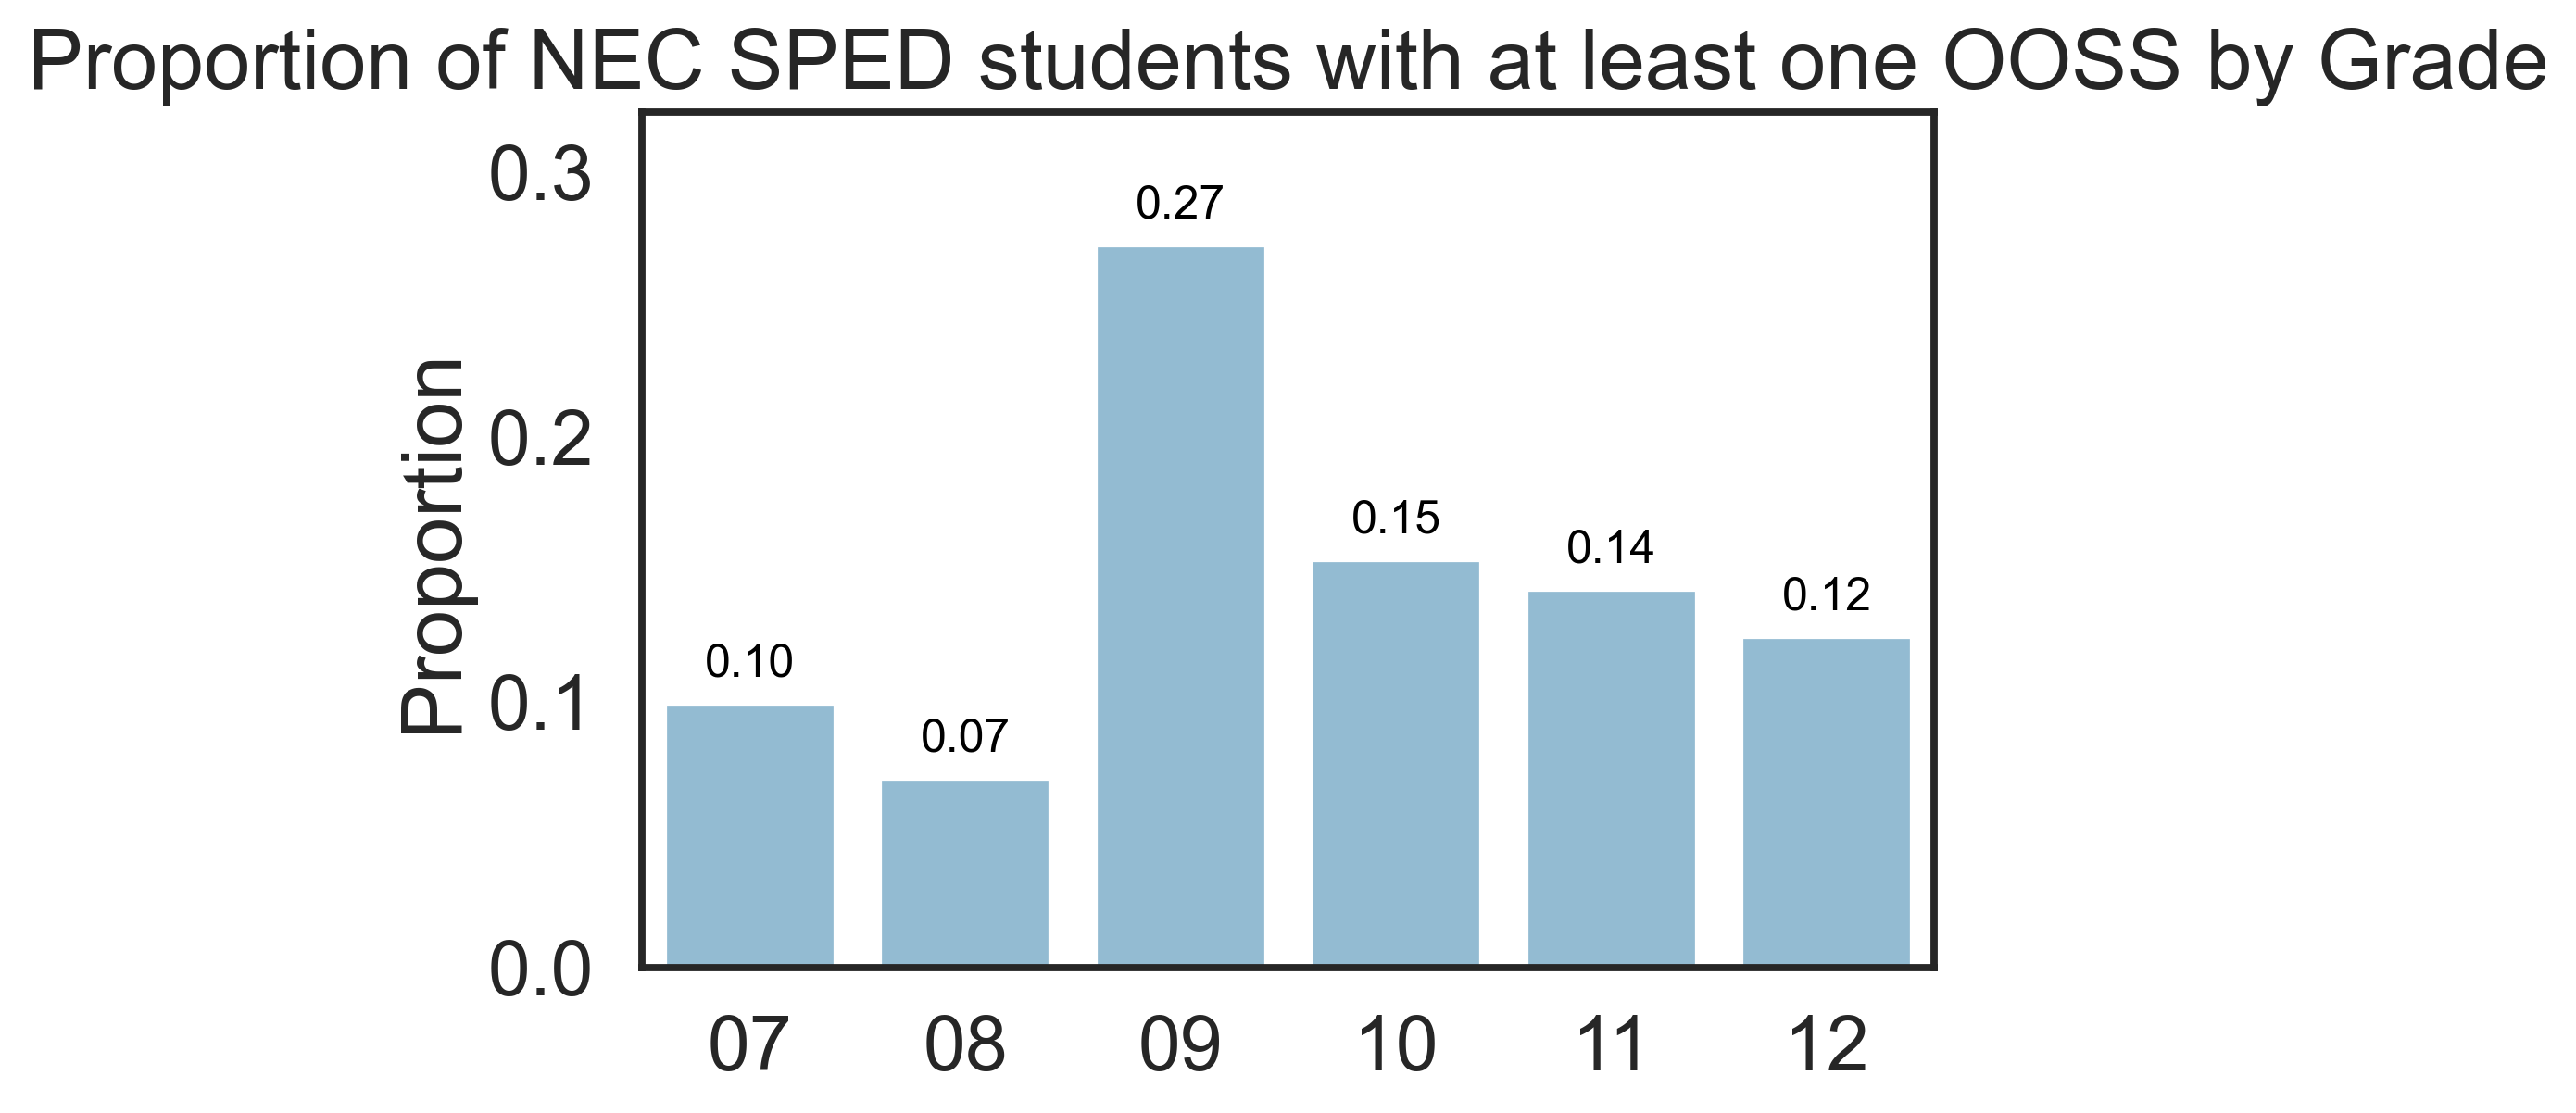

In [192]:
fig = plt.figure(figsize=(6,4))

df_to_plot=nec_df.groupby('Grade')['OOS Suspension'].value_counts(normalize=True).to_frame().reset_index()
df_to_plot=df_to_plot[df_to_plot['OOS Suspension']=='Yes'].rename(columns={'proportion':'Proportion'}).sort_values('Grade')

ax = sns.barplot(x='Grade',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of NEC SPED students with at least one OOSS by Grade")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/nec_ooss_by_grade', bbox_inches='tight')
plt.show()

C:\Users\mcyang\AppData\Local\Temp\ipykernel_3636\365298213.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


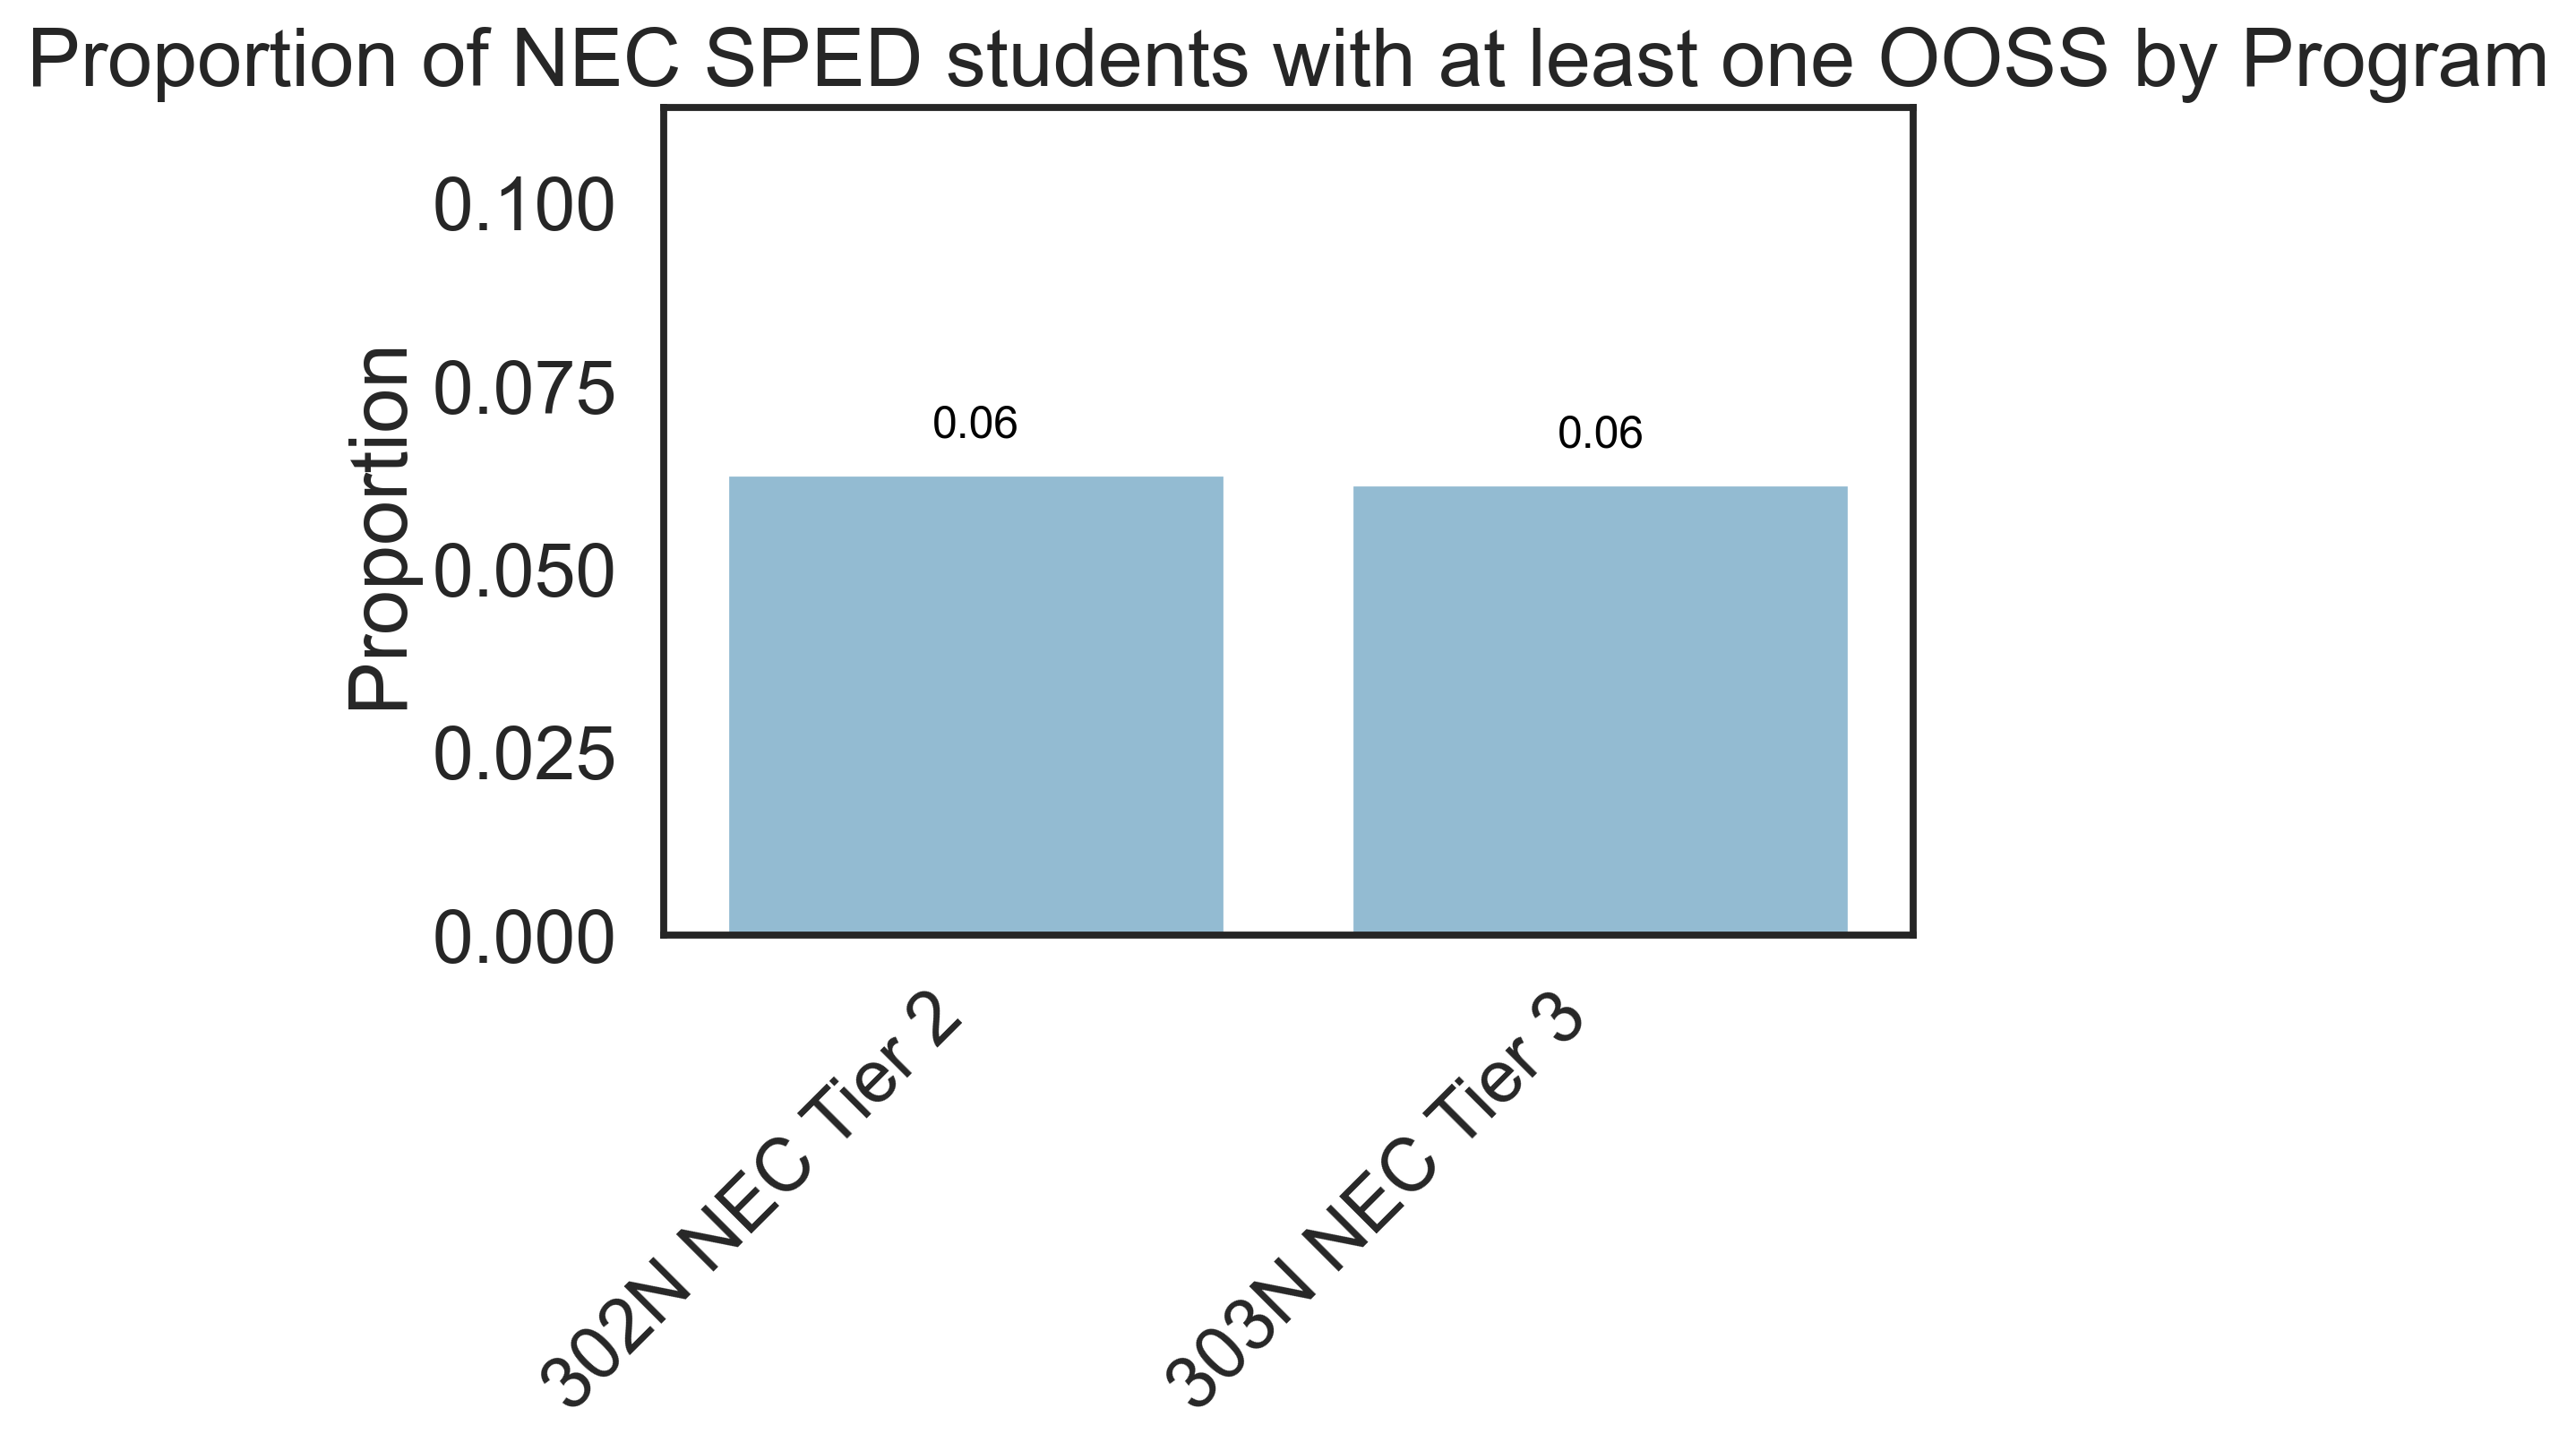

In [193]:
fig = plt.figure(figsize=(6,4))

df_to_plot=nec_df.groupby('Site/Program')['OOS Suspension'].value_counts(normalize=True).to_frame().reset_index()
df_to_plot=df_to_plot[df_to_plot['OOS Suspension']=='Yes'].rename(columns={'proportion':'Proportion'})

ax = sns.barplot(x='Site/Program',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .005, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of NEC SPED students with at least one OOSS by Program")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/nec_ooss_by_program', bbox_inches='tight')
plt.show()

C:\Users\mcyang\AppData\Local\Temp\ipykernel_3636\898382157.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


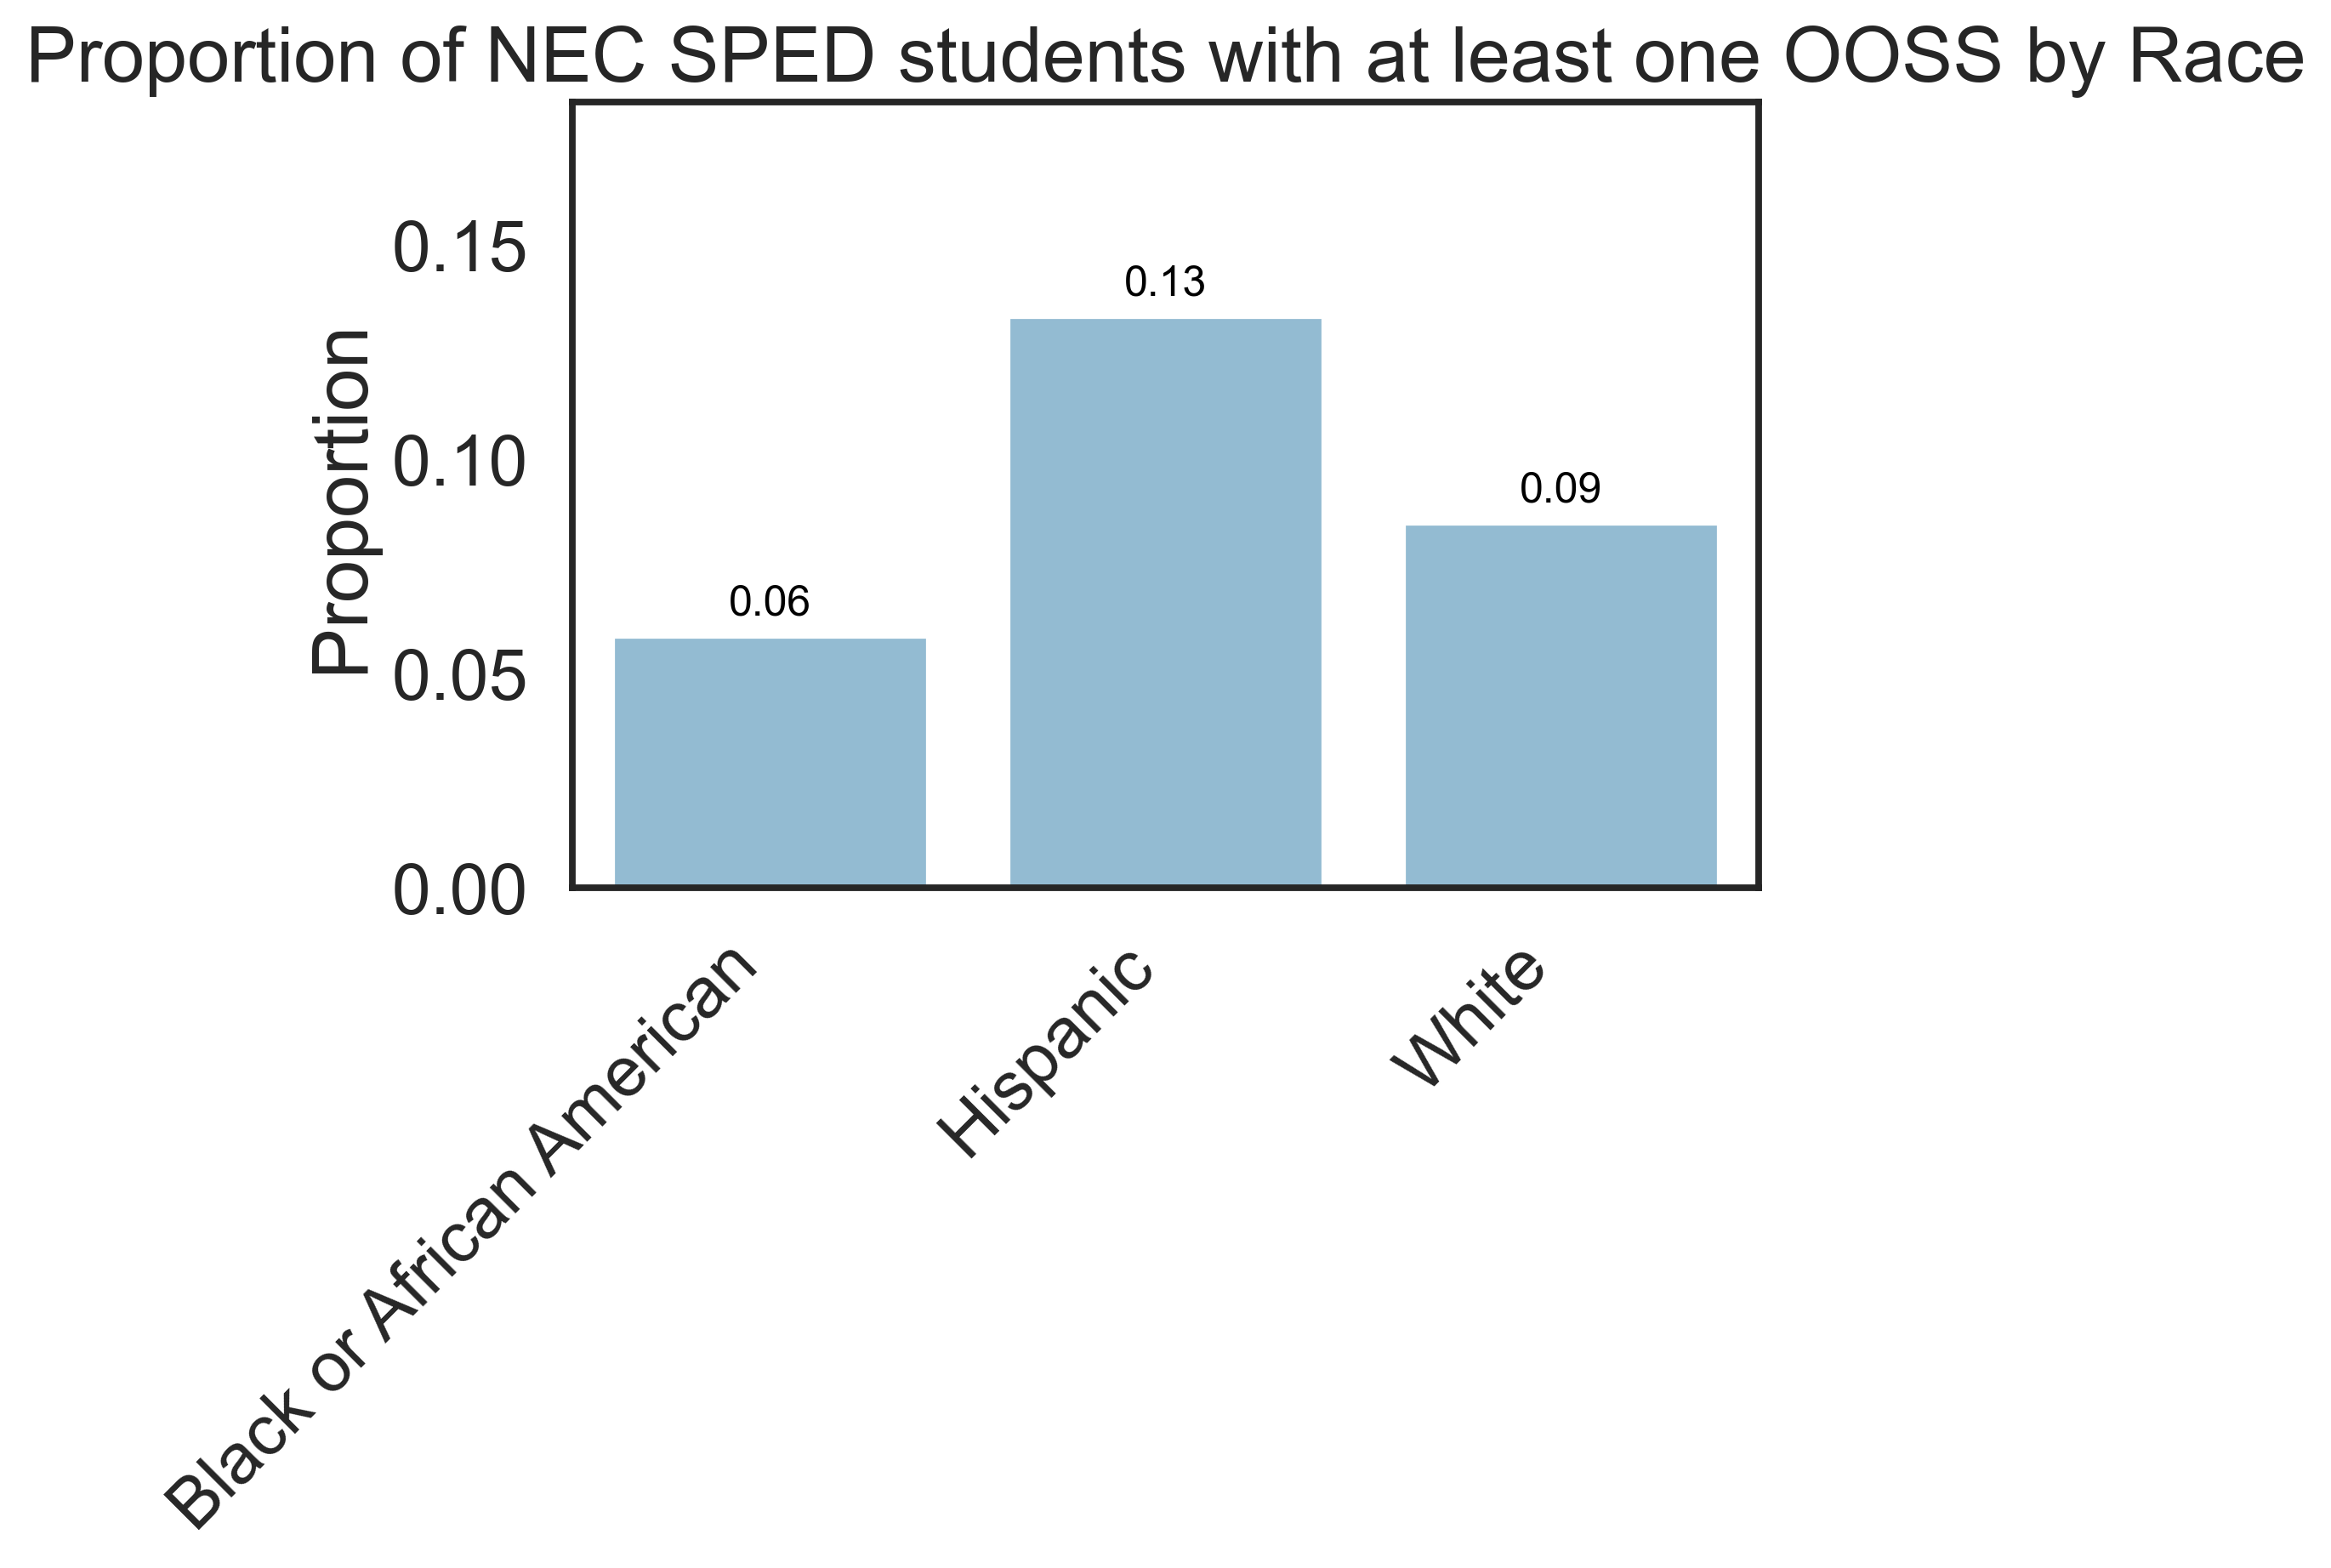

In [194]:
fig = plt.figure(figsize=(6,4))

df_to_plot=nec_df.groupby('Student Race')['OOS Suspension'].value_counts(normalize=True).to_frame().reset_index()
df_to_plot=df_to_plot[df_to_plot['OOS Suspension']=='Yes'].rename(columns={'proportion':'Proportion'})

ax = sns.barplot(x='Student Race',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .005, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of NEC SPED students with at least one OOSS by Race")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/nec_ooss_by_race', bbox_inches='tight')
plt.show()

## NECA

In [181]:
neca_df=combined_df[combined_df['School']=='NECA']
neca_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 95 to 930
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 48 non-null     object 
 1   Student Name                 48 non-null     object 
 2   District287 Id               48 non-null     int64  
 3   Grade                        48 non-null     object 
 4   Student Race                 48 non-null     object 
 5   Student Gender               48 non-null     object 
 6   Student Age                  48 non-null     object 
 7   Language Spoken In the Home  48 non-null     object 
 8   Original Enter Date          48 non-null     object 
 9   District Of Residence        48 non-null     object 
 10  Staff Name                   48 non-null     object 
 11  Classroom Enter Date         48 non-null     object 
 12  Classroom Leave Date         9 non-null      object 
 13  Employee Number          

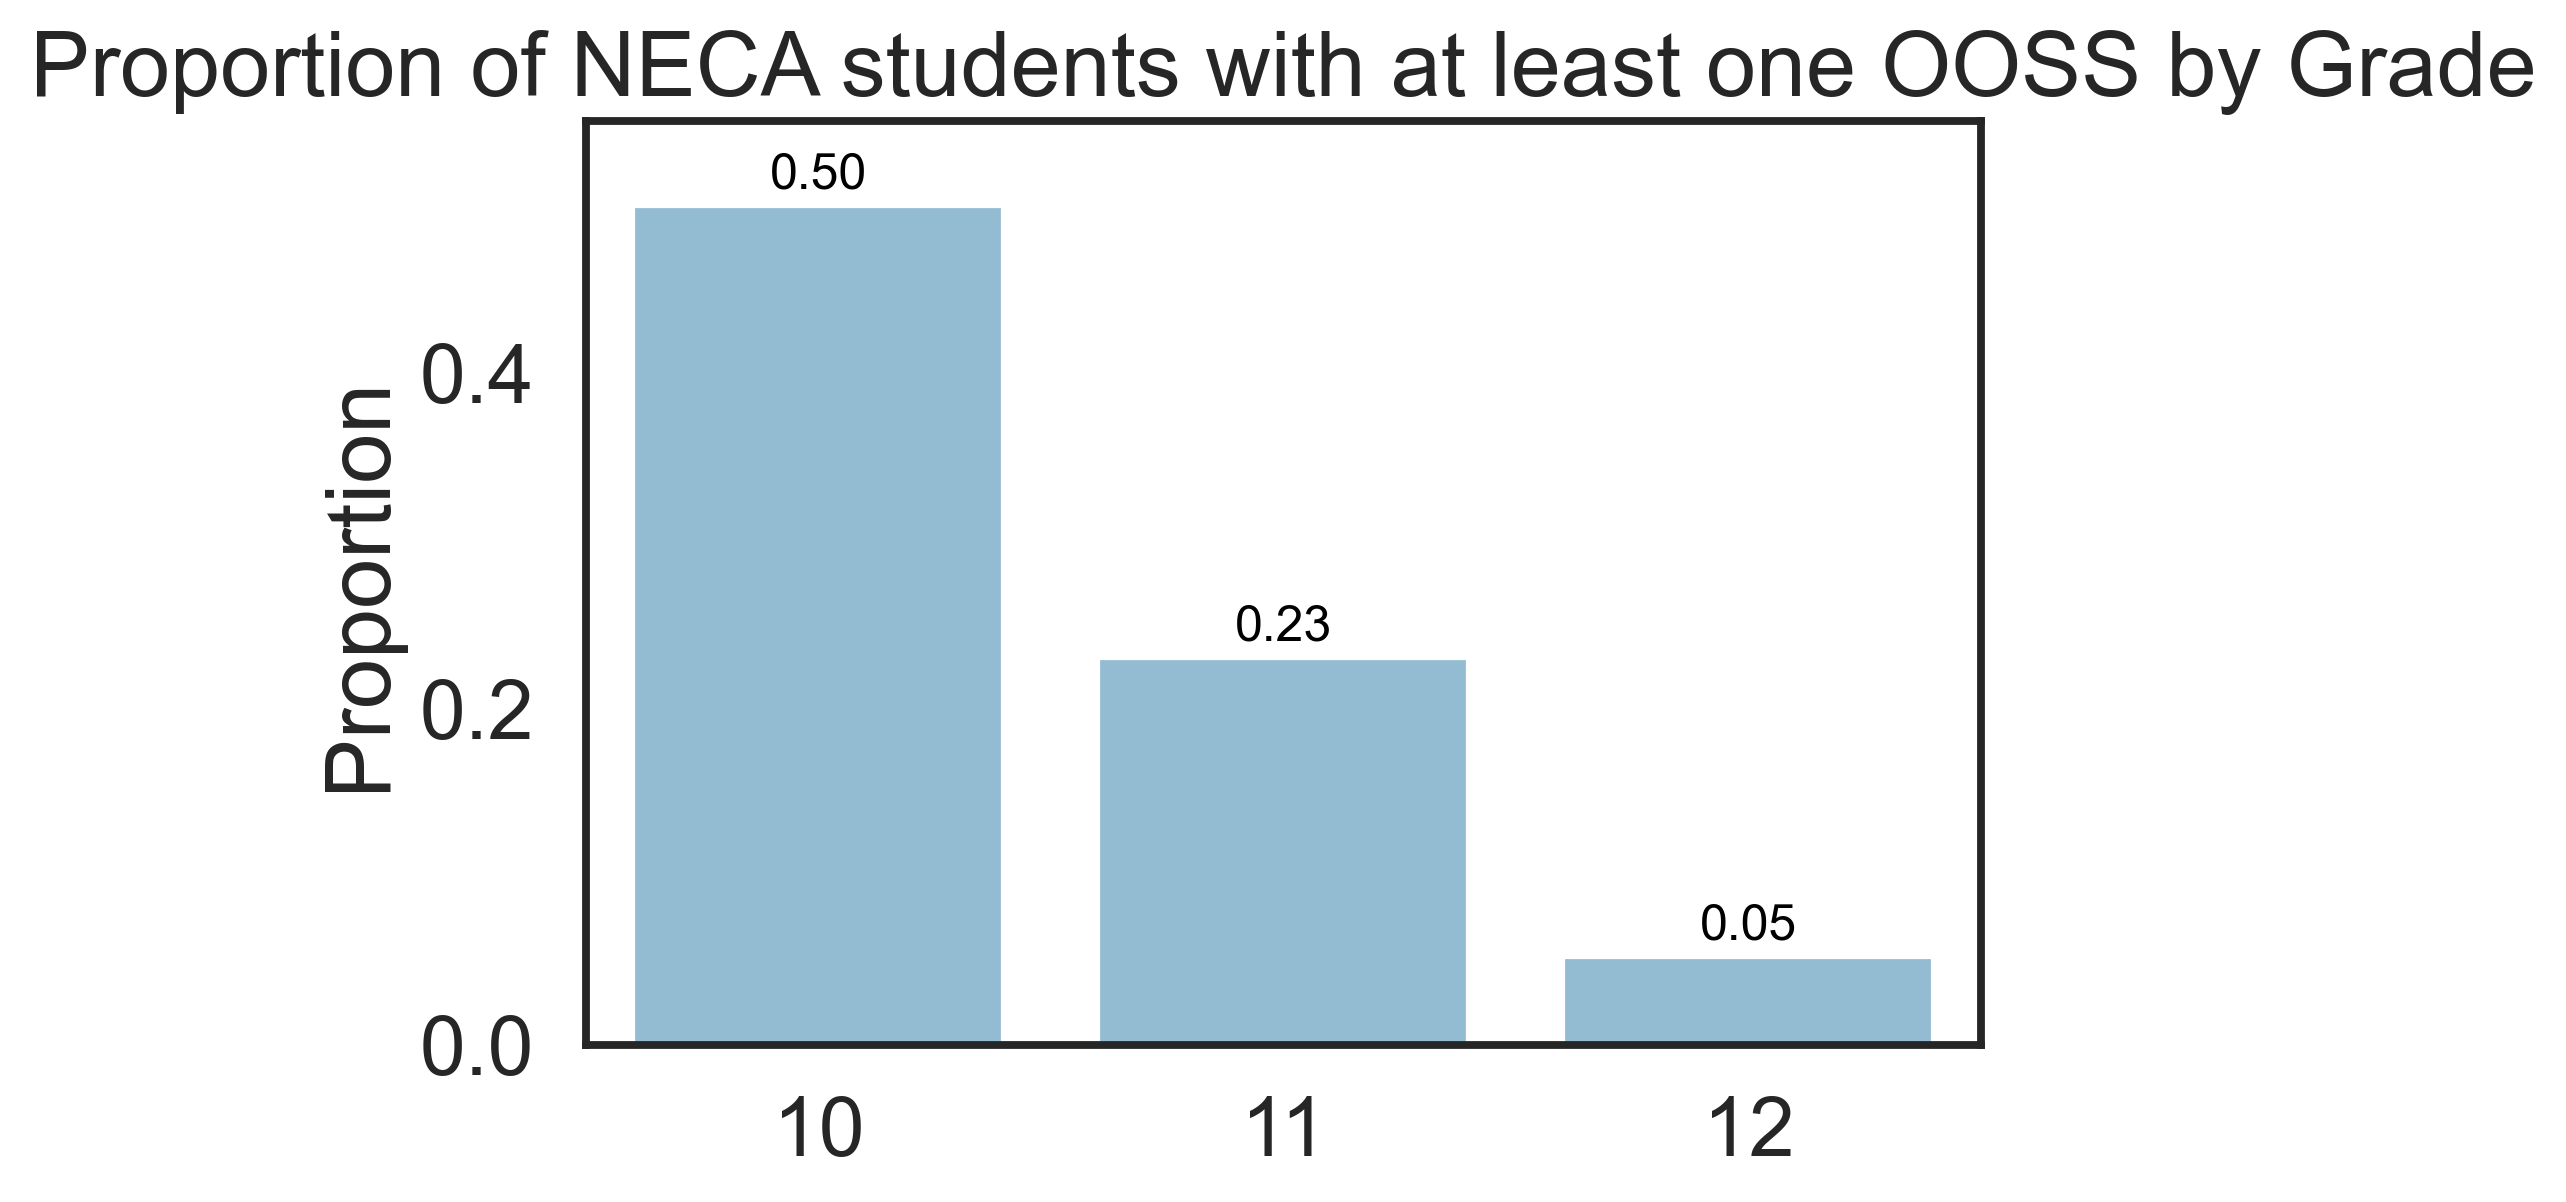

In [182]:
fig = plt.figure(figsize=(6,4))

df_to_plot=neca_df.groupby('Grade')['OOS Suspension'].value_counts(normalize=True).to_frame().reset_index()
df_to_plot=df_to_plot[df_to_plot['OOS Suspension']=='Yes'].rename(columns={'proportion':'Proportion'}).sort_values('Grade')

ax = sns.barplot(x='Grade',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of NECA students with at least one OOSS by Grade")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/neca_ooss_by_grade', bbox_inches='tight')
plt.show()

C:\Users\mcyang\AppData\Local\Temp\ipykernel_3636\2581200687.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


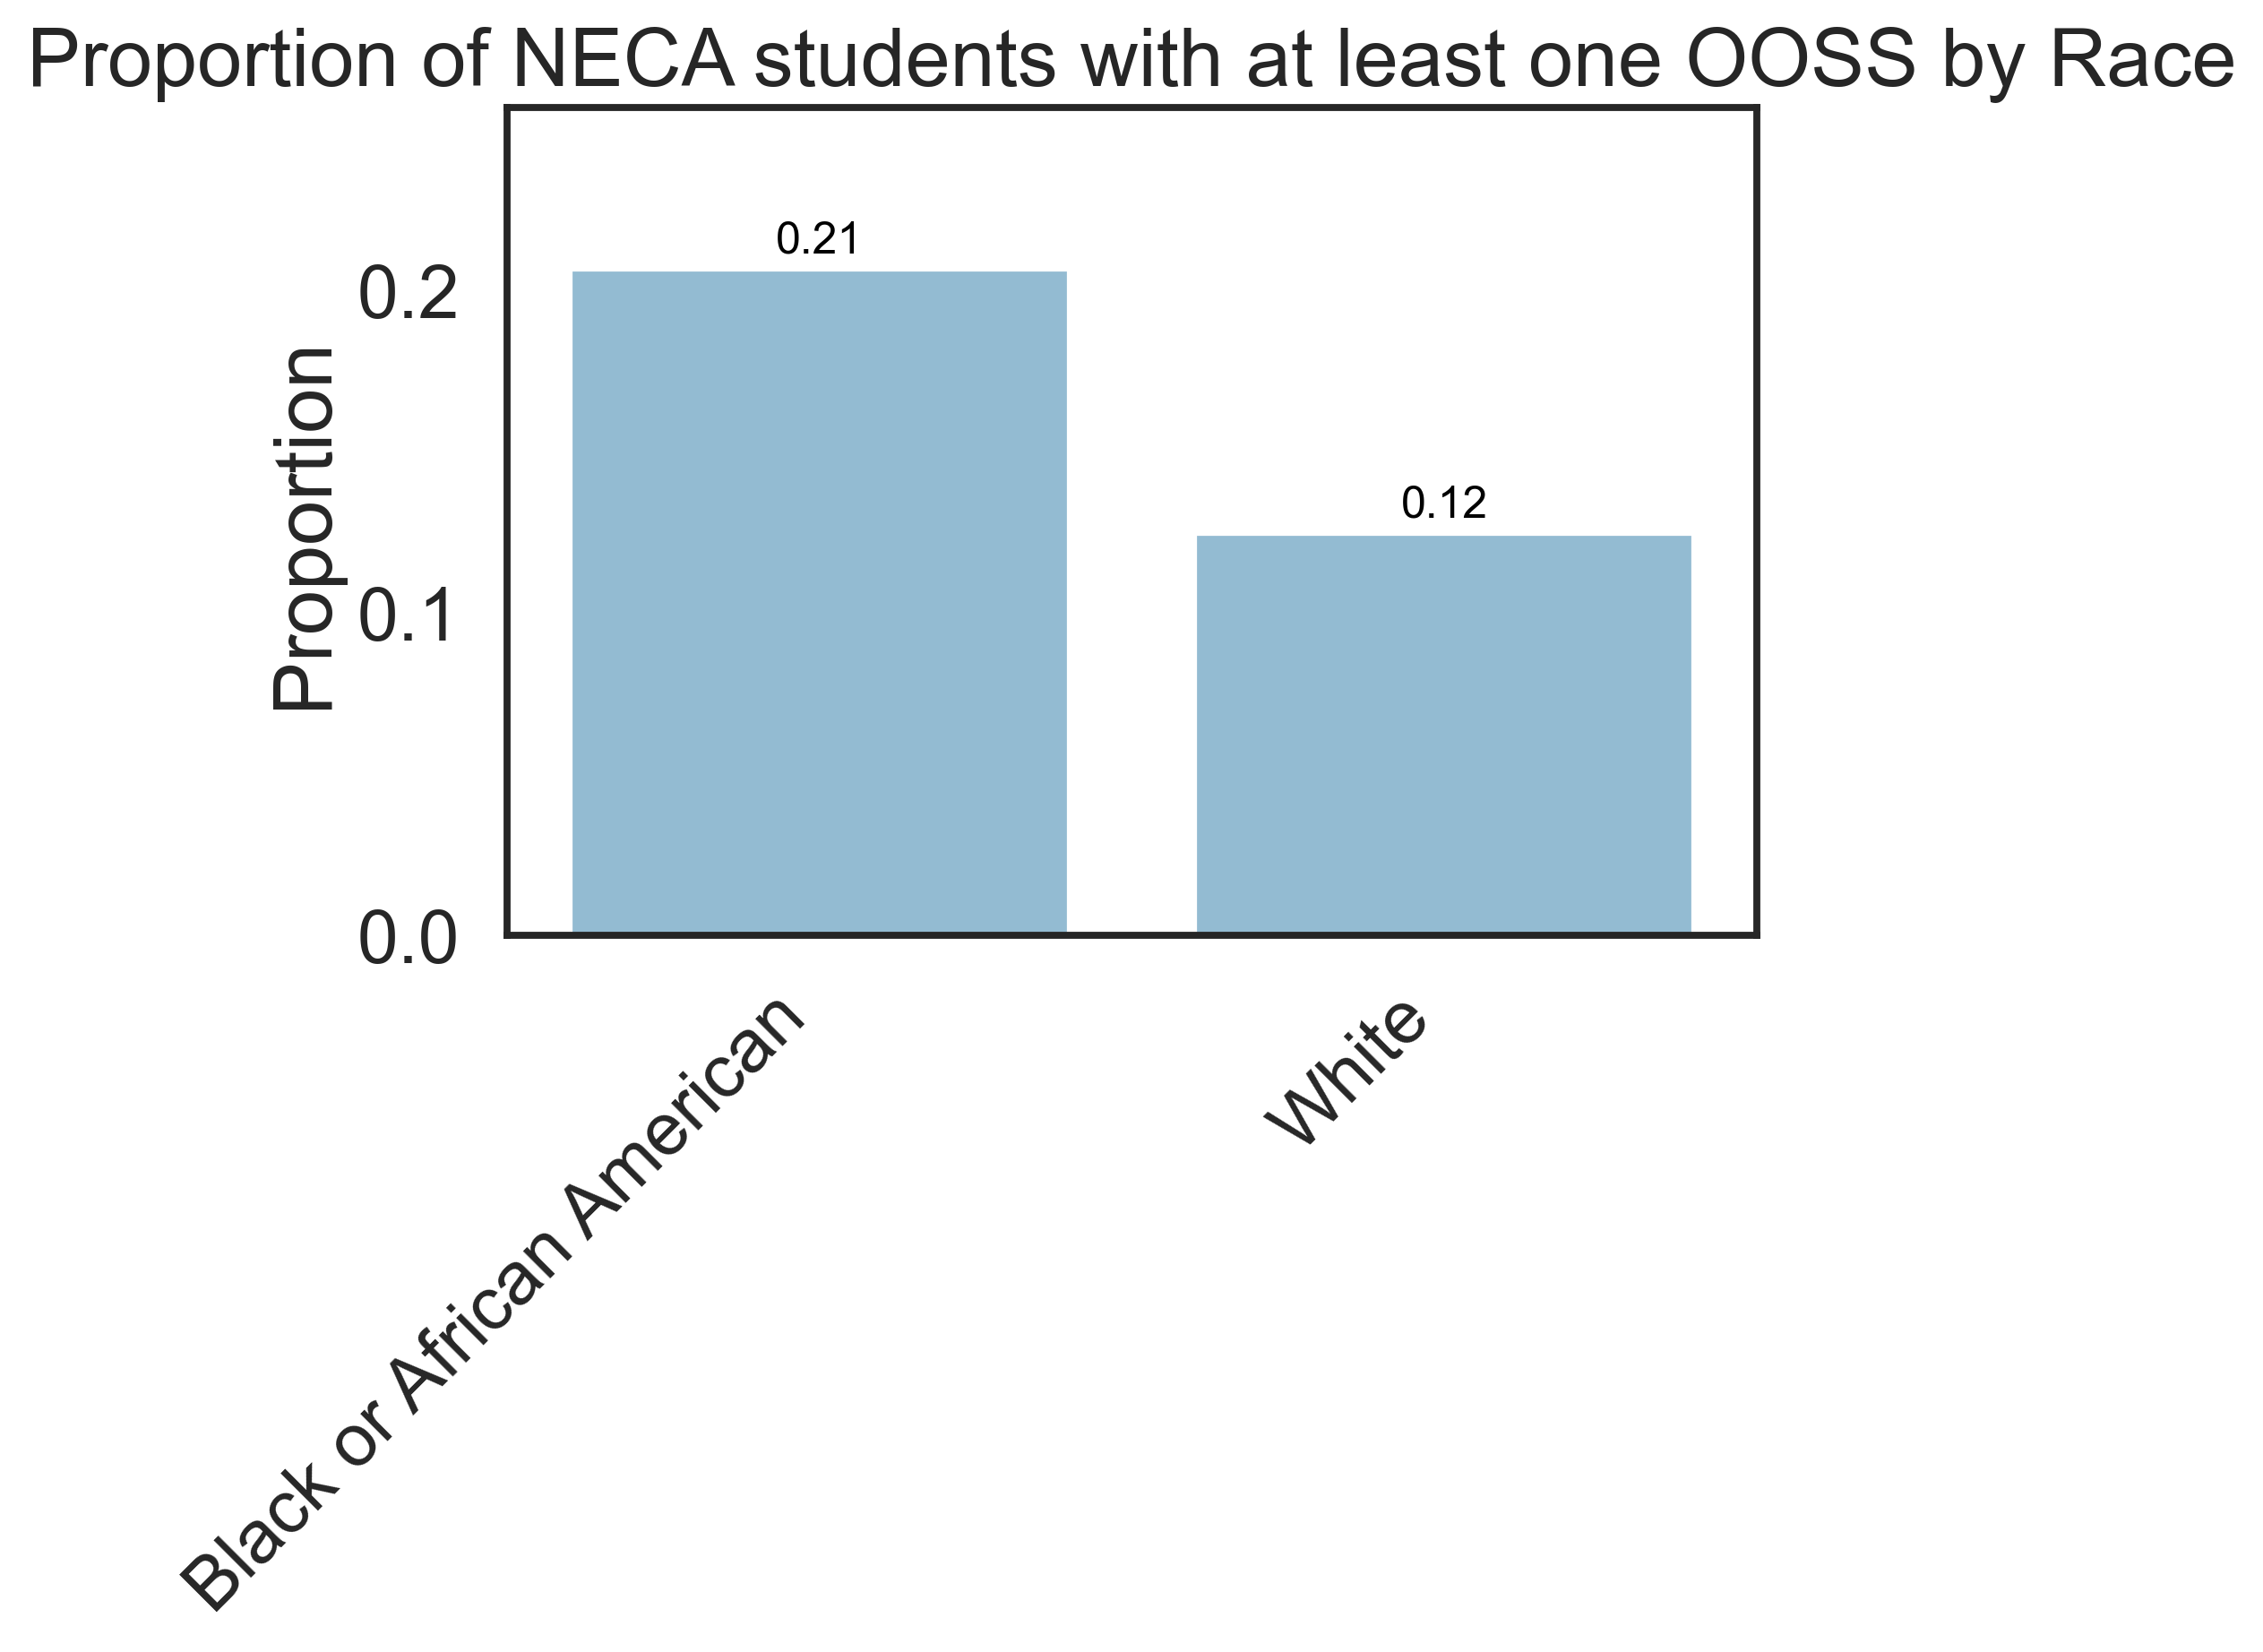

In [183]:
fig = plt.figure(figsize=(6,4))

df_to_plot=neca_df.groupby('Student Race')['OOS Suspension'].value_counts(normalize=True).to_frame().reset_index()
df_to_plot=df_to_plot[df_to_plot['OOS Suspension']=='Yes'].rename(columns={'proportion':'Proportion'})

ax = sns.barplot(x='Student Race',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .005, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of NECA students with at least one OOSS by Race")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/neca_ooss_by_race', bbox_inches='tight')
plt.show()

## SEC

In [184]:
sec_df=combined_df[combined_df['School']=='SEC SPED']
sec_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 1 to 942
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 154 non-null    object 
 1   Student Name                 154 non-null    object 
 2   District287 Id               154 non-null    int64  
 3   Grade                        154 non-null    object 
 4   Student Race                 154 non-null    object 
 5   Student Gender               154 non-null    object 
 6   Student Age                  154 non-null    object 
 7   Language Spoken In the Home  154 non-null    object 
 8   Original Enter Date          154 non-null    object 
 9   District Of Residence        154 non-null    object 
 10  Staff Name                   154 non-null    object 
 11  Classroom Enter Date         154 non-null    object 
 12  Classroom Leave Date         11 non-null     object 
 13  Employee Number          

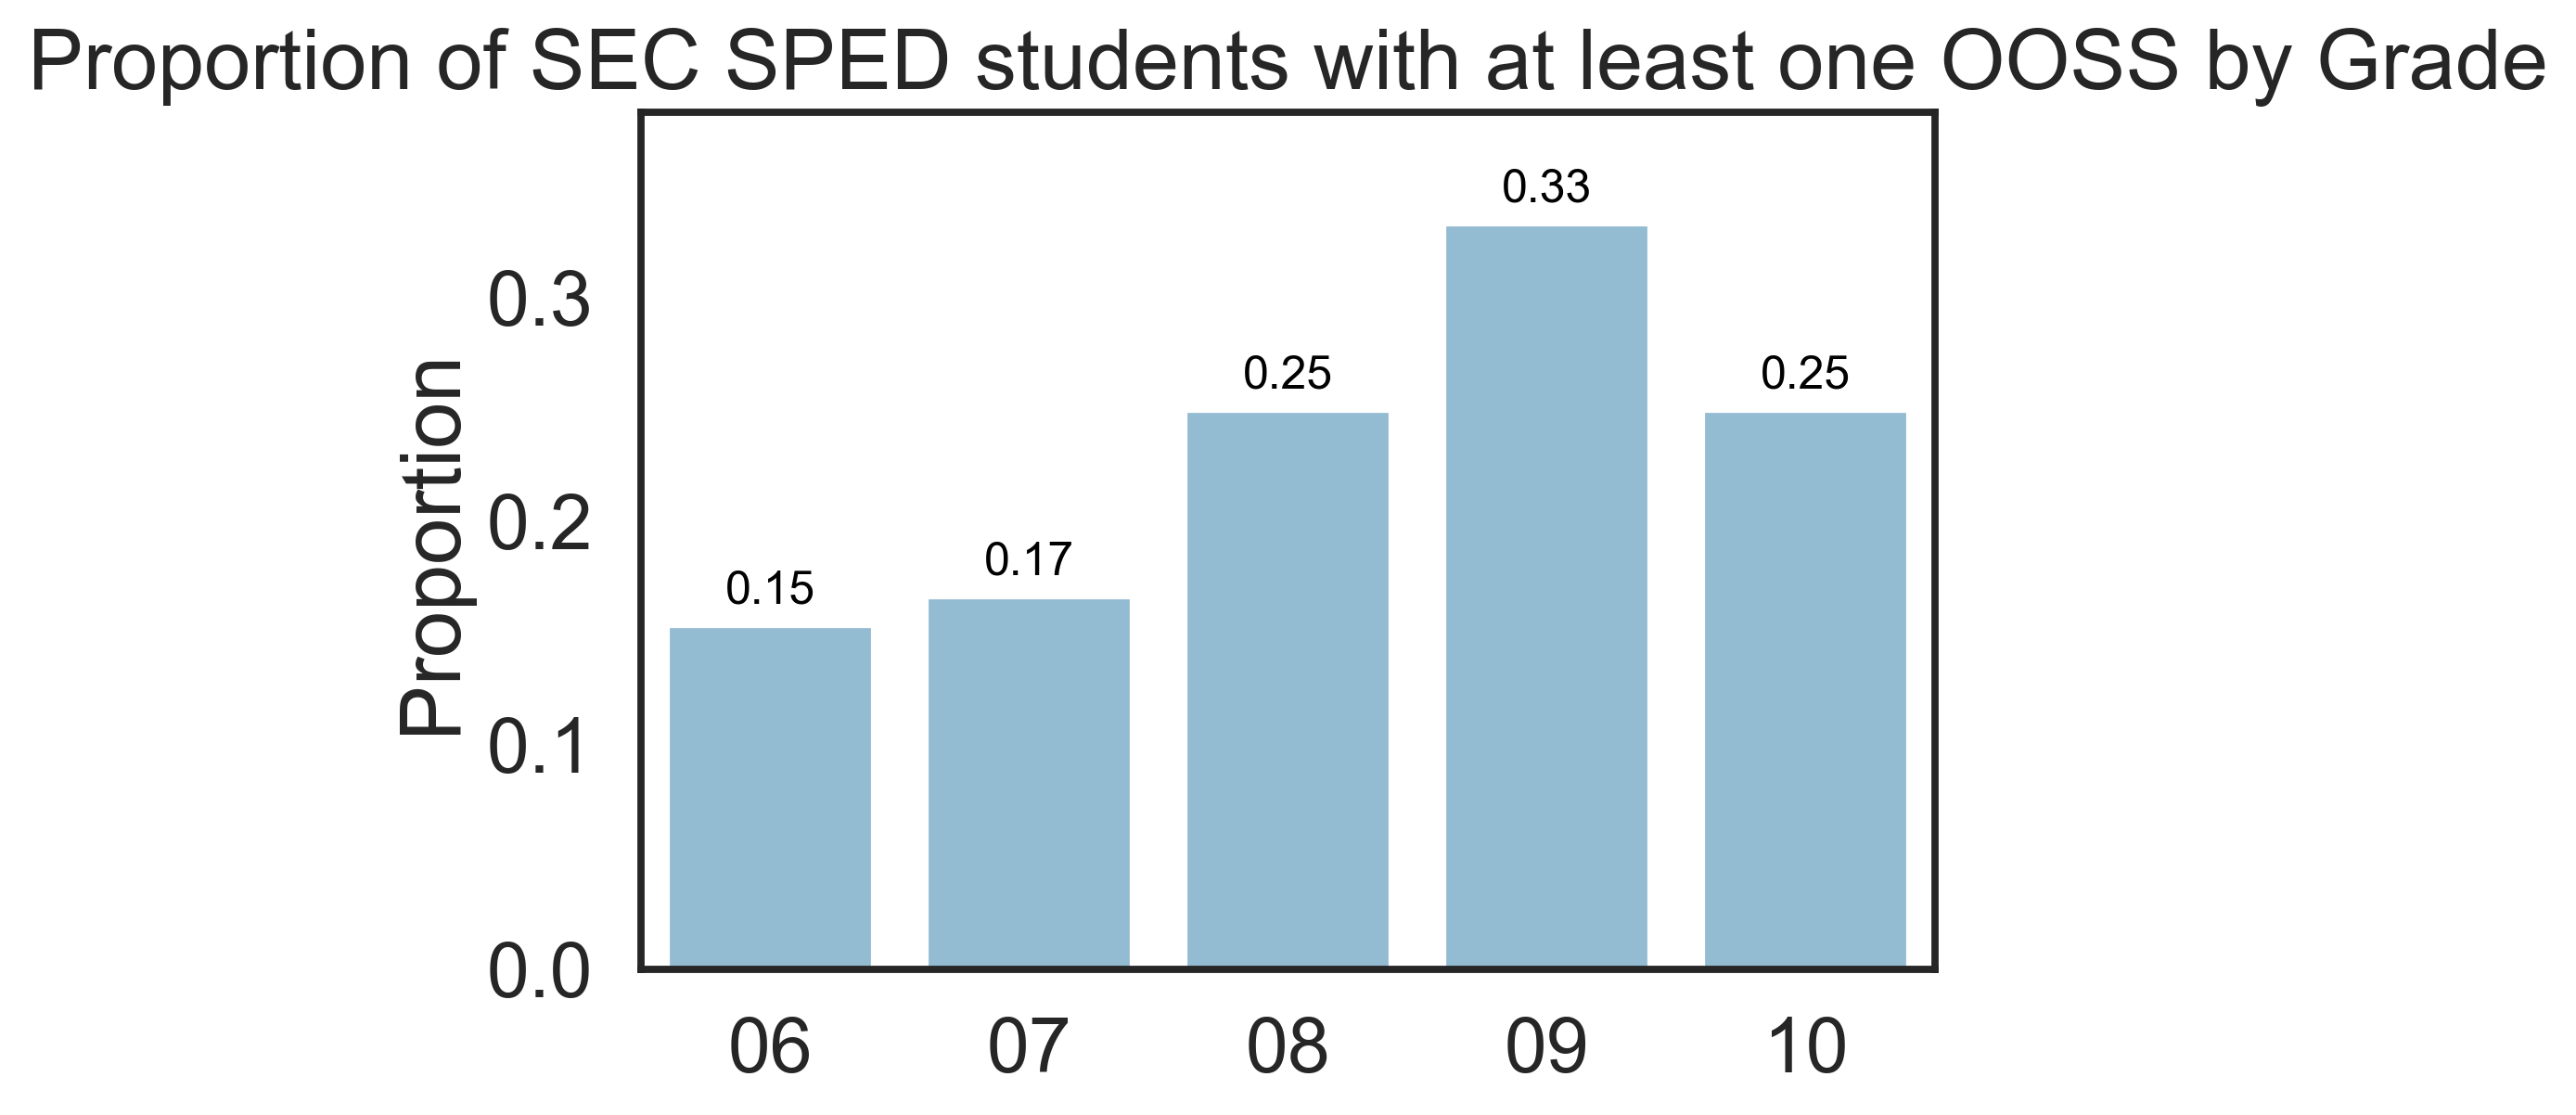

In [185]:
fig = plt.figure(figsize=(6,4))

df_to_plot=sec_df.groupby('Grade')['OOS Suspension'].value_counts(normalize=True).to_frame().reset_index()
df_to_plot=df_to_plot[df_to_plot['OOS Suspension']=='Yes'].rename(columns={'proportion':'Proportion'}).sort_values('Grade')

ax = sns.barplot(x='Grade',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of SEC SPED students with at least one OOSS by Grade")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/sec_ooss_by_grade', bbox_inches='tight')
plt.show()

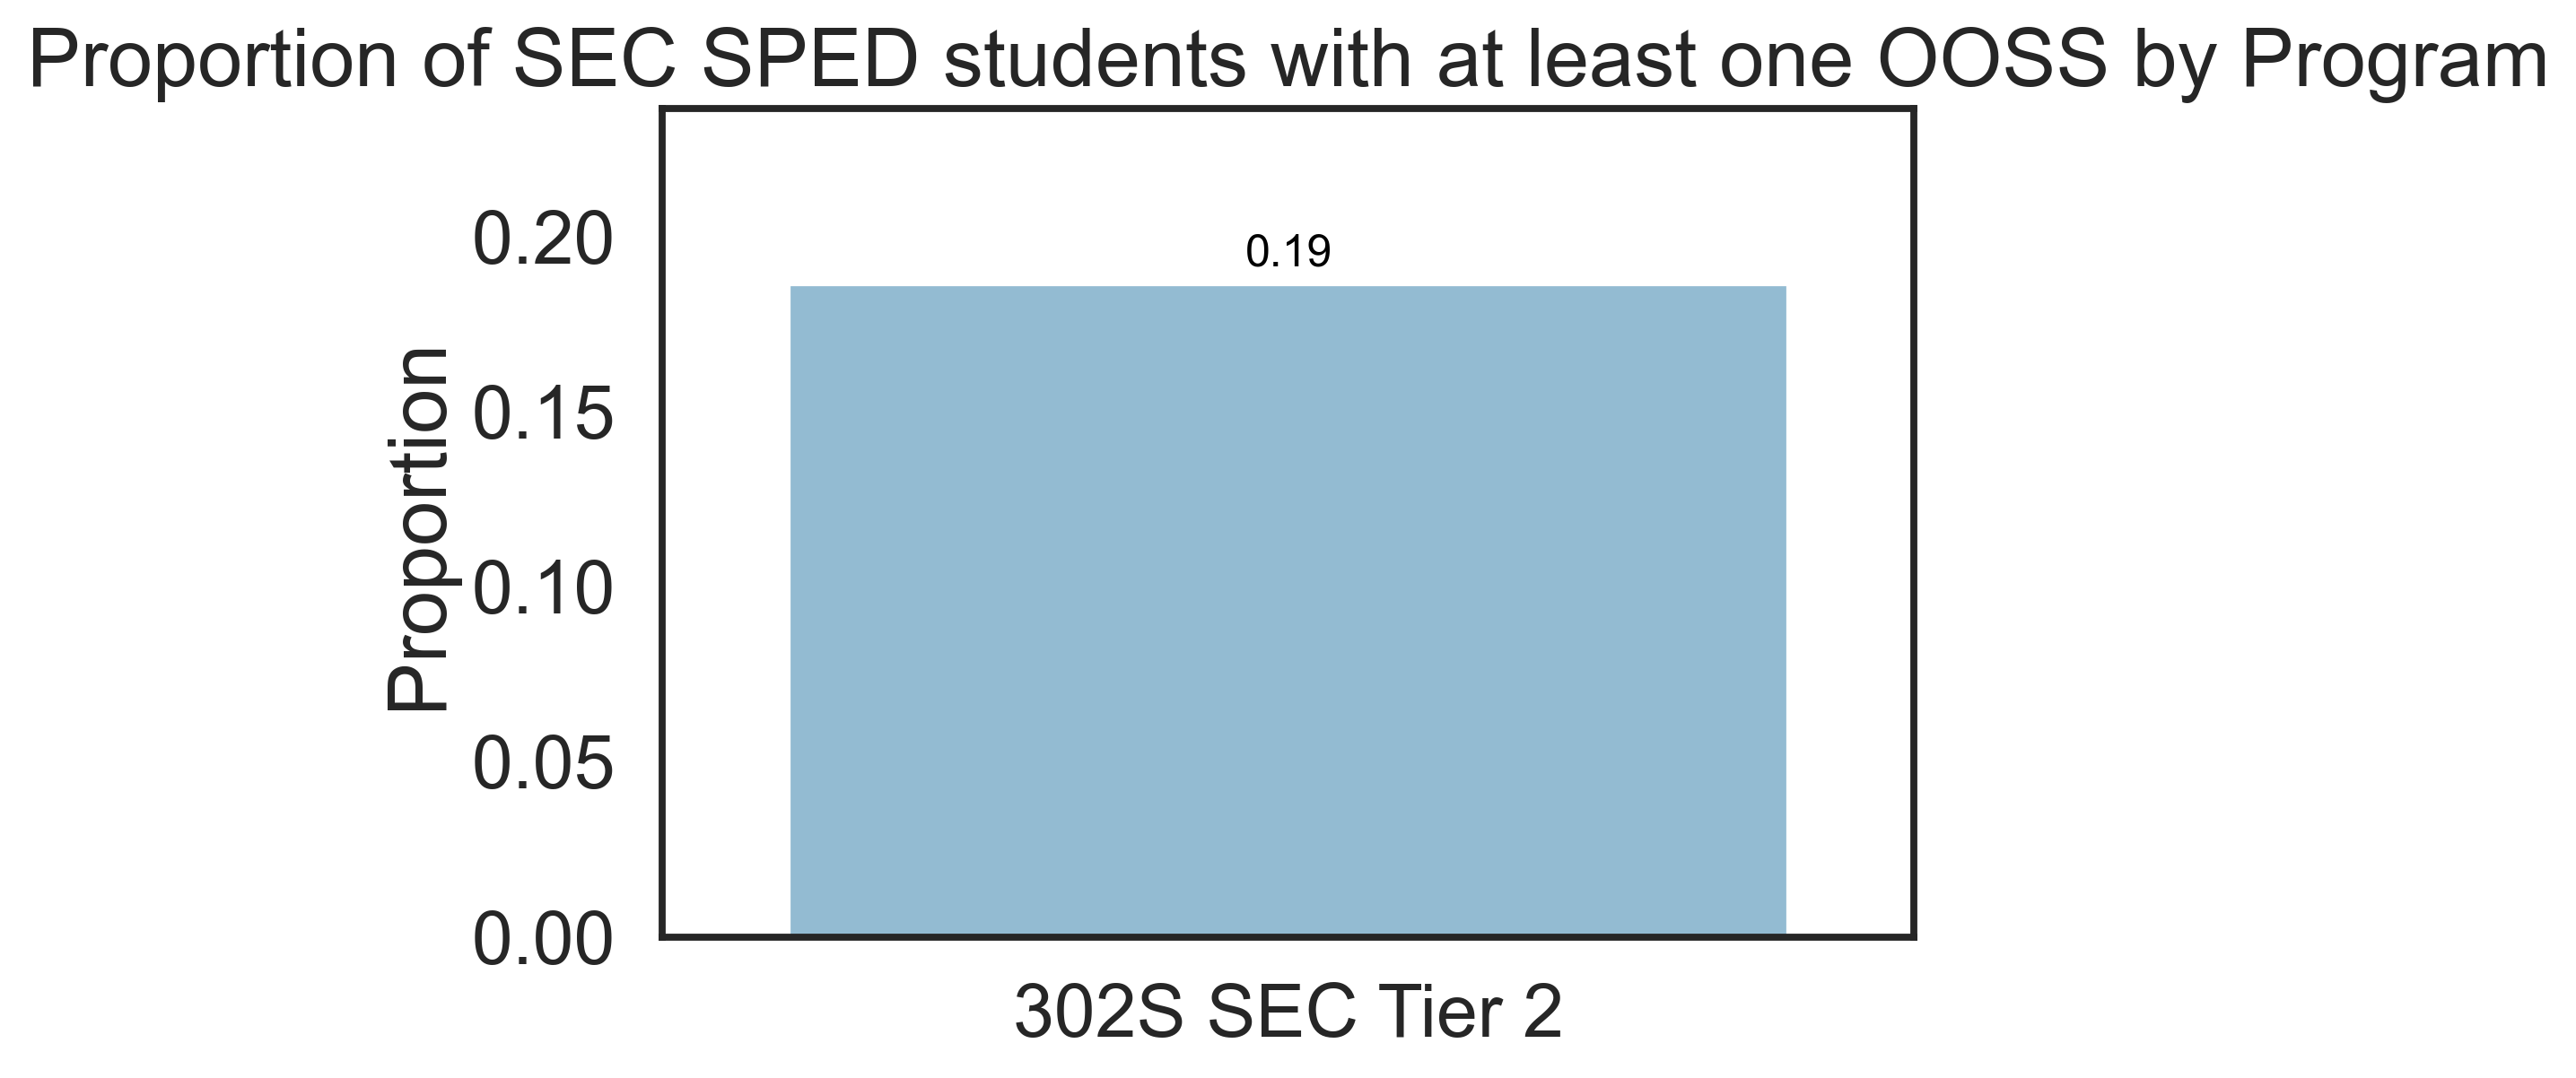

In [186]:
fig = plt.figure(figsize=(6,4))

df_to_plot=sec_df.groupby('Site/Program')['OOS Suspension'].value_counts(normalize=True).to_frame().reset_index()
df_to_plot=df_to_plot[df_to_plot['OOS Suspension']=='Yes'].rename(columns={'proportion':'Proportion'})

ax = sns.barplot(x='Site/Program',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .005, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of SEC SPED students with at least one OOSS by Program")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/sec_ooss_by_program', bbox_inches='tight')
plt.show()

C:\Users\mcyang\AppData\Local\Temp\ipykernel_3636\1759782858.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


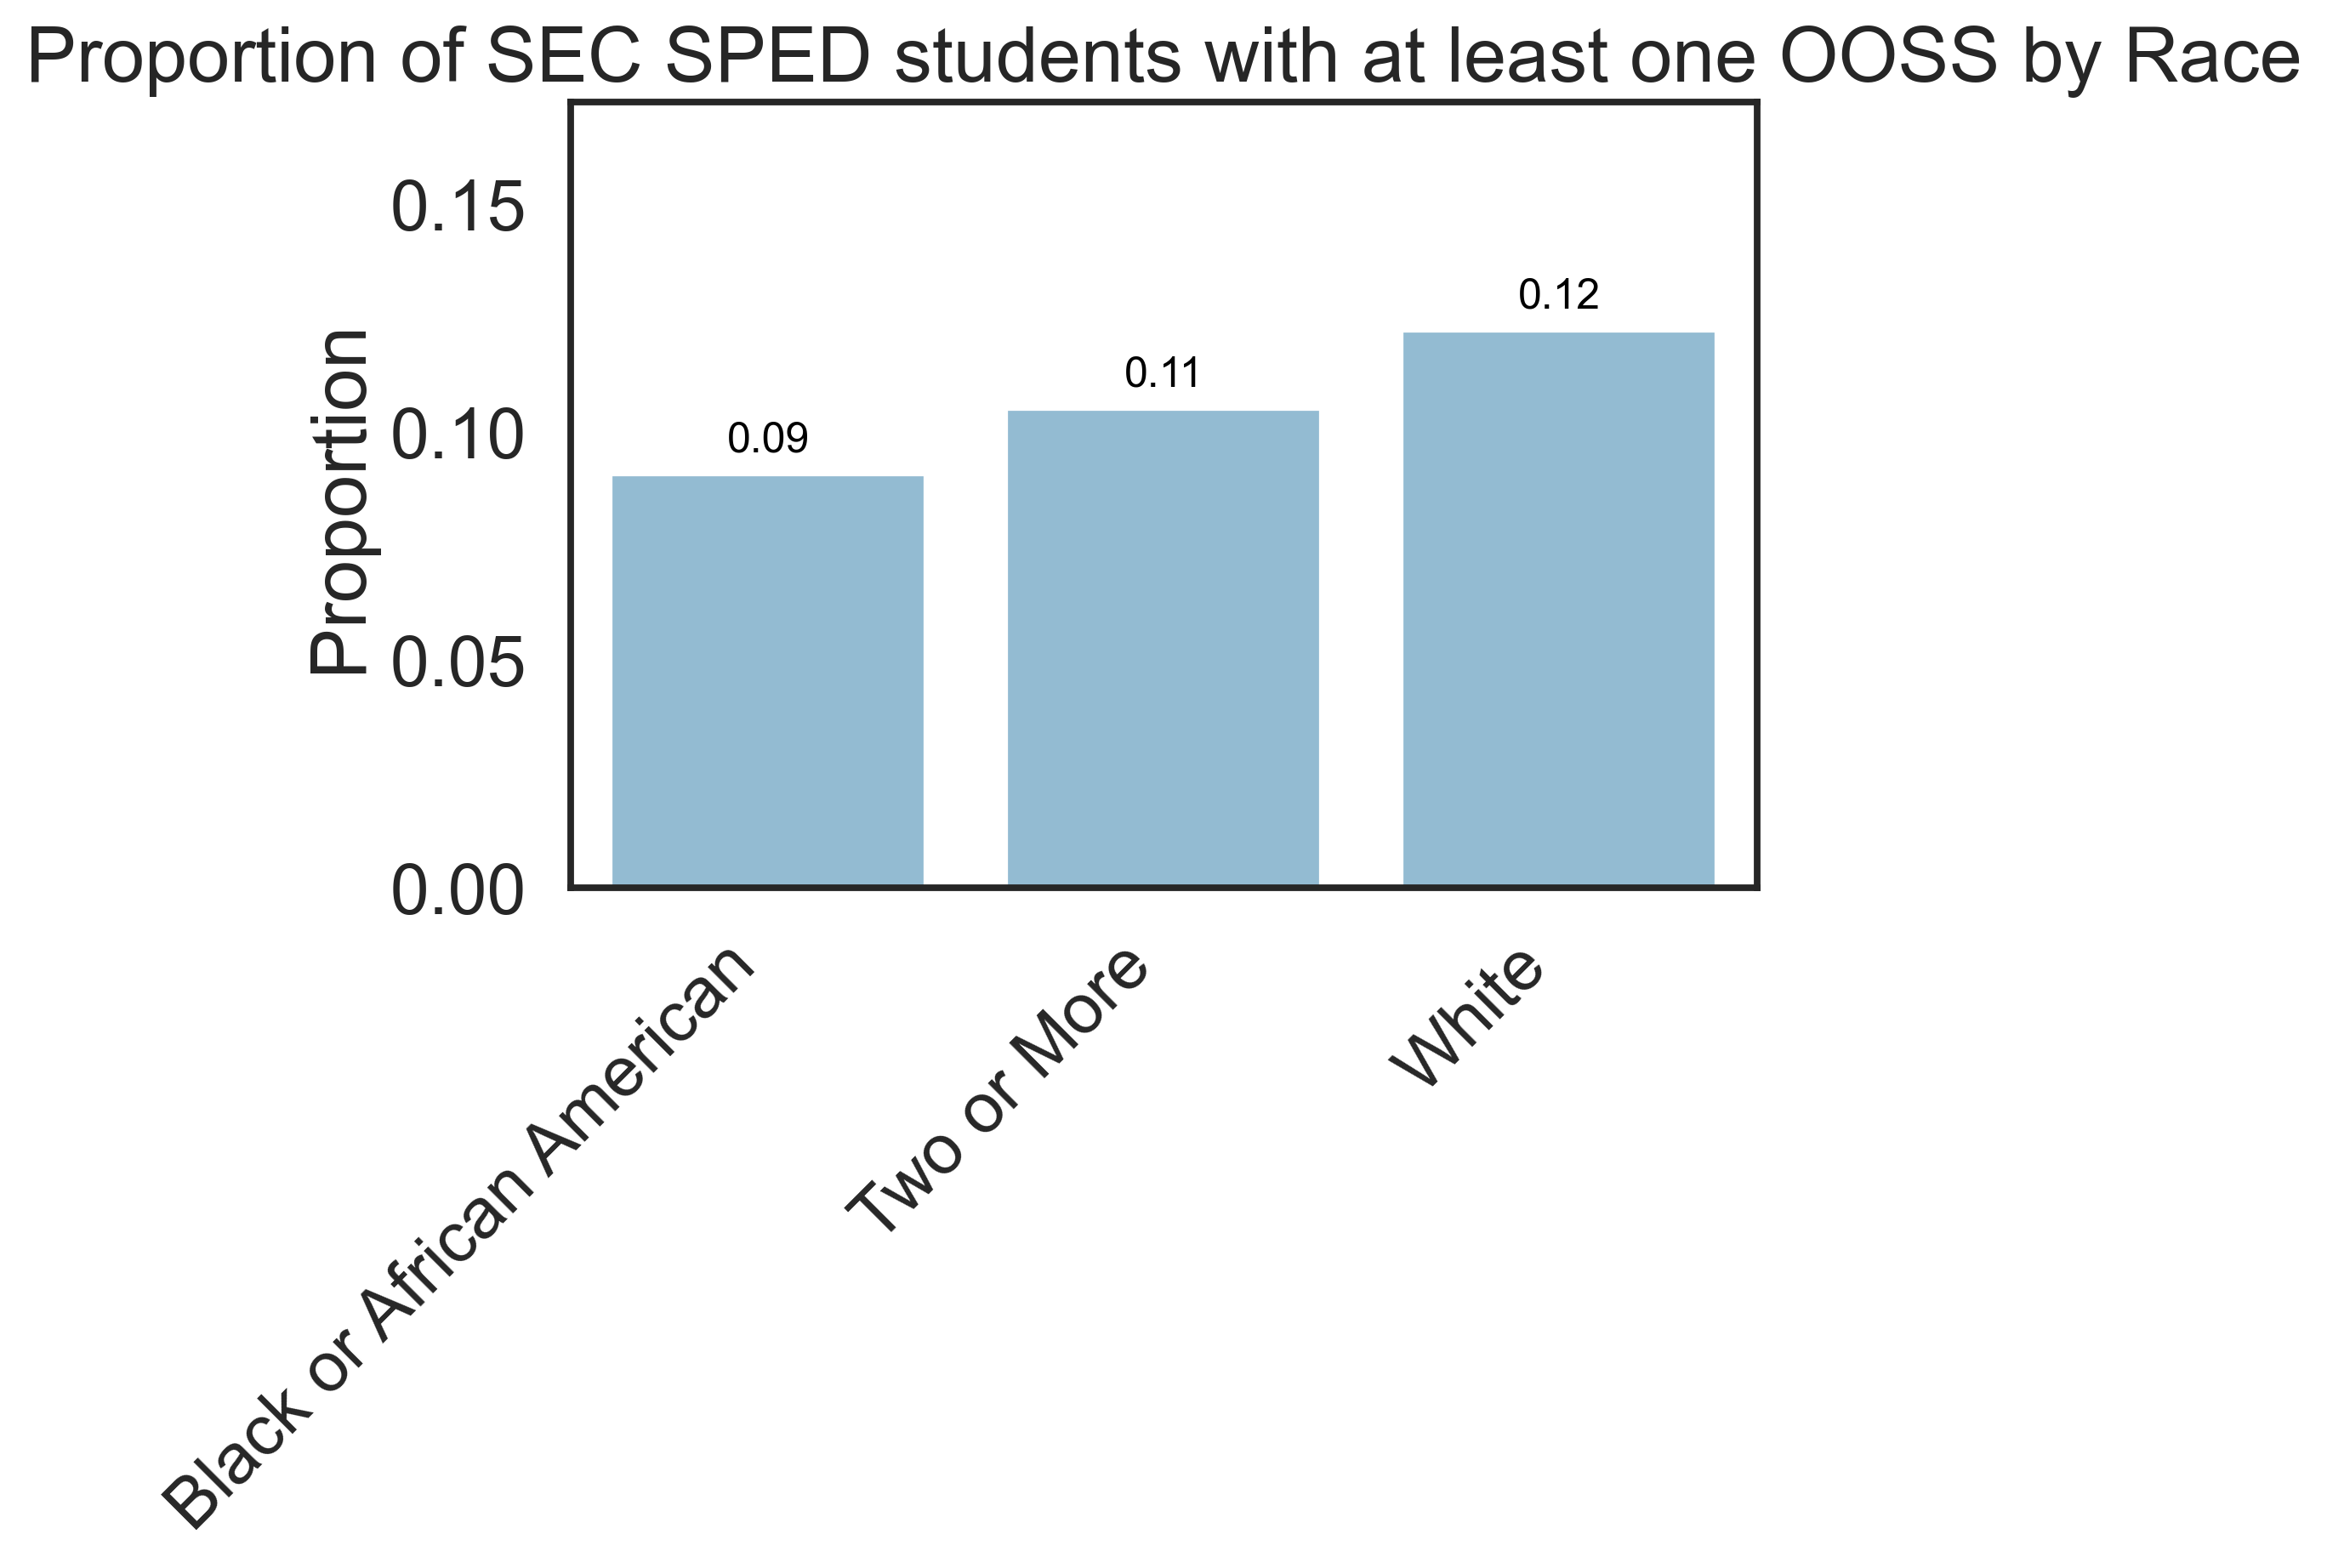

In [187]:
fig = plt.figure(figsize=(6,4))

df_to_plot=sec_df.groupby('Student Race')['OOS Suspension'].value_counts(normalize=True).to_frame().reset_index()
df_to_plot=df_to_plot[df_to_plot['OOS Suspension']=='Yes'].rename(columns={'proportion':'Proportion'})

ax = sns.barplot(x='Student Race',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .005, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of SEC SPED students with at least one OOSS by Race")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/sec_ooss_by_race', bbox_inches='tight')
plt.show()

## WEC 

In [188]:
wec_df=combined_df[combined_df['School']=='WEC SPED']
wec_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 19 to 2
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 57 non-null     object 
 1   Student Name                 59 non-null     object 
 2   District287 Id               59 non-null     int64  
 3   Grade                        59 non-null     object 
 4   Student Race                 59 non-null     object 
 5   Student Gender               59 non-null     object 
 6   Student Age                  57 non-null     object 
 7   Language Spoken In the Home  57 non-null     object 
 8   Original Enter Date          57 non-null     object 
 9   District Of Residence        57 non-null     object 
 10  Staff Name                   57 non-null     object 
 11  Classroom Enter Date         57 non-null     object 
 12  Classroom Leave Date         7 non-null      object 
 13  Employee Number            

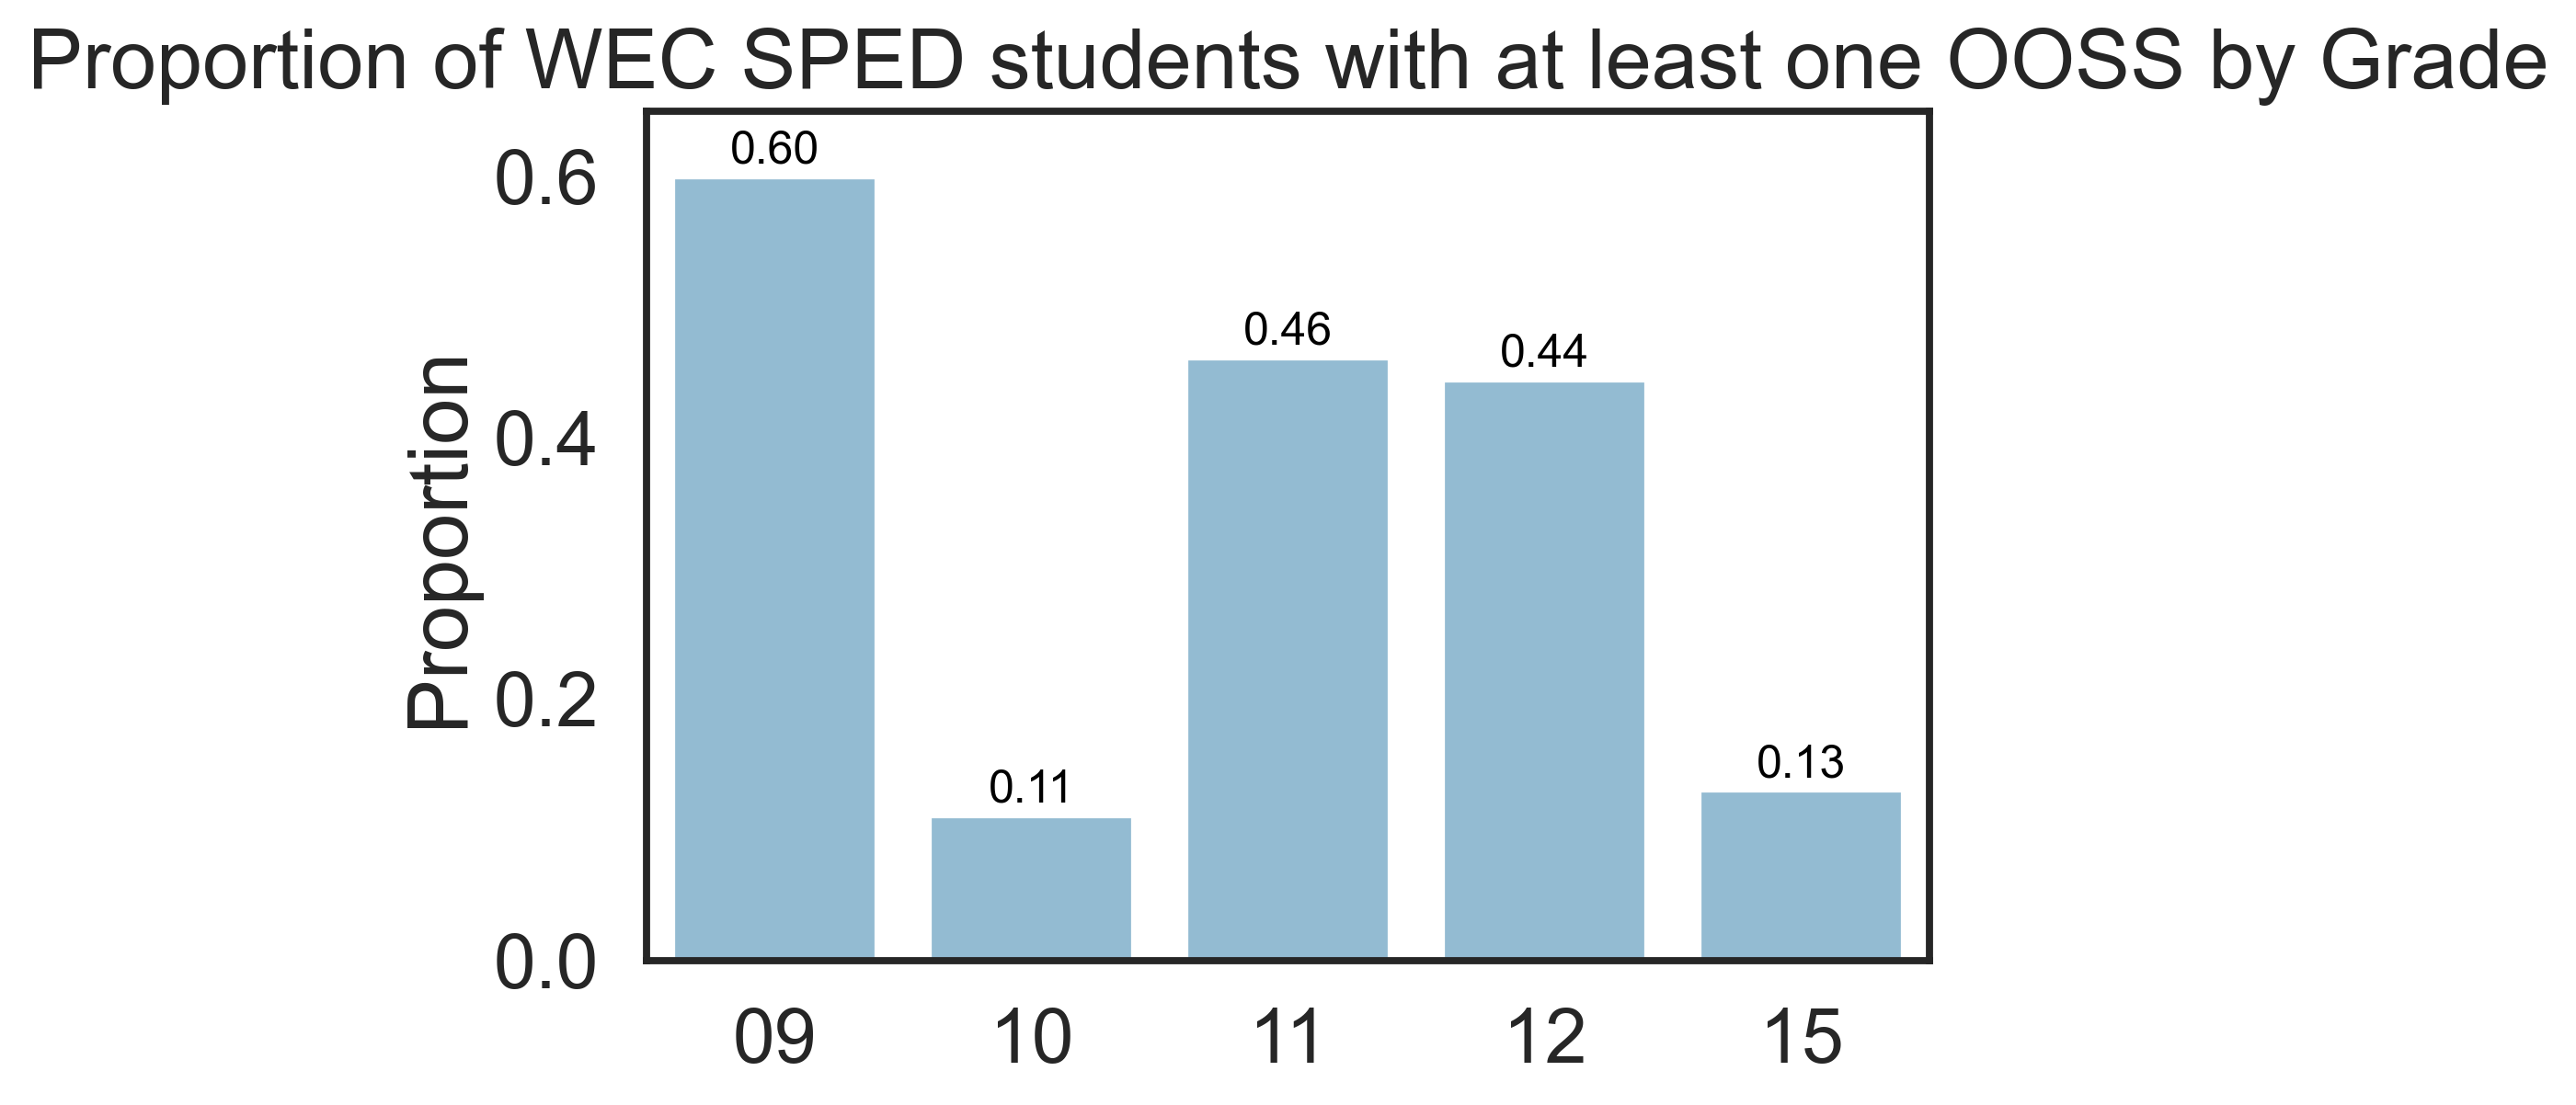

In [190]:
fig = plt.figure(figsize=(6,4))

df_to_plot=wec_df.groupby('Grade')['OOS Suspension'].value_counts(normalize=True).to_frame().reset_index()
df_to_plot=df_to_plot[df_to_plot['OOS Suspension']=='Yes'].rename(columns={'proportion':'Proportion'}).sort_values('Grade')

ax = sns.barplot(x='Grade',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of WEC SPED students with at least one OOSS by Grade")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/wec_ooss_by_grade', bbox_inches='tight')
plt.show()

C:\Users\mcyang\AppData\Local\Temp\ipykernel_3636\3773421682.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


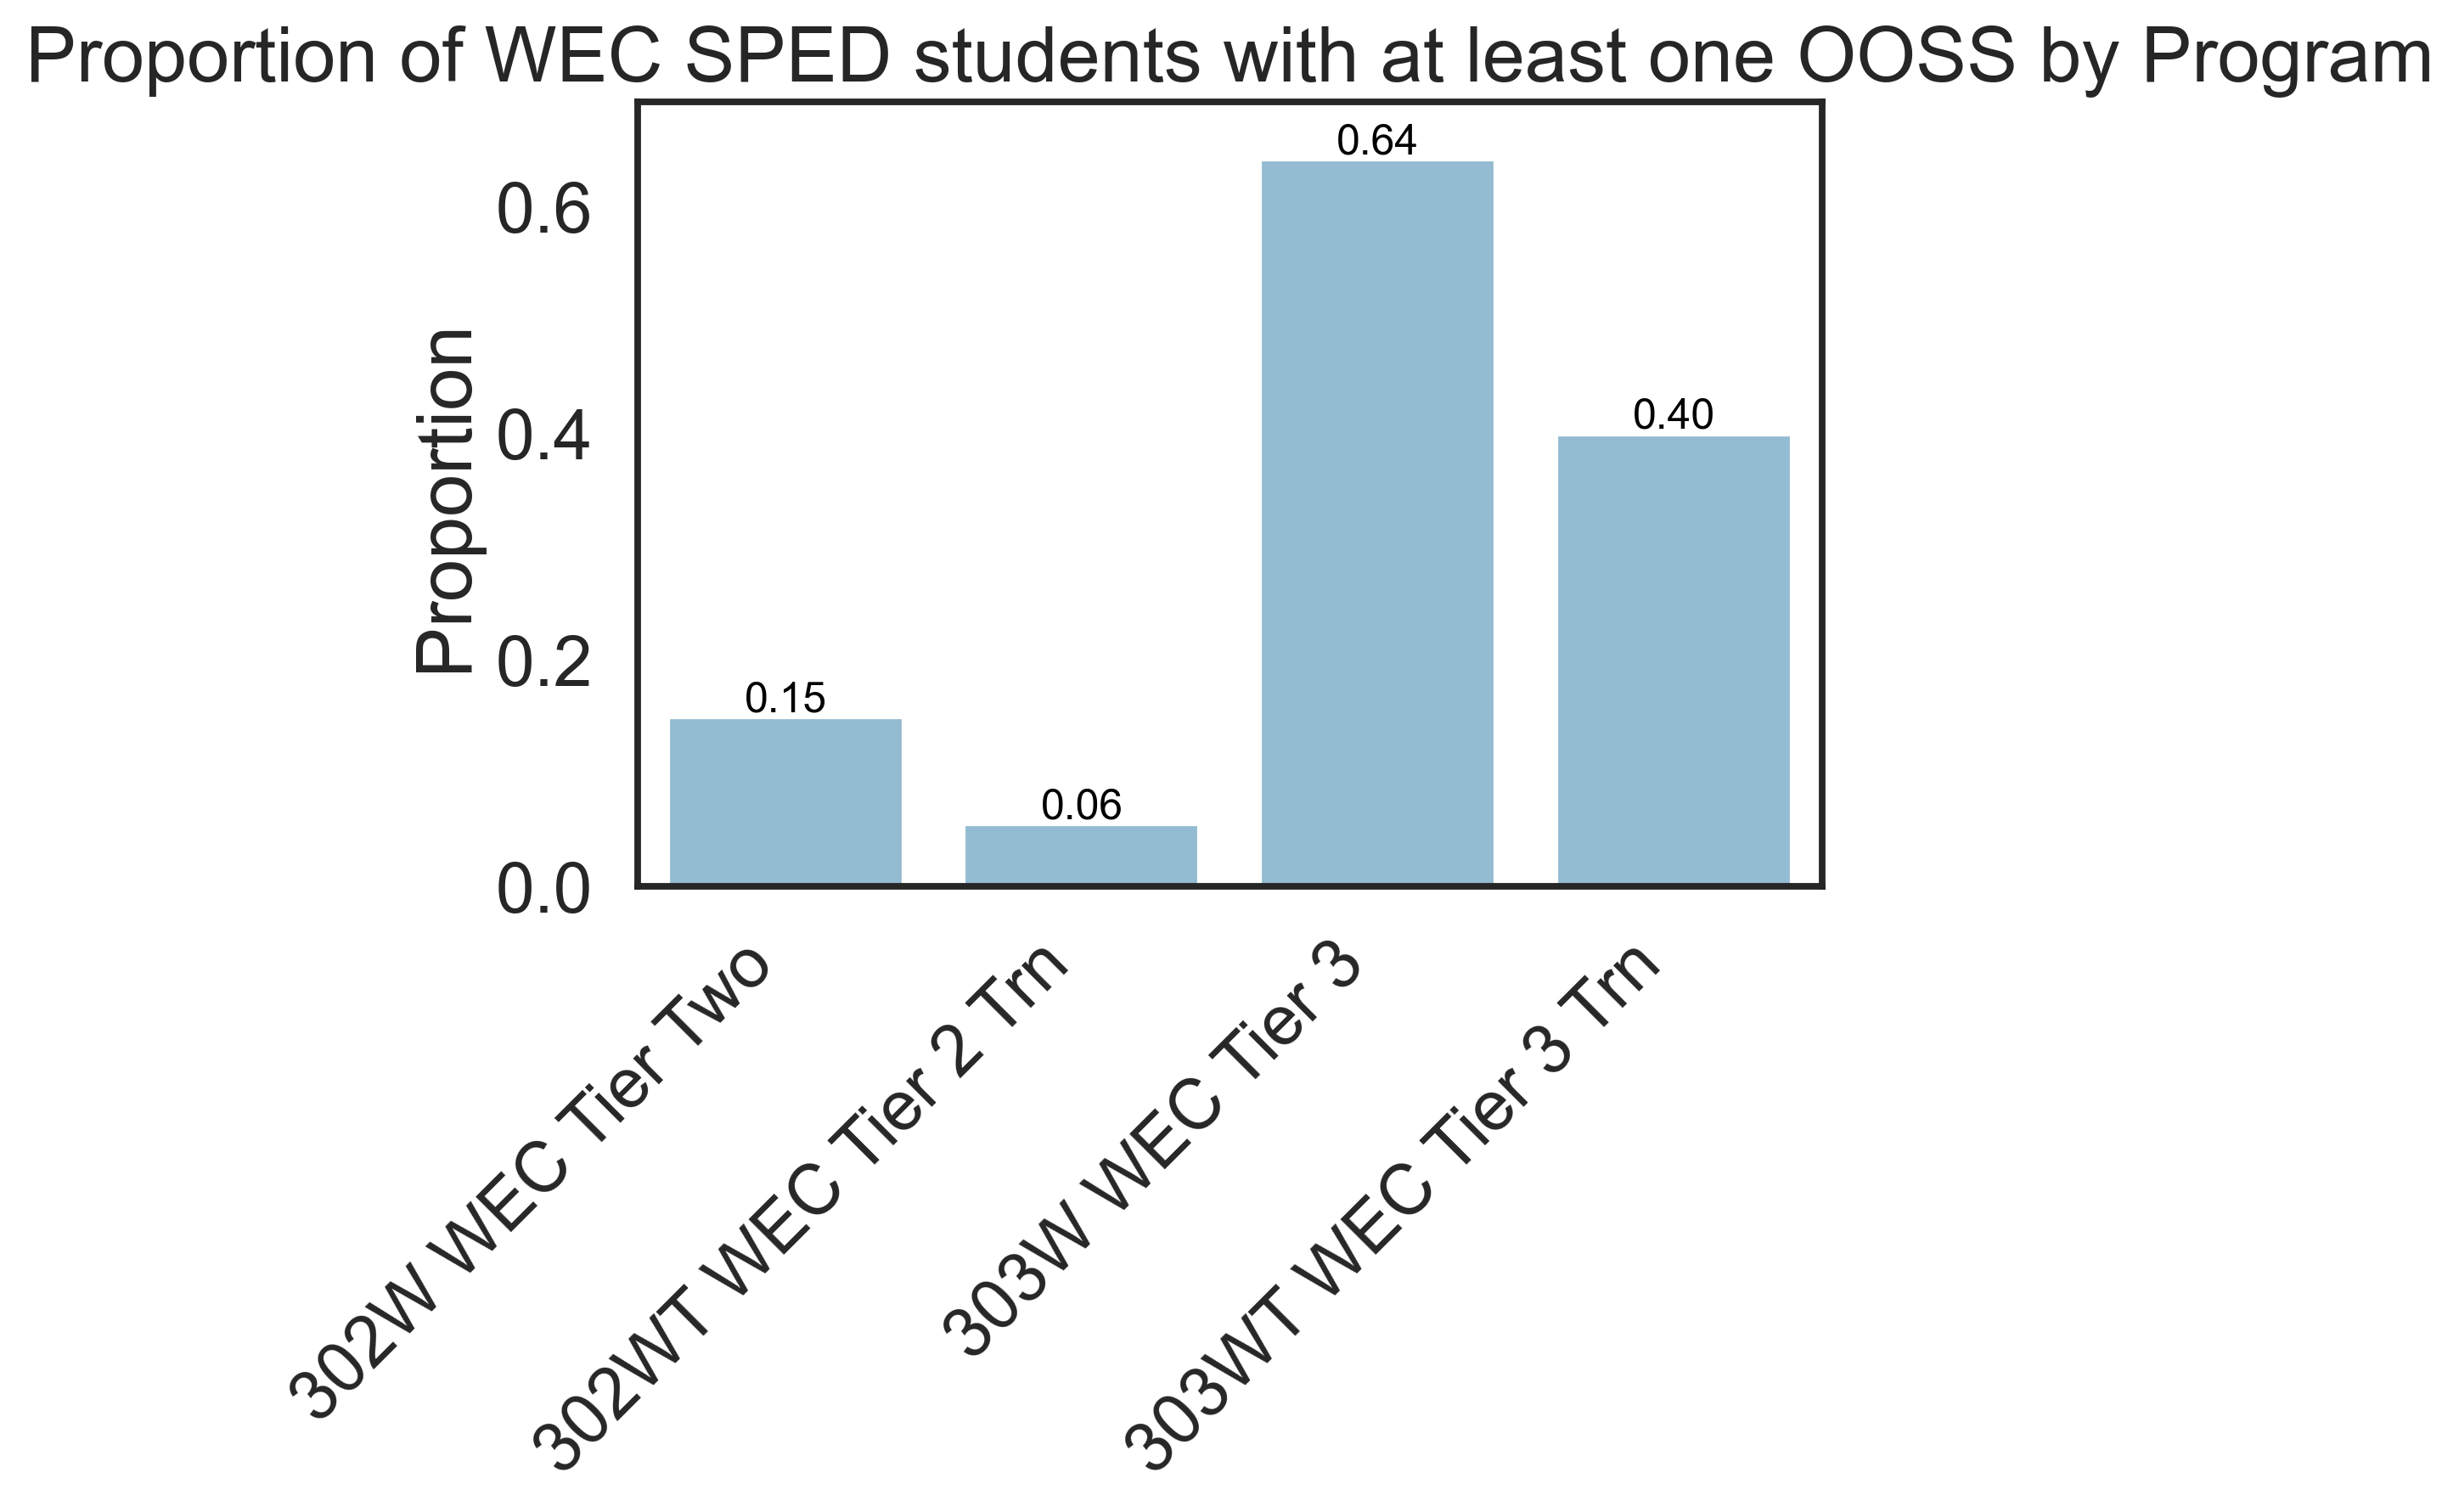

In [191]:
fig = plt.figure(figsize=(6,4))

df_to_plot=wec_df.groupby('Site/Program')['OOS Suspension'].value_counts(normalize=True).to_frame().reset_index()
df_to_plot=df_to_plot[df_to_plot['OOS Suspension']=='Yes'].rename(columns={'proportion':'Proportion'})

ax = sns.barplot(x='Site/Program',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .005, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of WEC SPED students with at least one OOSS by Program")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/wec_ooss_by_program', bbox_inches='tight')
plt.show()

C:\Users\mcyang\AppData\Local\Temp\ipykernel_3636\4083234781.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


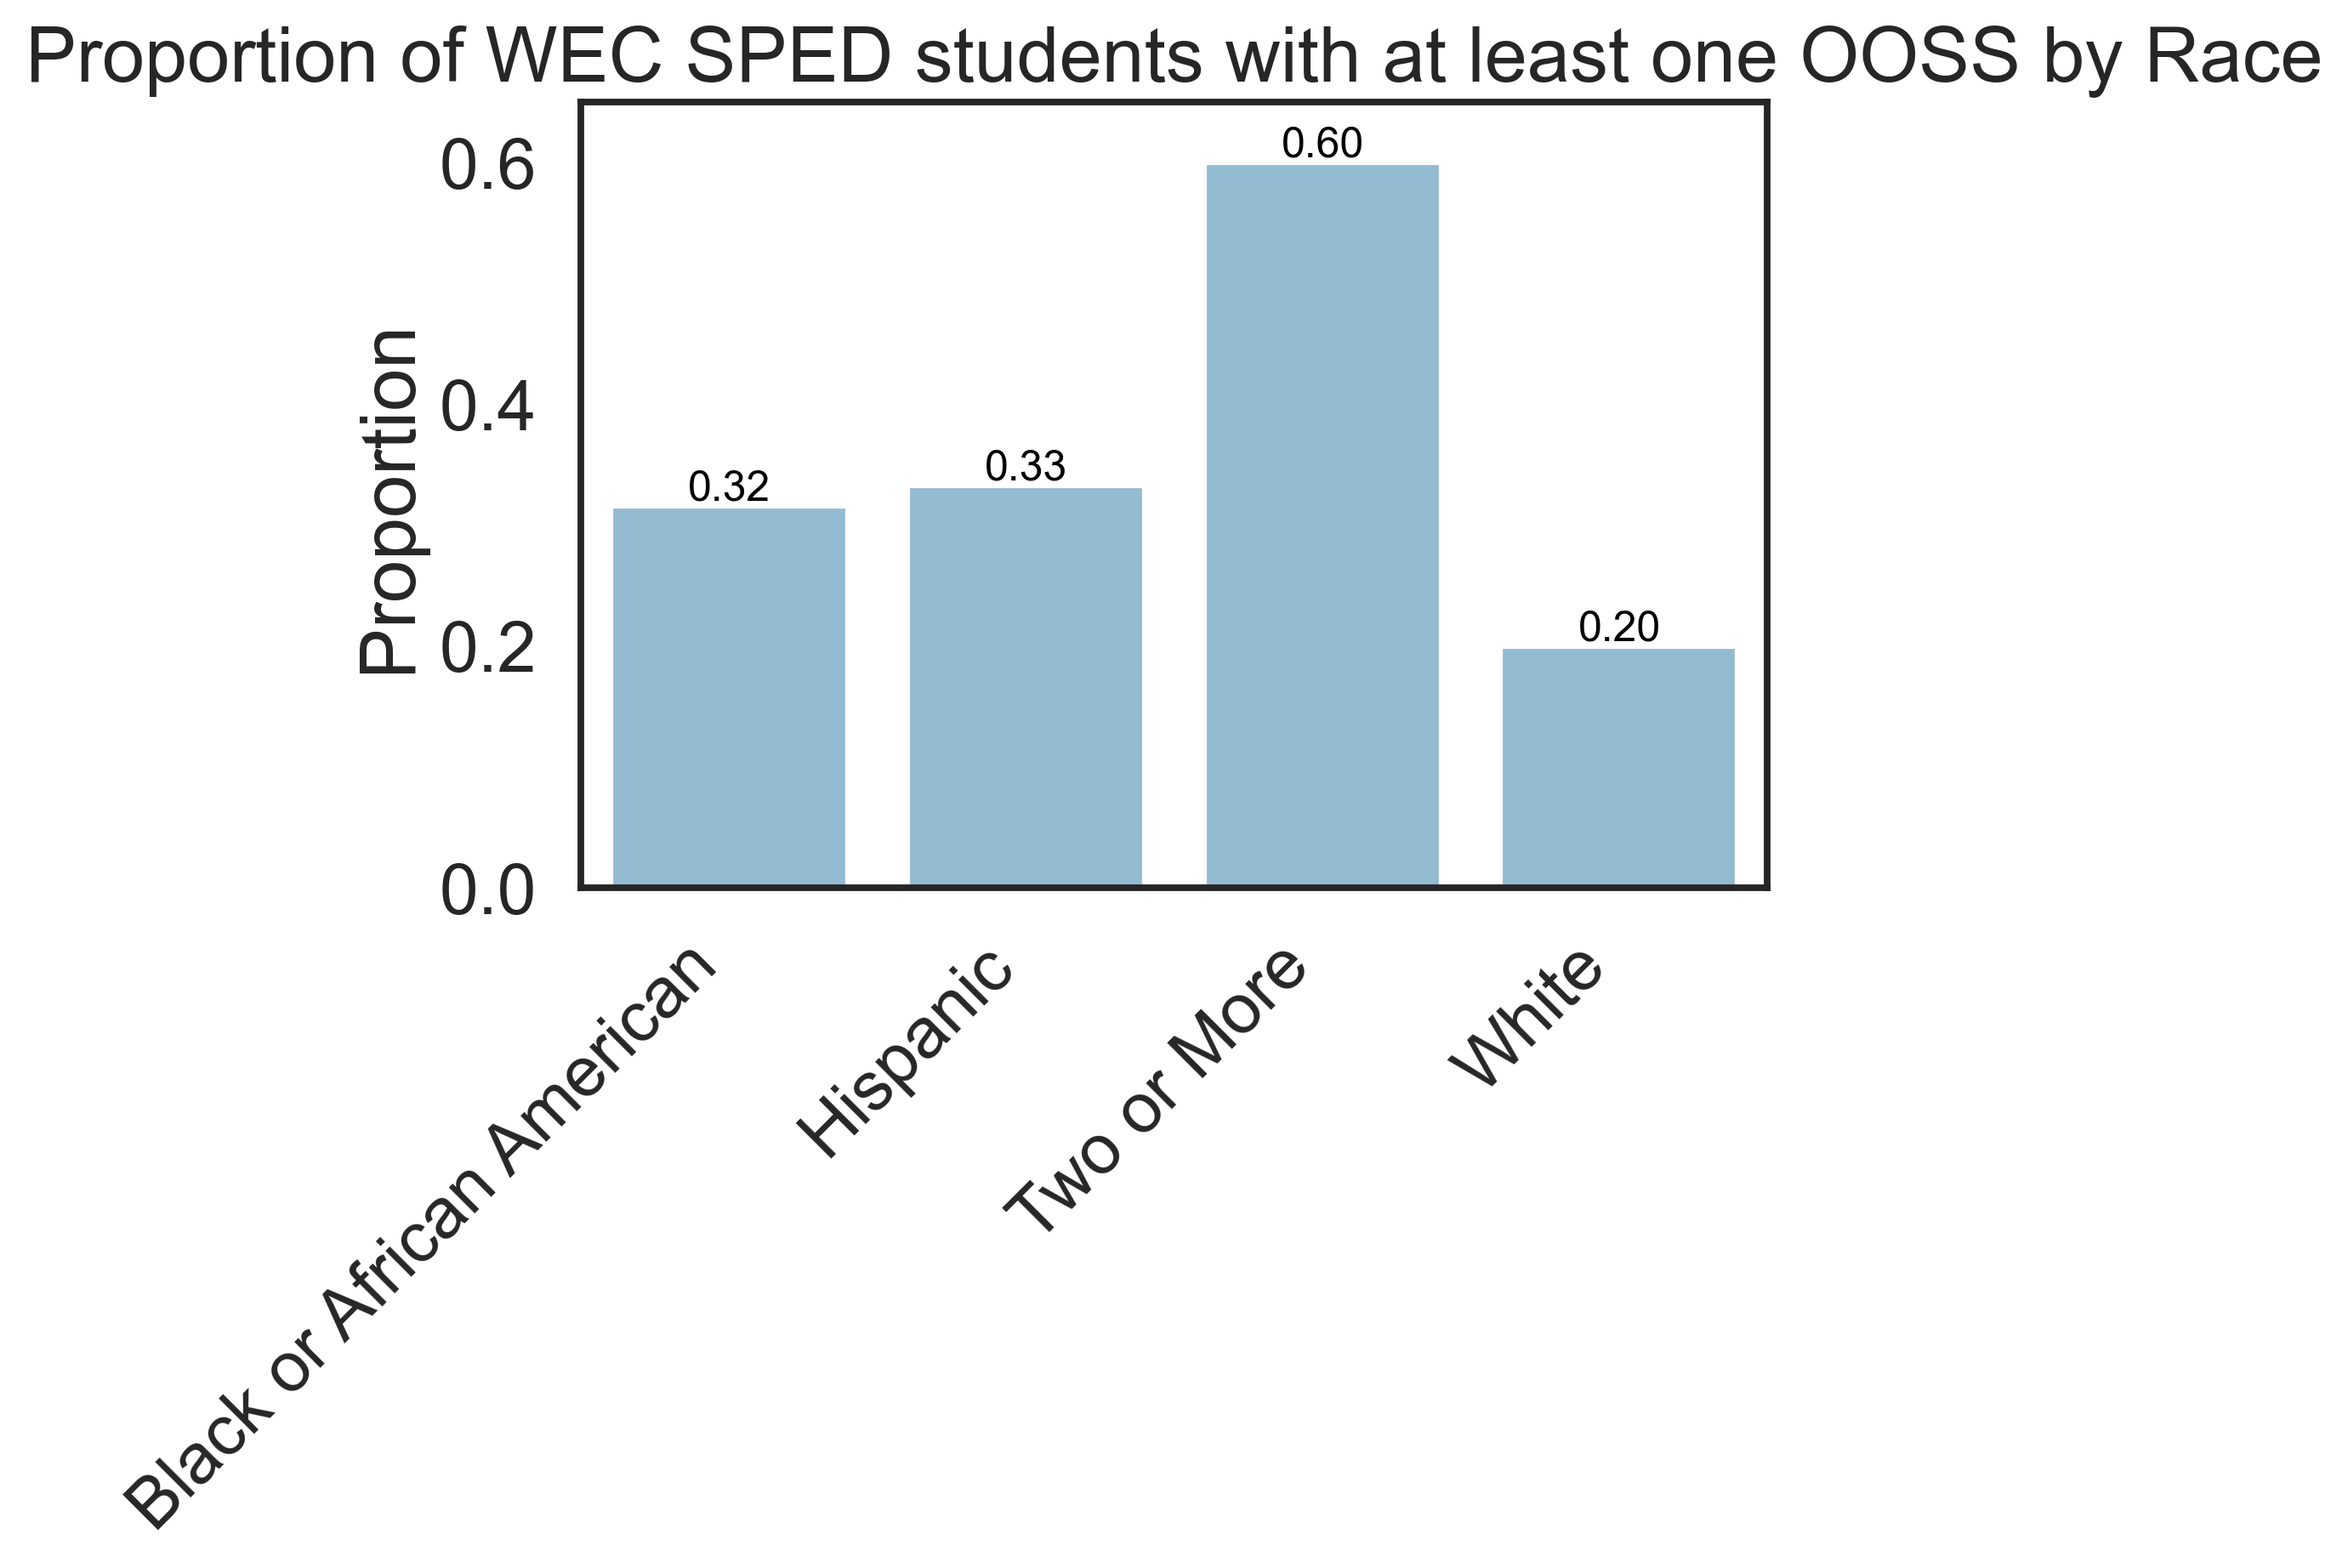

In [195]:
fig = plt.figure(figsize=(6,4))

df_to_plot=wec_df.groupby('Student Race')['OOS Suspension'].value_counts(normalize=True).to_frame().reset_index()
df_to_plot=df_to_plot[df_to_plot['OOS Suspension']=='Yes'].rename(columns={'proportion':'Proportion'})

ax = sns.barplot(x='Student Race',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .005, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of WEC SPED students with at least one OOSS by Race")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/wec_ooss_by_race', bbox_inches='tight')
plt.show()

## W-ALT

In [196]:
walt_df=combined_df[combined_df['School']=='W-ALT']
walt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 24 to 949
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 114 non-null    object 
 1   Student Name                 114 non-null    object 
 2   District287 Id               114 non-null    int64  
 3   Grade                        114 non-null    object 
 4   Student Race                 114 non-null    object 
 5   Student Gender               114 non-null    object 
 6   Student Age                  114 non-null    object 
 7   Language Spoken In the Home  114 non-null    object 
 8   Original Enter Date          114 non-null    object 
 9   District Of Residence        114 non-null    object 
 10  Staff Name                   114 non-null    object 
 11  Classroom Enter Date         114 non-null    object 
 12  Classroom Leave Date         21 non-null     object 
 13  Employee Number         

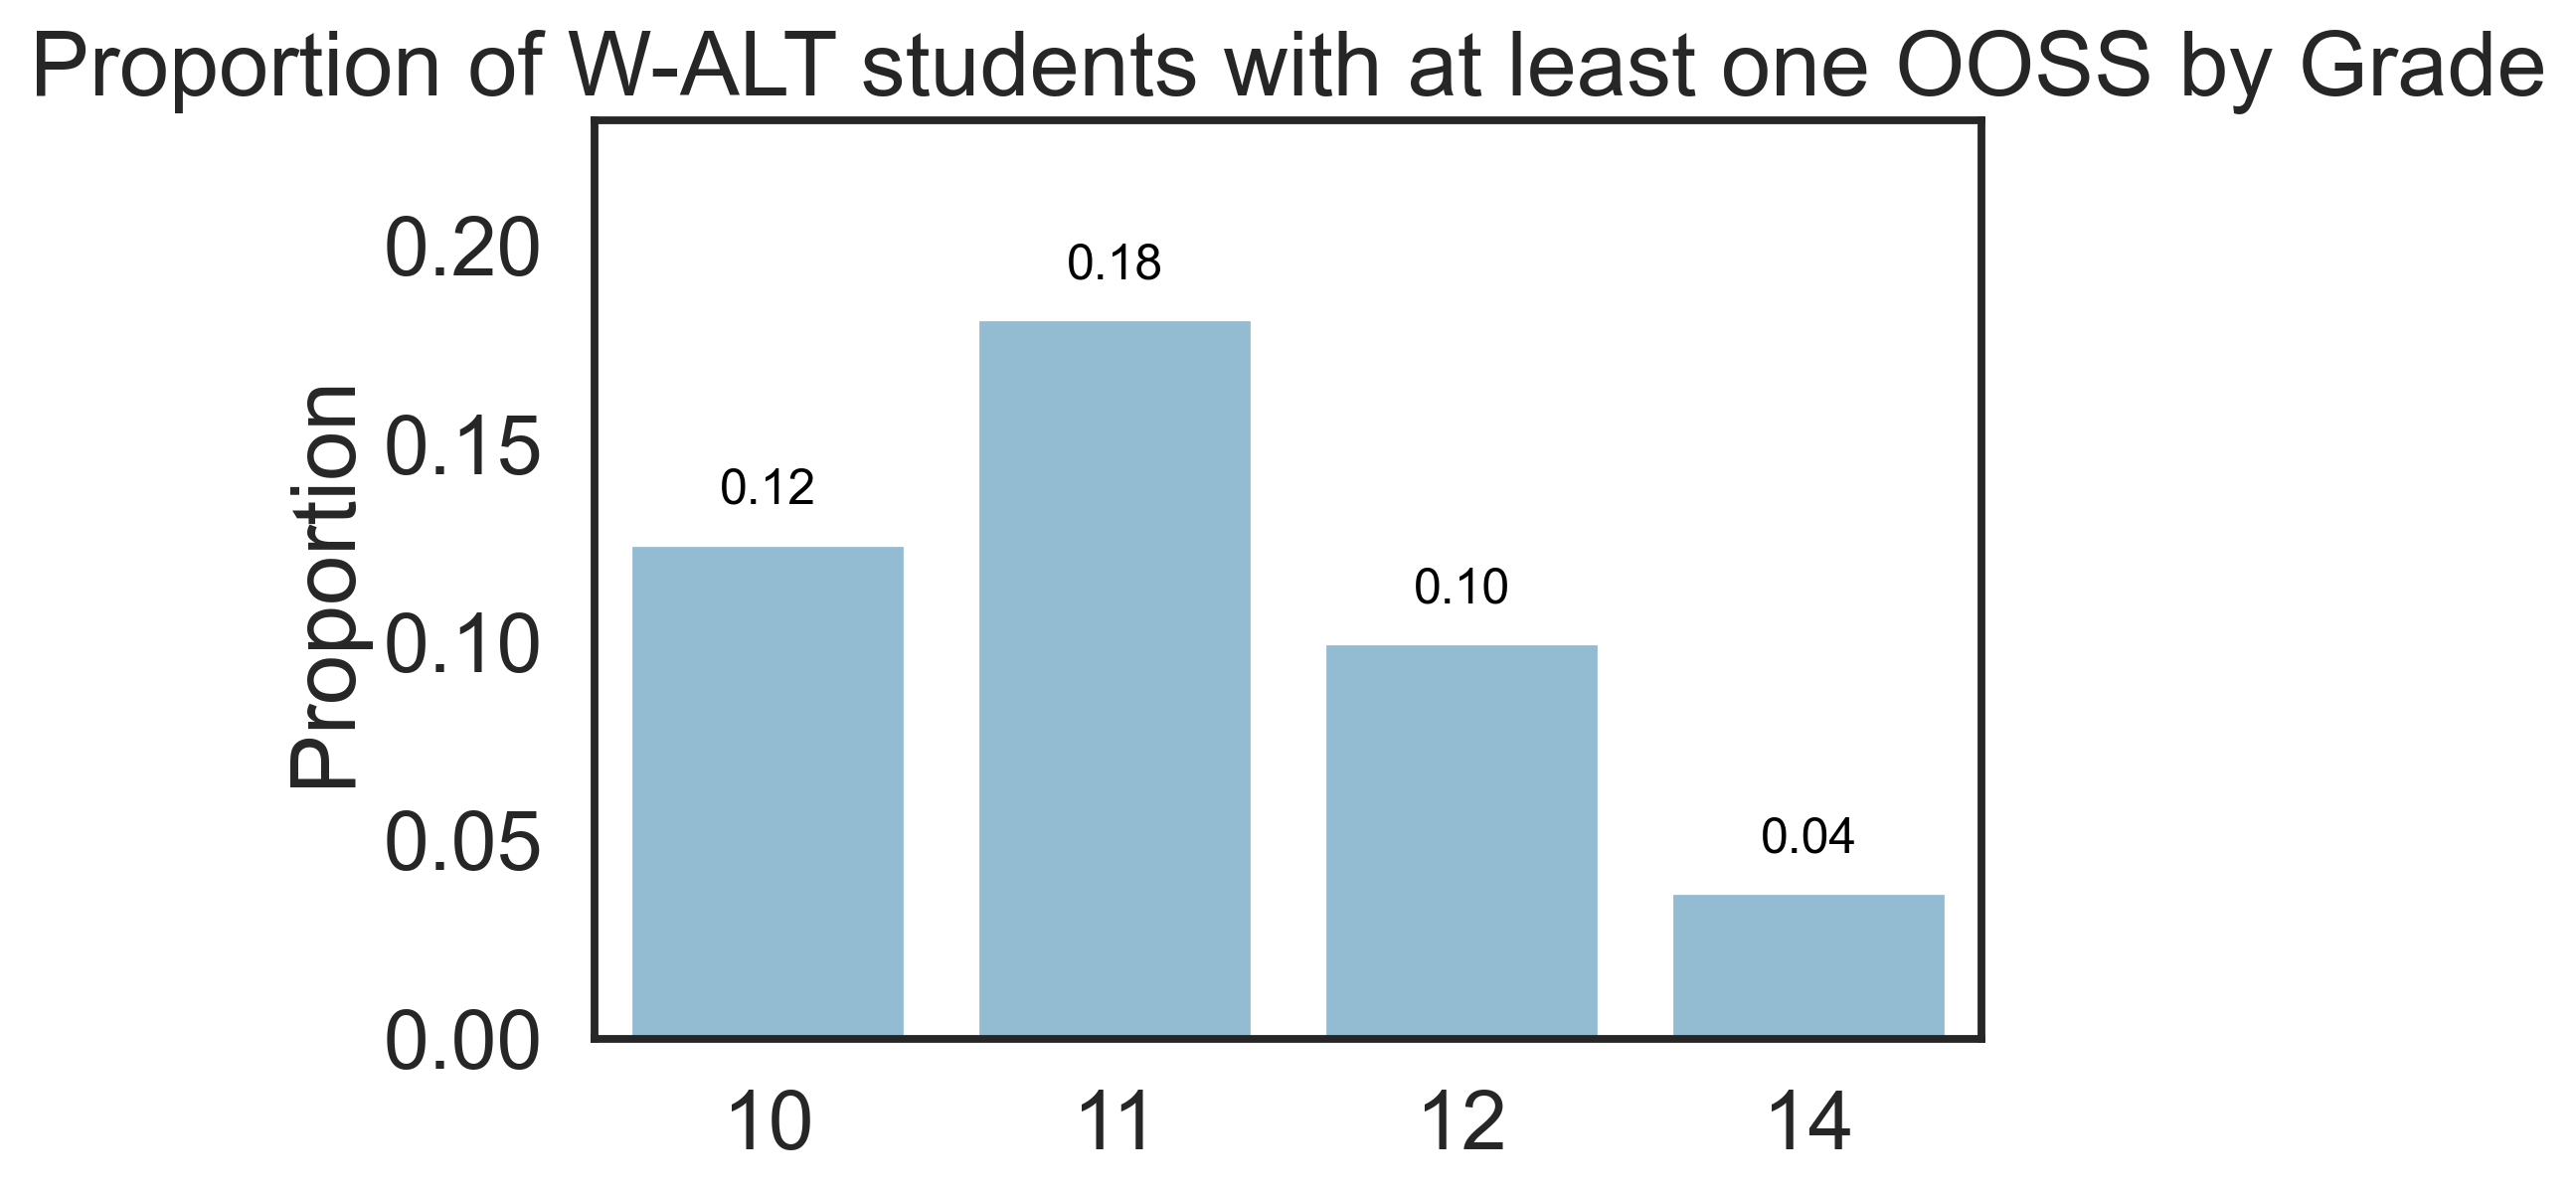

In [197]:
fig = plt.figure(figsize=(6,4))

df_to_plot=walt_df.groupby('Grade')['OOS Suspension'].value_counts(normalize=True).to_frame().reset_index()
df_to_plot=df_to_plot[df_to_plot['OOS Suspension']=='Yes'].rename(columns={'proportion':'Proportion'}).sort_values('Grade')

ax = sns.barplot(x='Grade',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of W-ALT students with at least one OOSS by Grade")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/walt_ooss_by_grade', bbox_inches='tight')
plt.show()

C:\Users\mcyang\AppData\Local\Temp\ipykernel_3636\2923914010.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


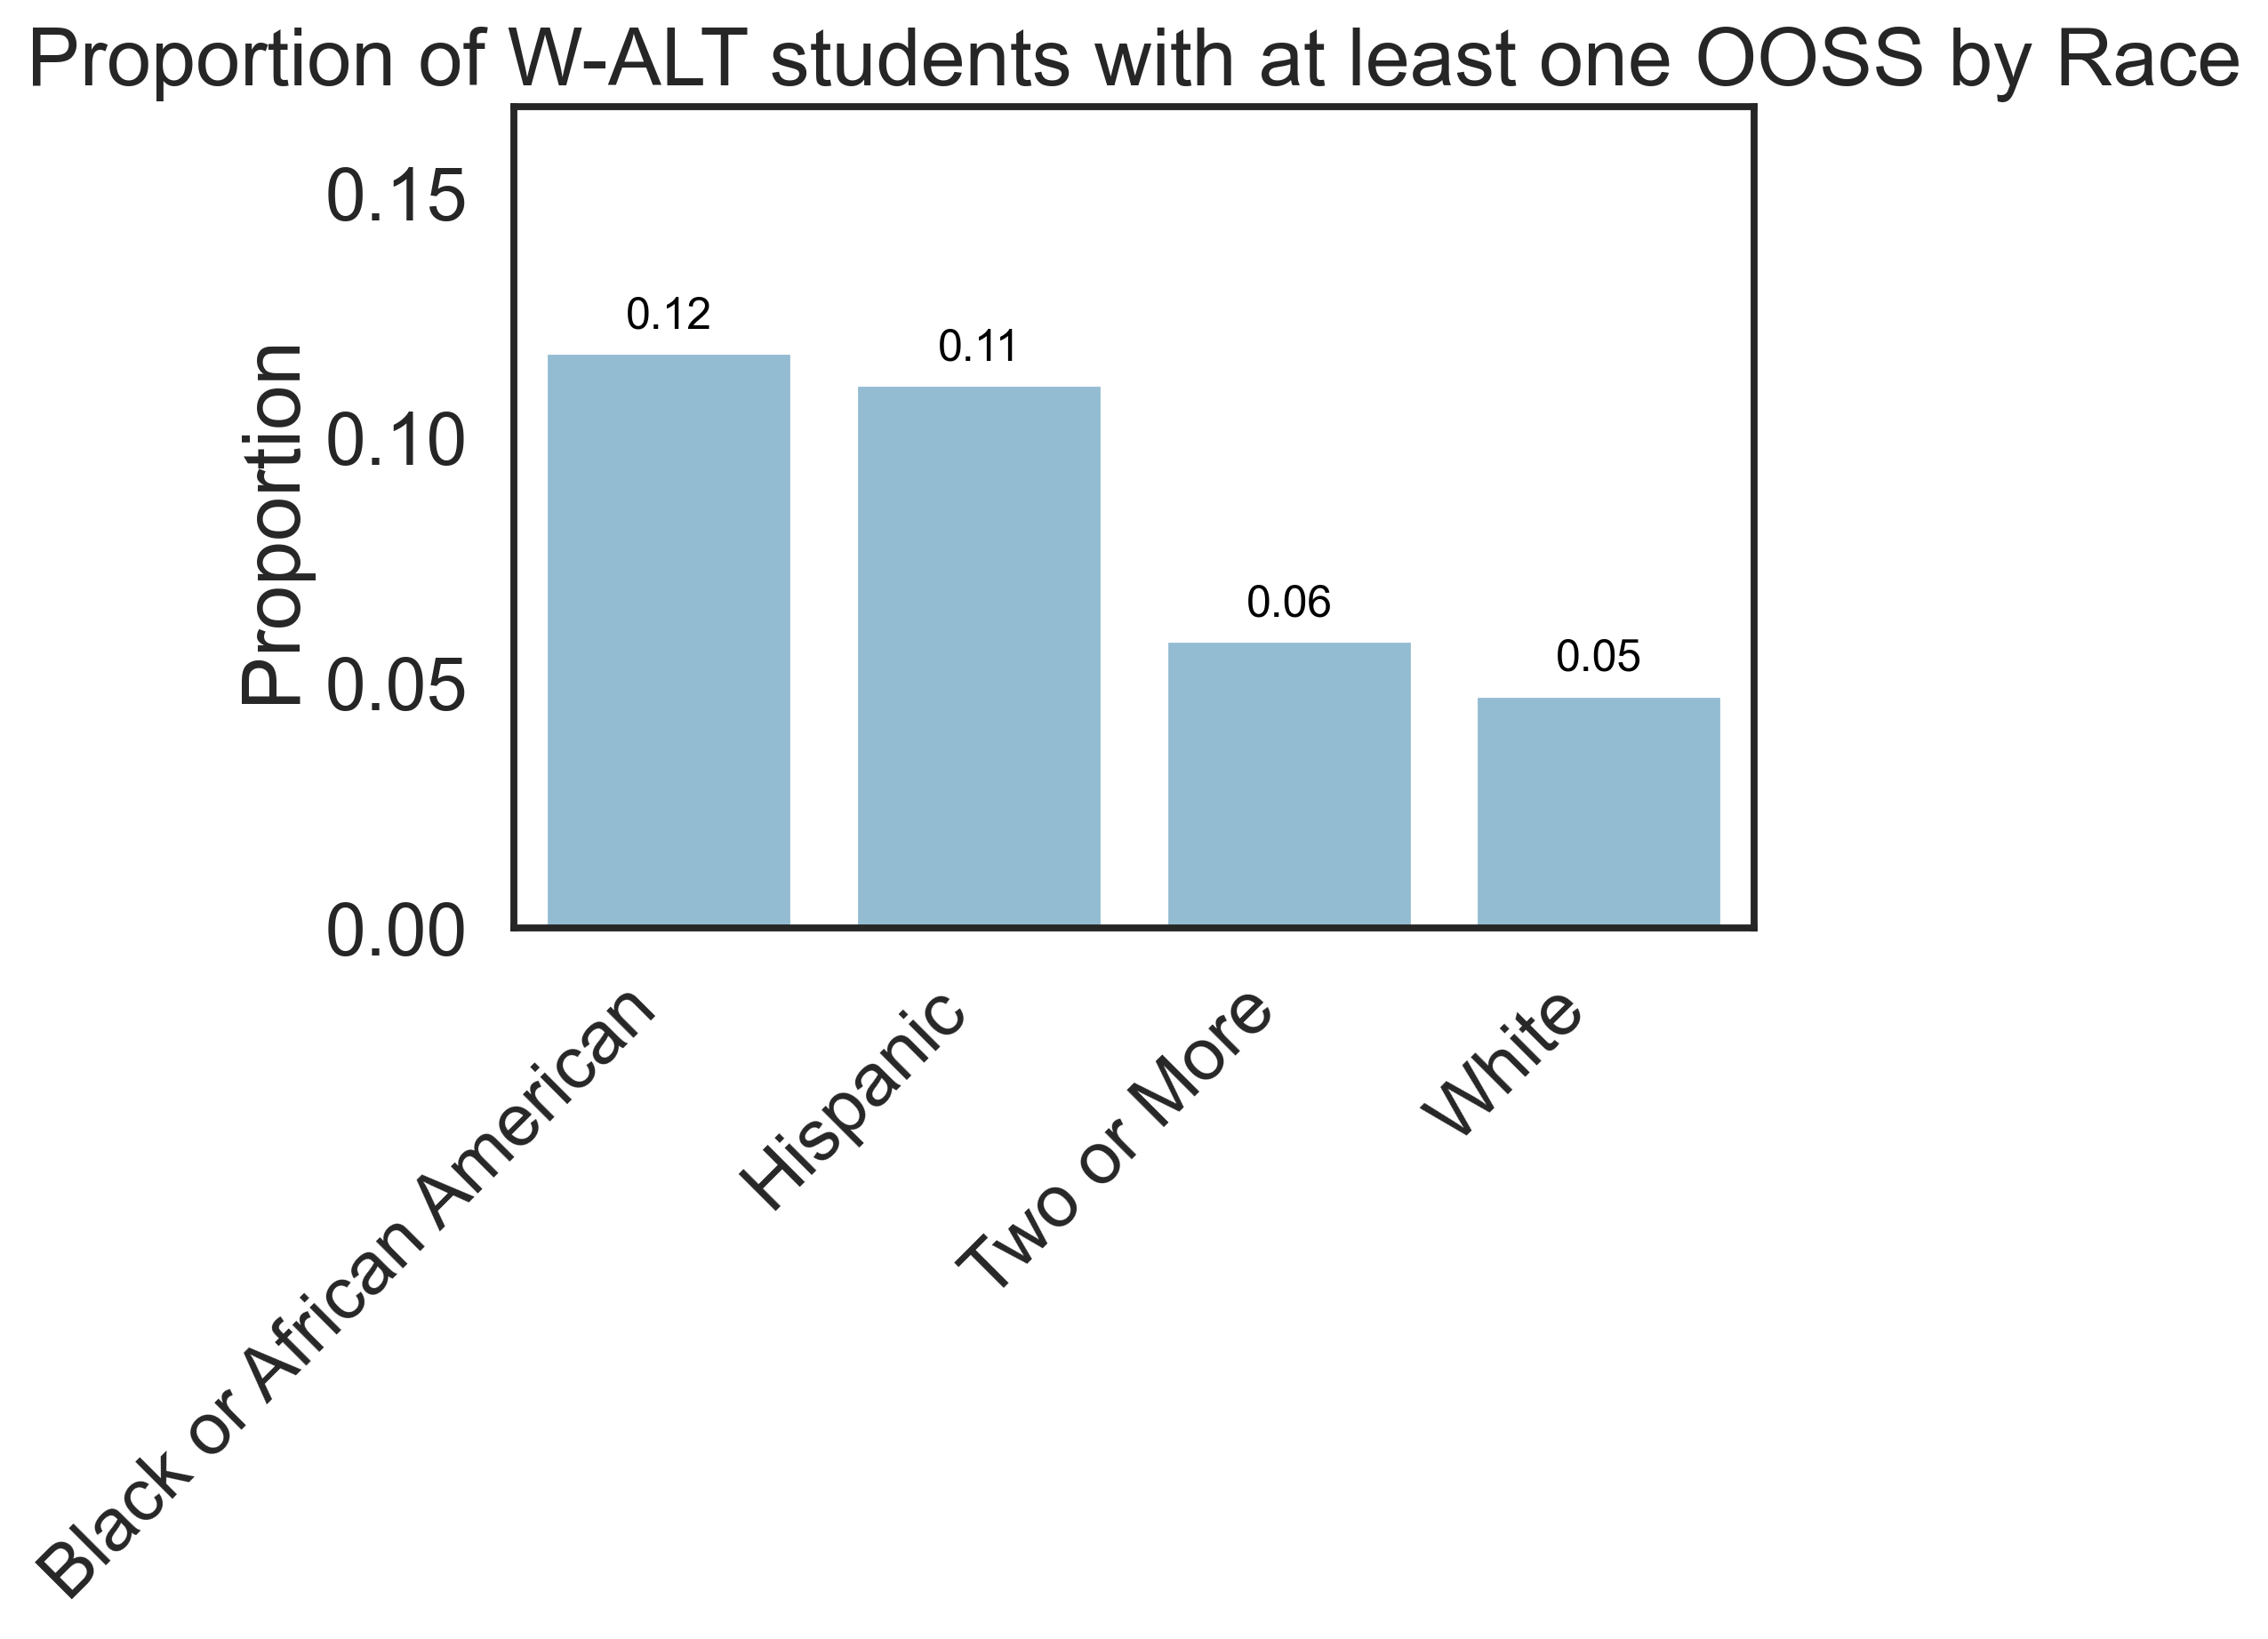

In [198]:
fig = plt.figure(figsize=(6,4))

df_to_plot=walt_df.groupby('Student Race')['OOS Suspension'].value_counts(normalize=True).to_frame().reset_index()
df_to_plot=df_to_plot[df_to_plot['OOS Suspension']=='Yes'].rename(columns={'proportion':'Proportion'})

ax = sns.barplot(x='Student Race',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .005, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of W-ALT students with at least one OOSS by Race")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/walt_ooss_by_race', bbox_inches='tight')
plt.show()

## ABEC

In [199]:
abec_df=combined_df[combined_df['School']=='ABEC']
abec_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 0 to 3
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 124 non-null    object 
 1   Student Name                 126 non-null    object 
 2   District287 Id               126 non-null    int64  
 3   Grade                        126 non-null    object 
 4   Student Race                 126 non-null    object 
 5   Student Gender               126 non-null    object 
 6   Student Age                  124 non-null    object 
 7   Language Spoken In the Home  124 non-null    object 
 8   Original Enter Date          124 non-null    object 
 9   District Of Residence        124 non-null    object 
 10  Staff Name                   124 non-null    object 
 11  Classroom Enter Date         124 non-null    object 
 12  Classroom Leave Date         10 non-null     object 
 13  Employee Number            

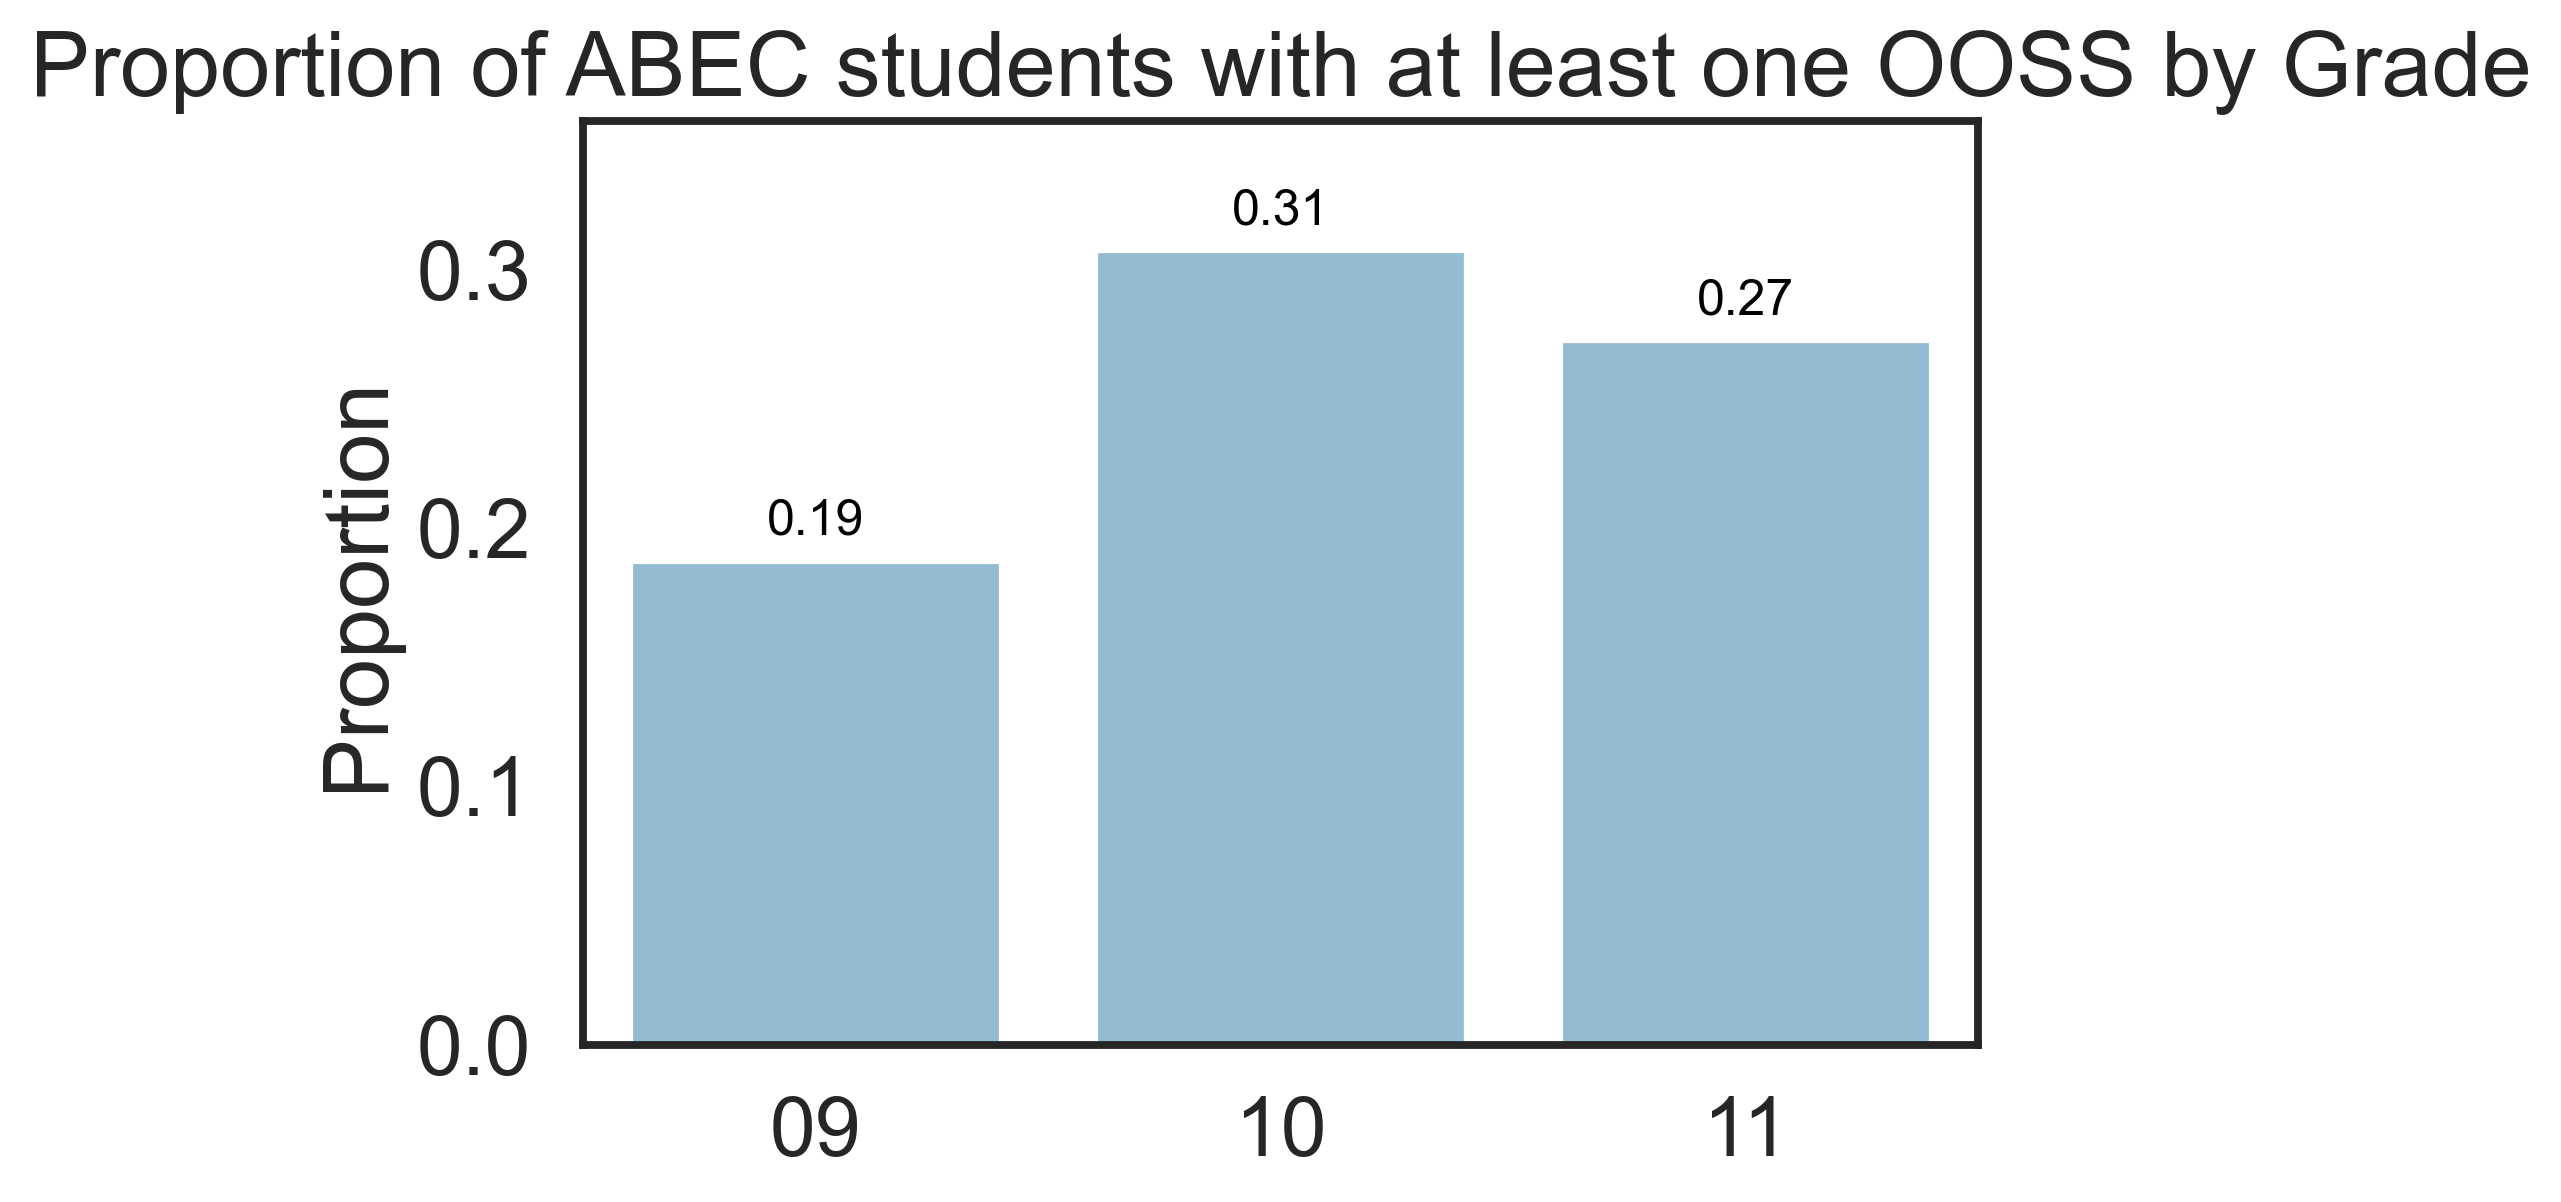

In [200]:
fig = plt.figure(figsize=(6,4))

df_to_plot=abec_df.groupby('Grade')['OOS Suspension'].value_counts(normalize=True).to_frame().reset_index()
df_to_plot=df_to_plot[df_to_plot['OOS Suspension']=='Yes'].rename(columns={'proportion':'Proportion'}).sort_values('Grade')

ax = sns.barplot(x='Grade',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of ABEC students with at least one OOSS by Grade")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/abec_ooss_by_grade', bbox_inches='tight')
plt.show()

C:\Users\mcyang\AppData\Local\Temp\ipykernel_3636\2105859480.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


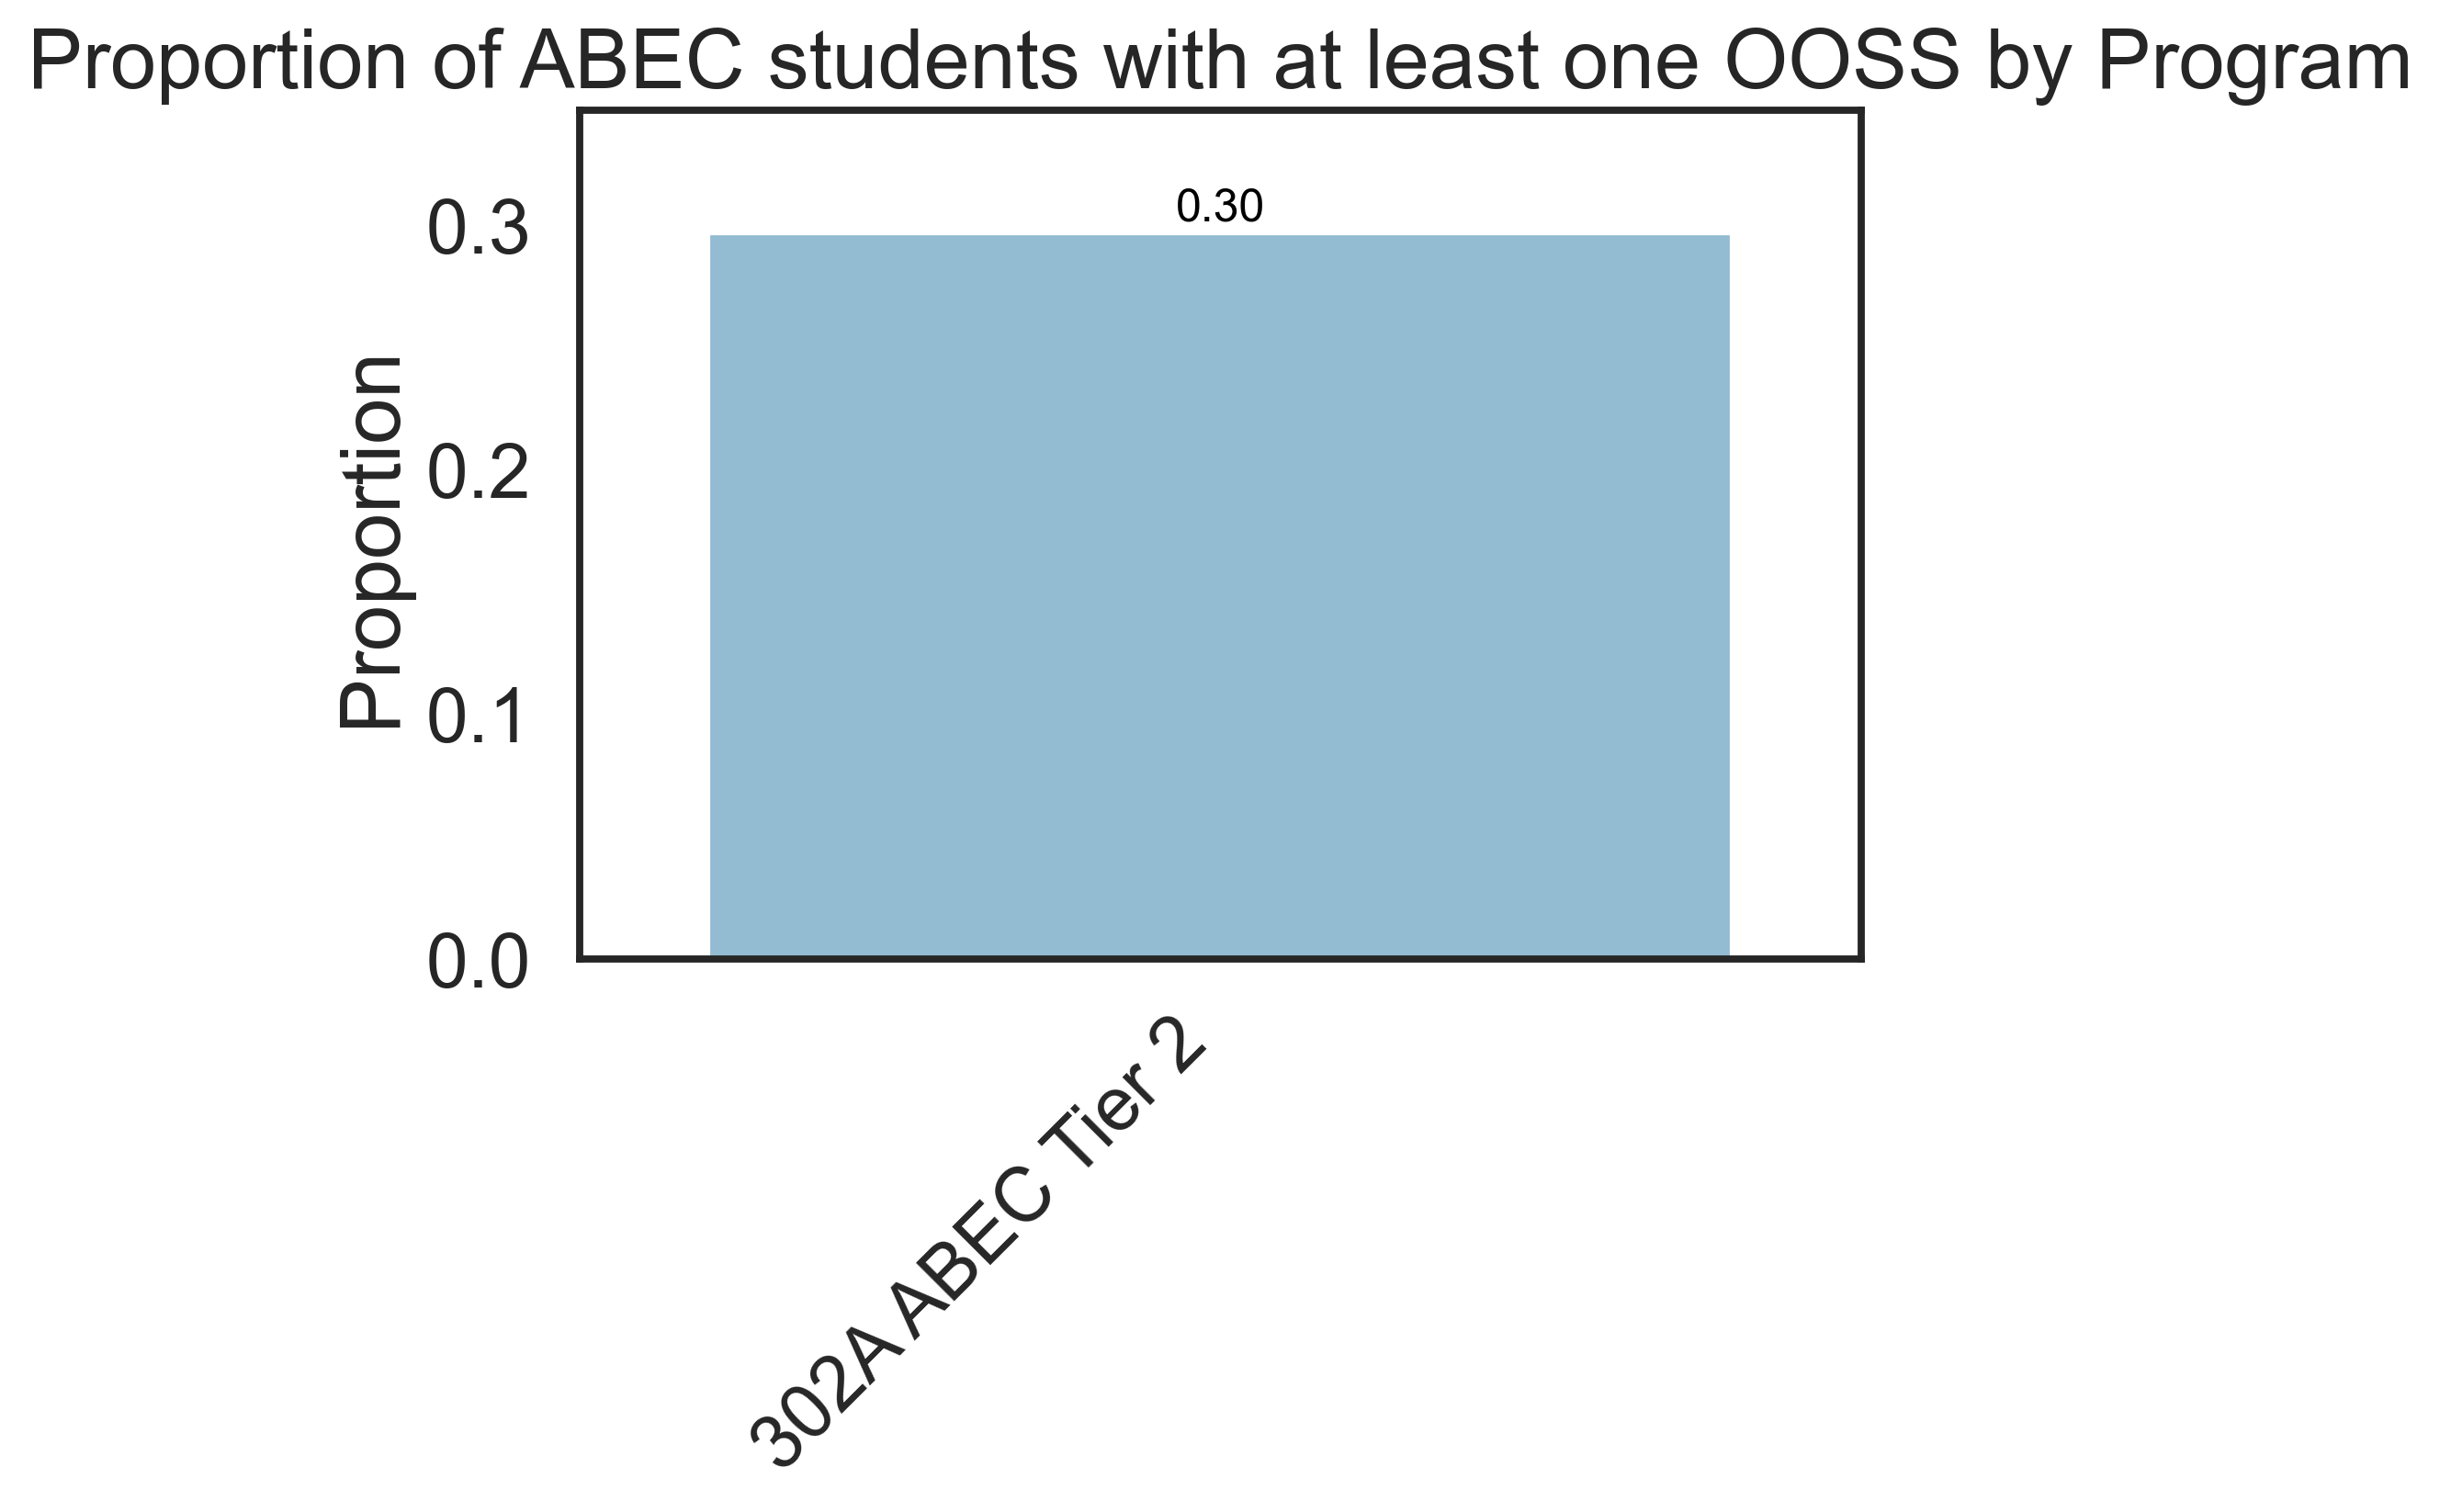

In [201]:
fig = plt.figure(figsize=(6,4))

df_to_plot=abec_df.groupby('Site/Program')['OOS Suspension'].value_counts(normalize=True).to_frame().reset_index()
df_to_plot=df_to_plot[df_to_plot['OOS Suspension']=='Yes'].rename(columns={'proportion':'Proportion'})

ax = sns.barplot(x='Site/Program',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .005, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of ABEC students with at least one OOSS by Program")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/abec_ooss_by_program', bbox_inches='tight')
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,4))

df_to_plot=abec_df.groupby('Student Race')['OOS Suspension'].value_counts(normalize=True).to_frame().reset_index()
df_to_plot=df_to_plot[df_to_plot['OOS Suspension']=='Yes'].rename(columns={'proportion':'Proportion'})

ax = sns.barplot(x='Student Race',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .005, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of ABEC students with at least one OOSS by Race")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/abec_ooss_by_race', bbox_inches='tight')
plt.show()

## CTC

In [203]:
ctc_df=combined_df[combined_df['School']=='CTC']
ctc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 2 to 957
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 120 non-null    object 
 1   Student Name                 120 non-null    object 
 2   District287 Id               120 non-null    int64  
 3   Grade                        120 non-null    object 
 4   Student Race                 120 non-null    object 
 5   Student Gender               120 non-null    object 
 6   Student Age                  120 non-null    object 
 7   Language Spoken In the Home  120 non-null    object 
 8   Original Enter Date          120 non-null    object 
 9   District Of Residence        120 non-null    object 
 10  Staff Name                   120 non-null    object 
 11  Classroom Enter Date         120 non-null    object 
 12  Classroom Leave Date         15 non-null     object 
 13  Employee Number          

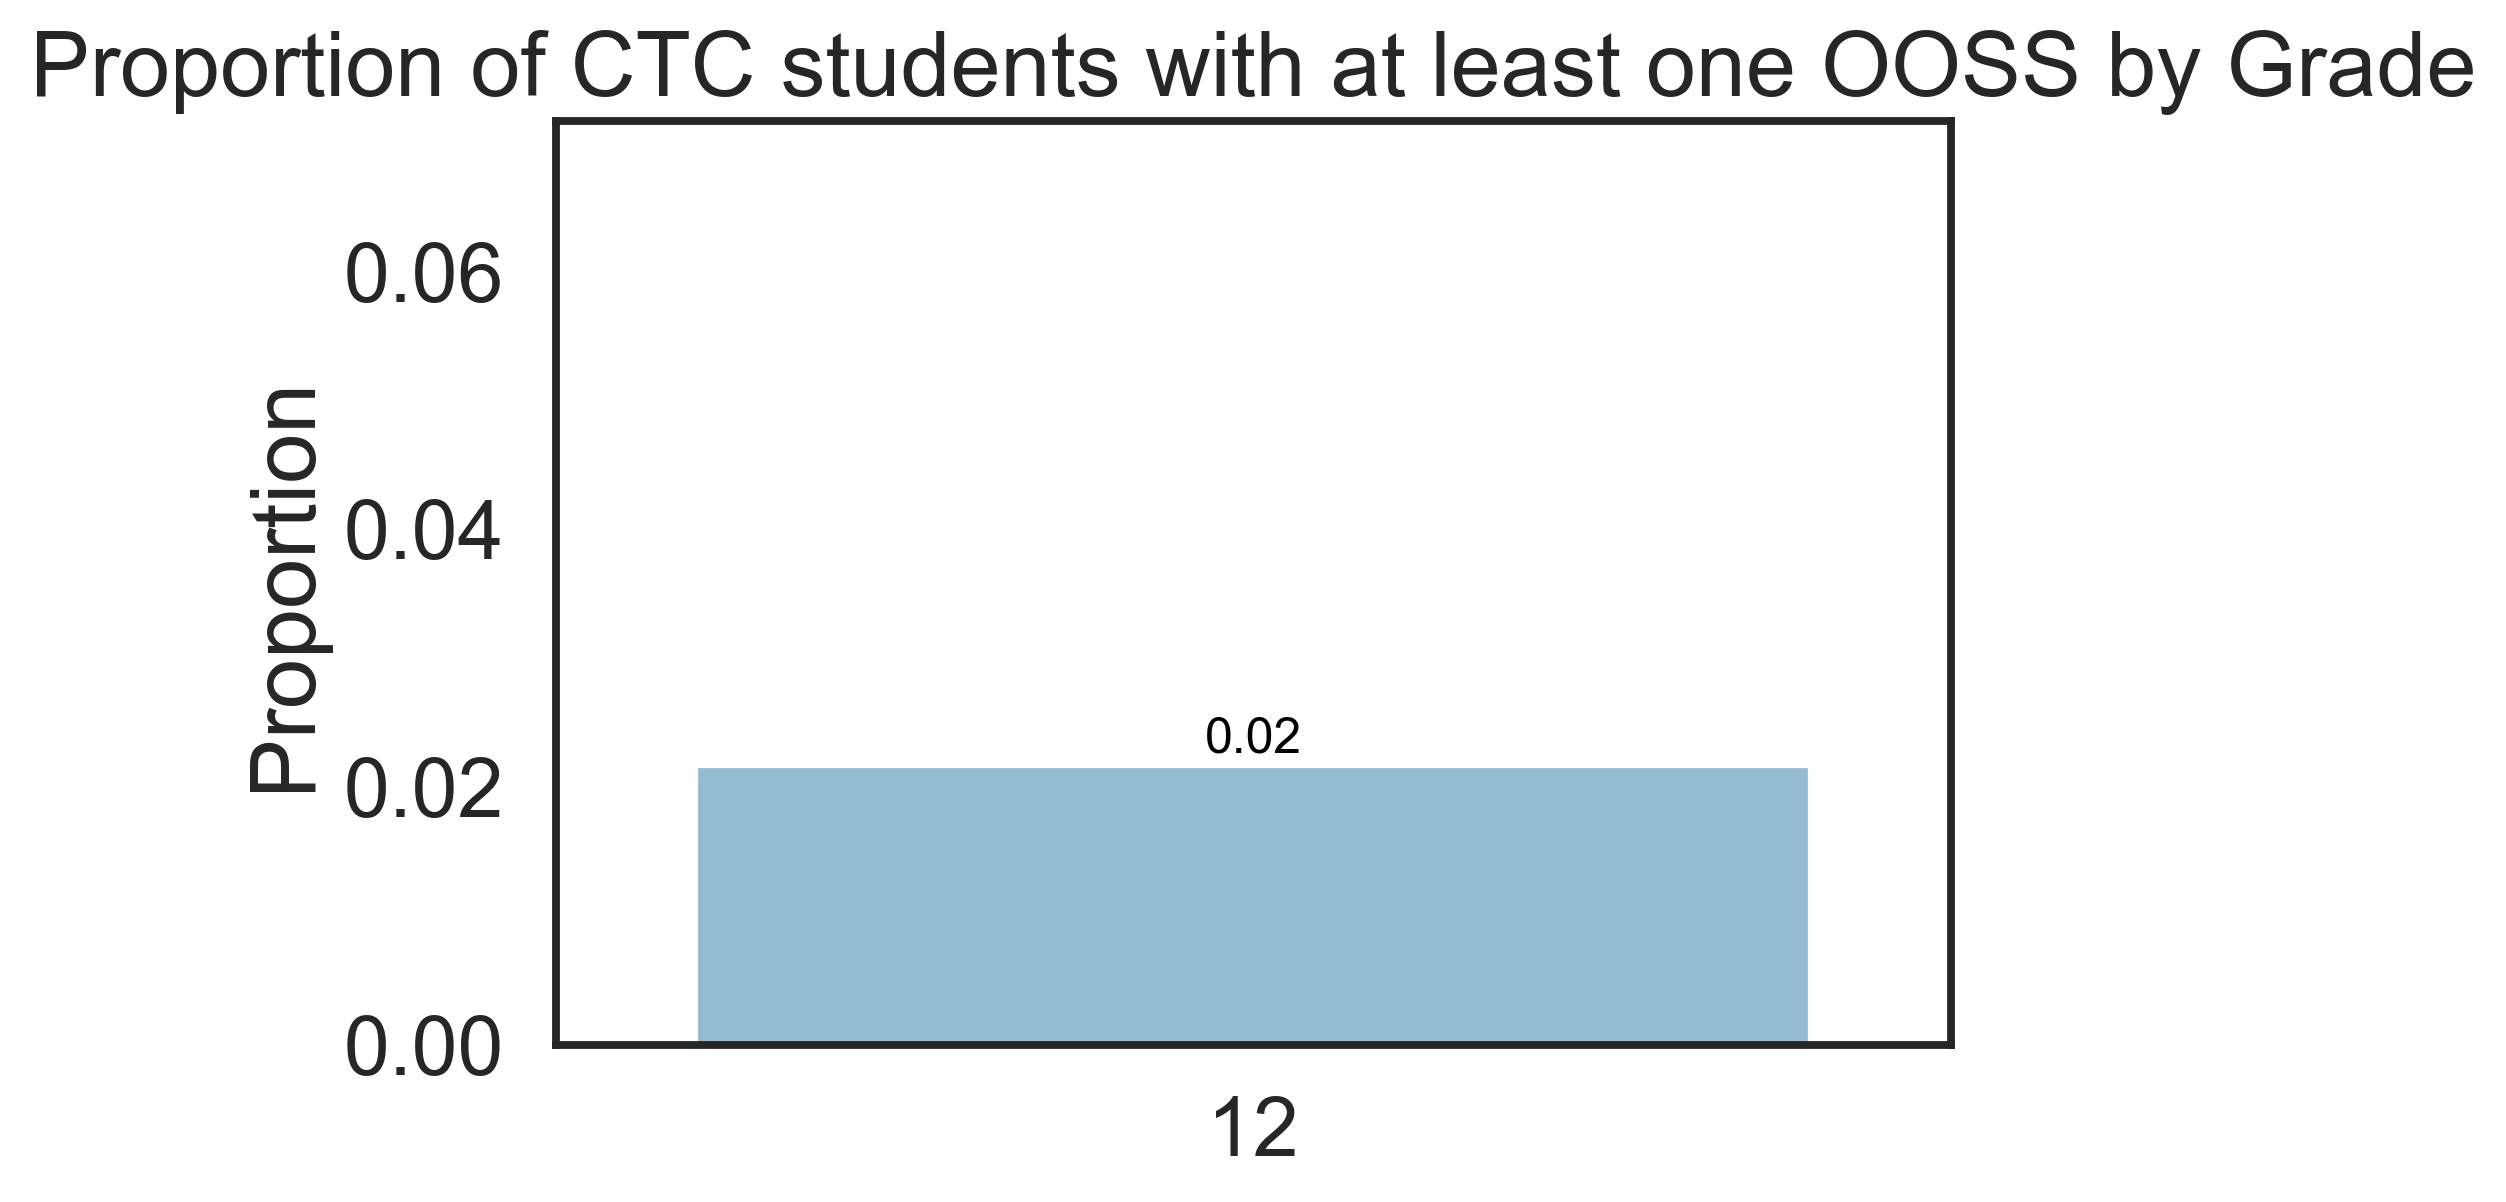

In [205]:
fig = plt.figure(figsize=(6,4))

df_to_plot=ctc_df.groupby('Grade')['OOS Suspension'].value_counts(normalize=True).to_frame().reset_index()
df_to_plot=df_to_plot[df_to_plot['OOS Suspension']=='Yes'].rename(columns={'proportion':'Proportion'}).sort_values('Grade')

ax = sns.barplot(x='Grade',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .001, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of CTC students with at least one OOSS by Grade")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/ctc_ooss_by_grade', bbox_inches='tight')
plt.show()

C:\Users\mcyang\AppData\Local\Temp\ipykernel_3636\913344873.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


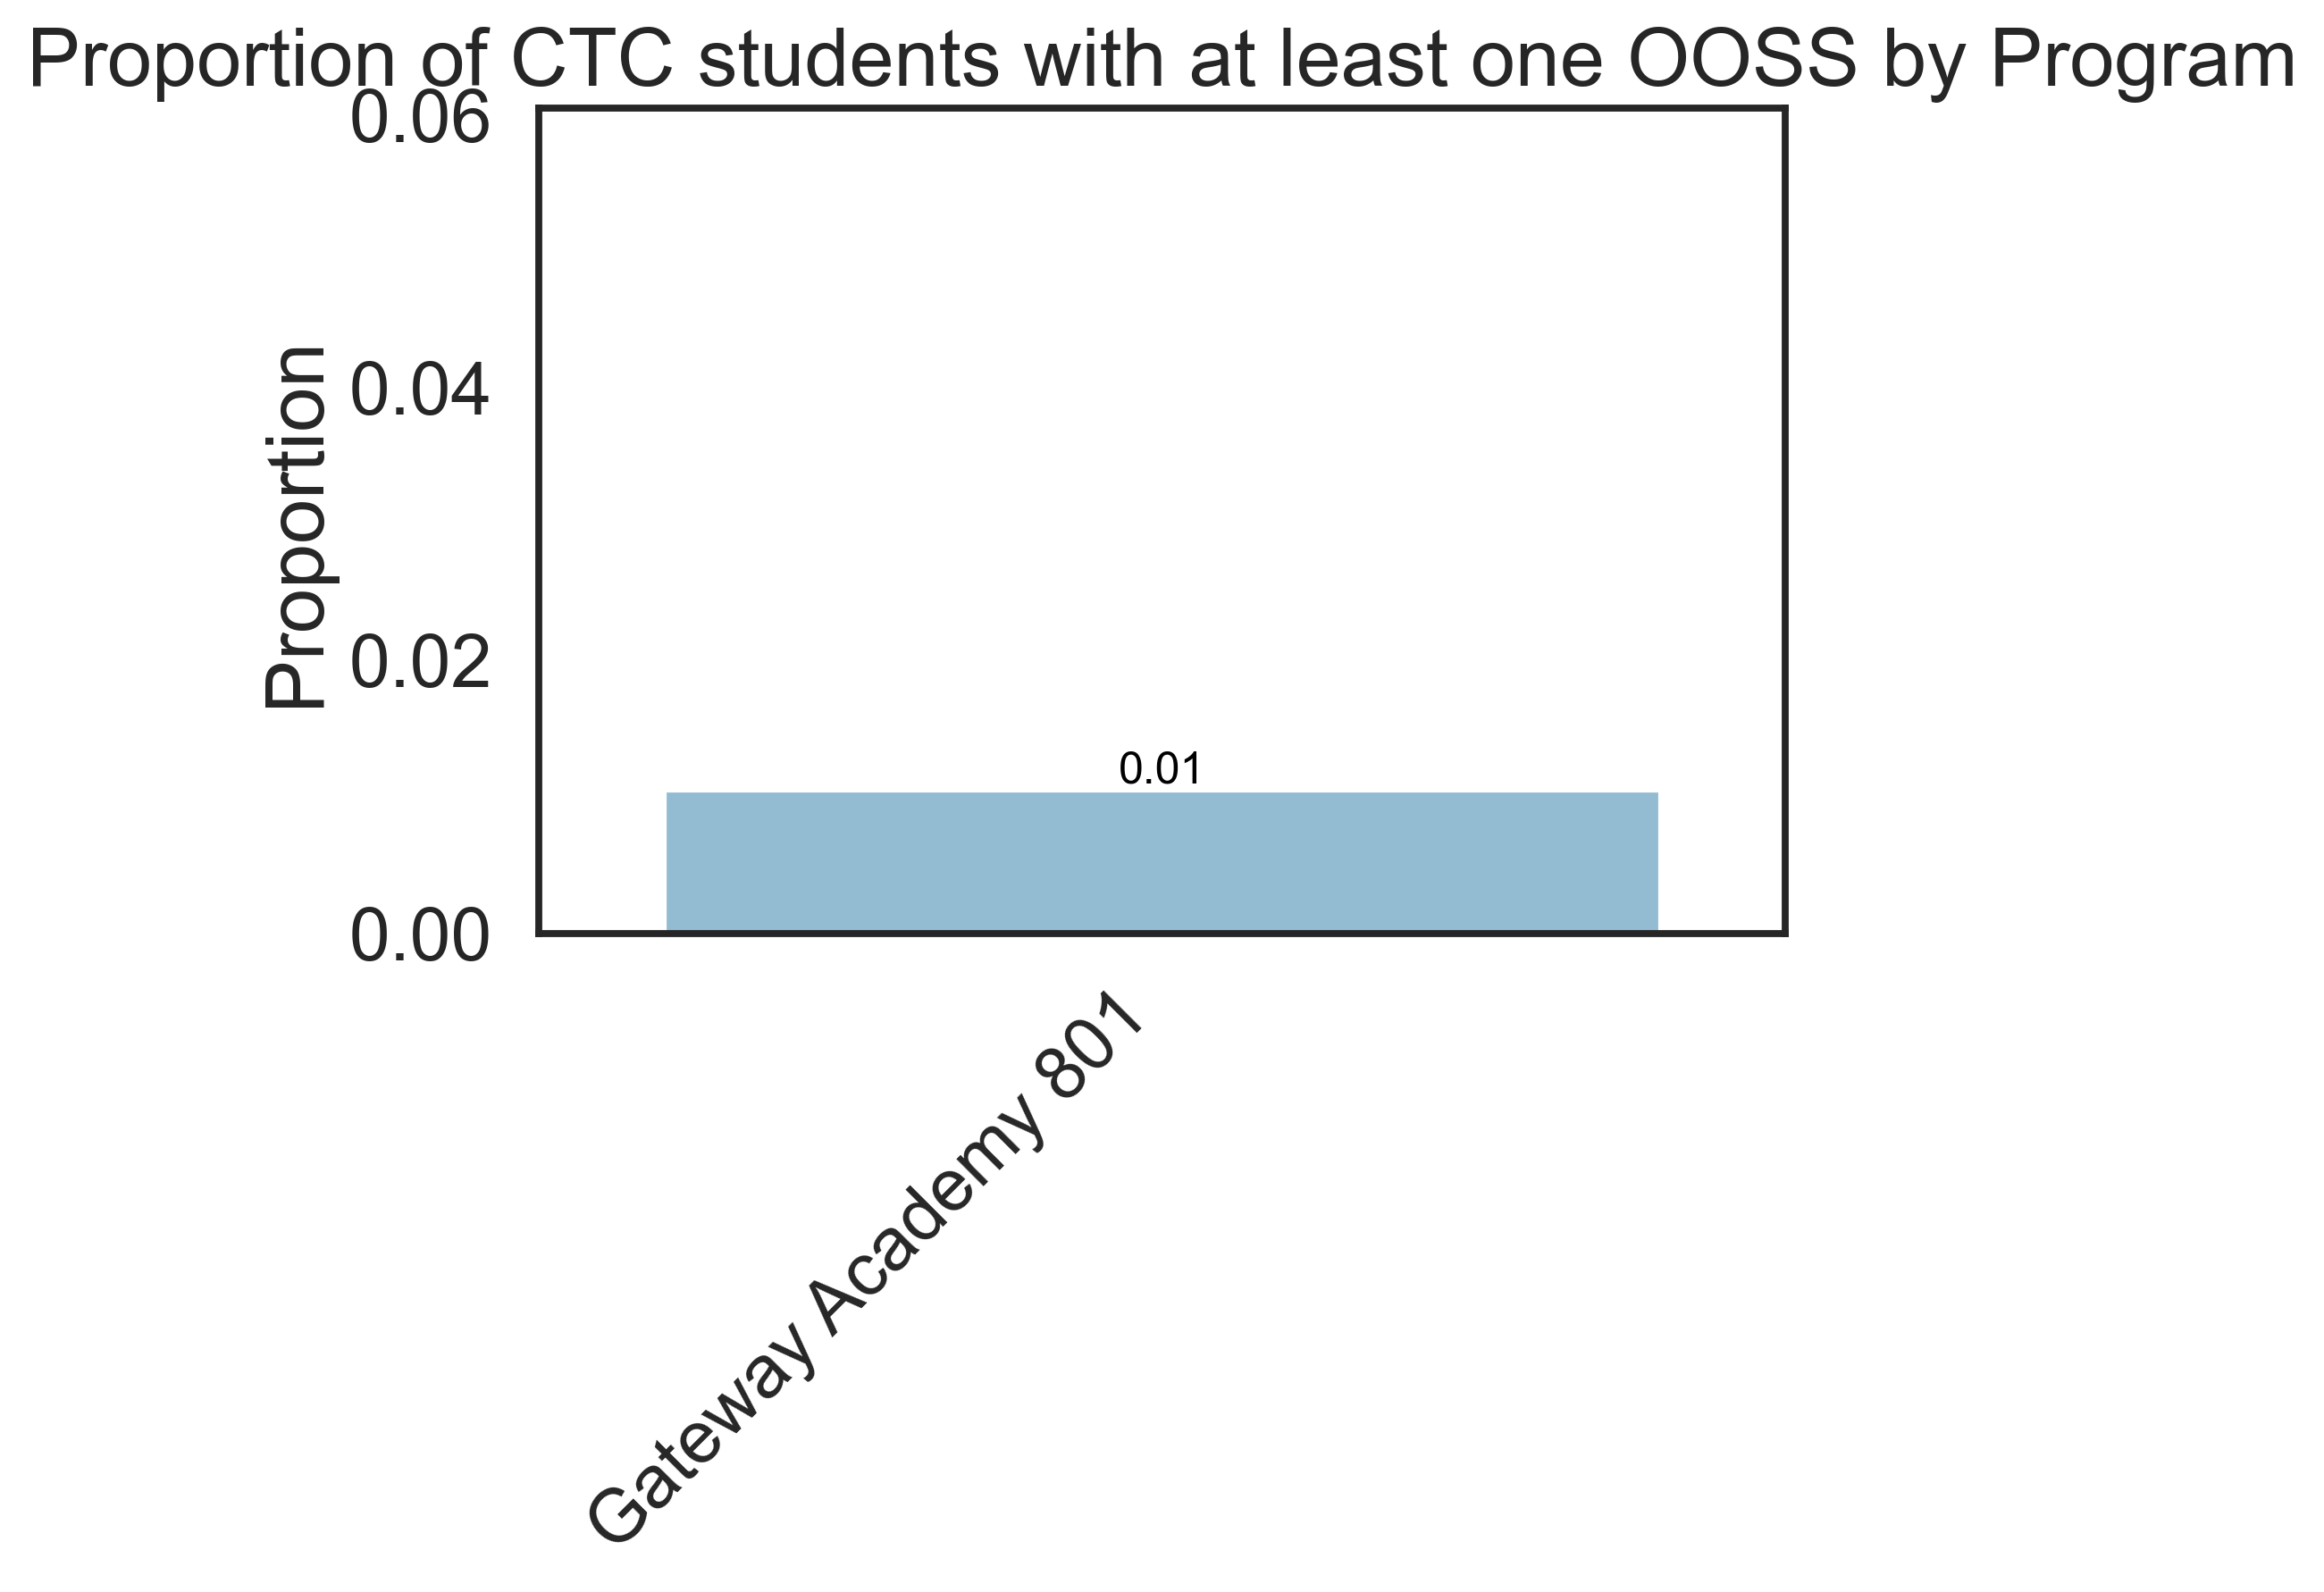

In [208]:
fig = plt.figure(figsize=(6,4))

df_to_plot=ctc_df.groupby('Site/Program')['OOS Suspension'].value_counts(normalize=True).to_frame().reset_index()
df_to_plot=df_to_plot[df_to_plot['OOS Suspension']=='Yes'].rename(columns={'proportion':'Proportion'})

ax = sns.barplot(x='Site/Program',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .0005, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of CTC students with at least one OOSS by Program")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/ctc_ooss_by_program', bbox_inches='tight')
plt.show()

C:\Users\mcyang\AppData\Local\Temp\ipykernel_3636\3210185977.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


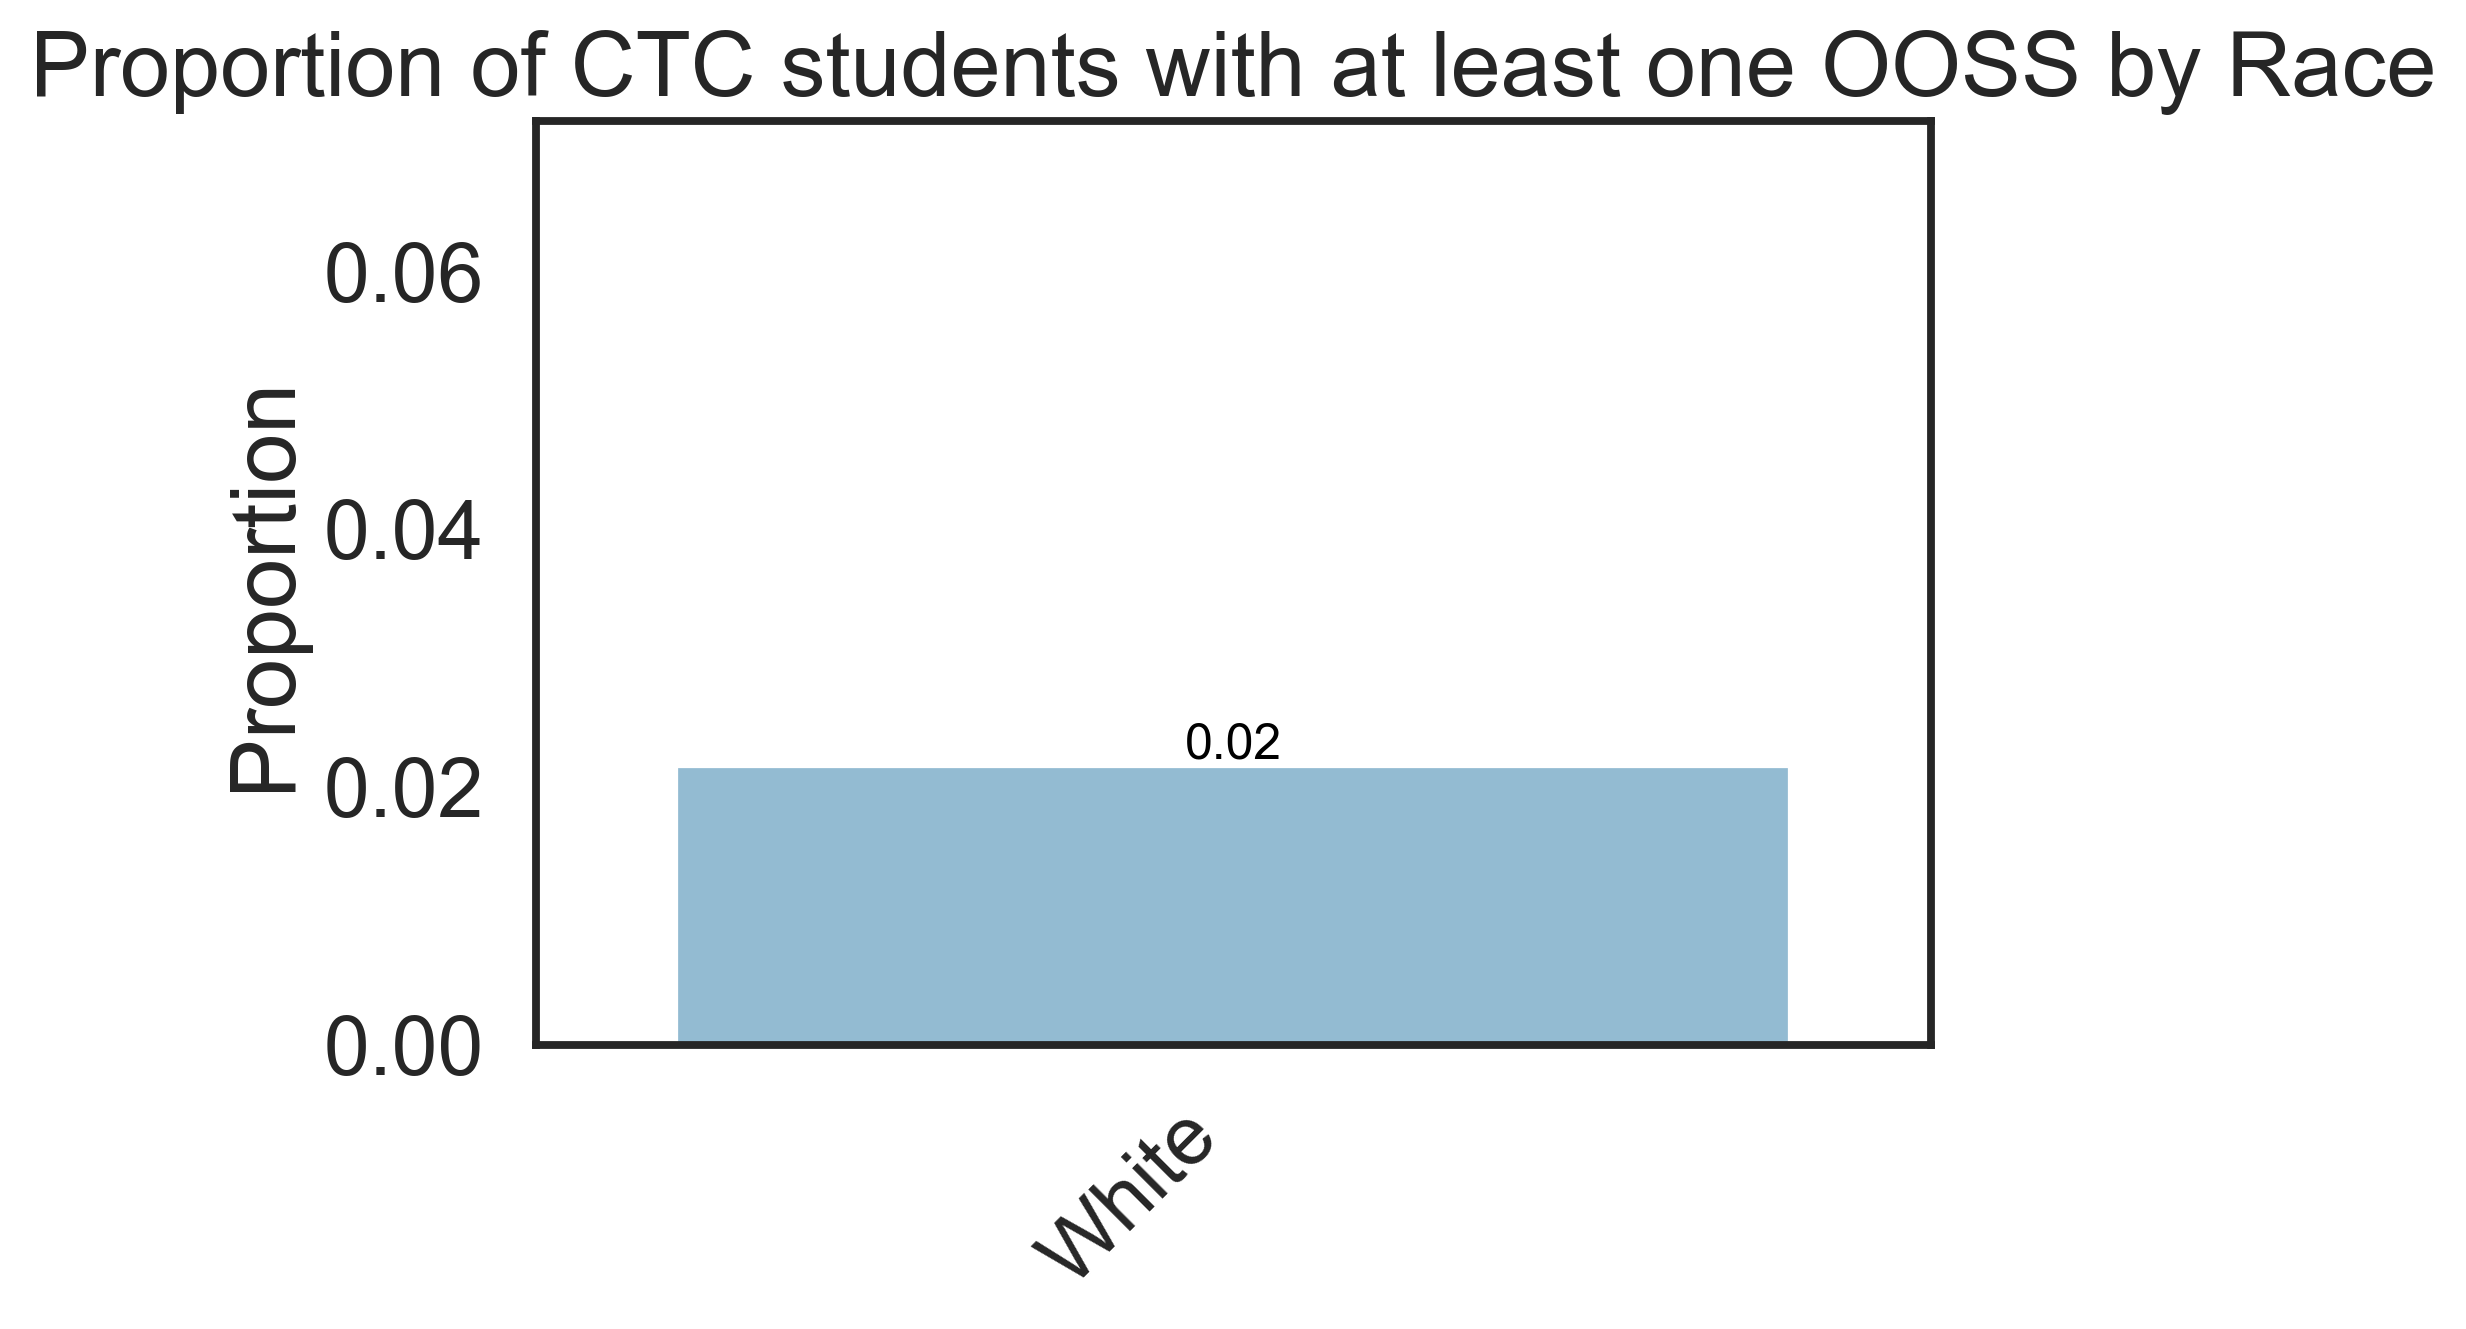

In [209]:
fig = plt.figure(figsize=(6,4))

df_to_plot=ctc_df.groupby('Student Race')['OOS Suspension'].value_counts(normalize=True).to_frame().reset_index()
df_to_plot=df_to_plot[df_to_plot['OOS Suspension']=='Yes'].rename(columns={'proportion':'Proportion'})

ax = sns.barplot(x='Student Race',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .0005, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of CTC students with at least one OOSS by Race")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/ctc_ooss_by_race', bbox_inches='tight')
plt.show()